In [1]:
import duckdb

DUCK_DB_FILE = "/Users/nehiljain/code/data/future-dynamics/raw/hotel_pricer_ai.duckdb"
with duckdb.connect(DUCK_DB_FILE, read_only=True) as con:
    hotel_prices = con.execute("SELECT * FROM public.hotel_prices ").df()

In [2]:
# Queries
# Hotel Prices Schema
# ('hotel_name', 'VARCHAR', 'YES', None, None, nan)
# ('checkin_date', 'VARCHAR', 'YES', None, None, nan)
# ('length_of_stay', 'BIGINT', 'YES', None, None, nan)
# ('scrapped_url', 'VARCHAR', 'YES', None, None, nan)
# ('text', 'VARCHAR', 'YES', None, None, nan)
# ('run_date', 'VARCHAR', 'YES', None, None, nan)
# ('run_at', 'VARCHAR', 'YES', None, None, nan)
# ('execution_at', 'VARCHAR', 'YES', None, None, nan)

#  Get all the hotels were text has the word failed in it. Case insensitive in SQL

failed_hotels = """
SELECT distinct hotel_name
FROM public.hotel_prices where text ilike '%fail%'
"""


# Get number of rows in hotel prices by hour of run_at in sql
# Calculate cummulative sum of count records by hour of run_at in sql
num_records_by_hour = """
SELECT count(*) as count_records,
        count_if(text ilike '%fail%') as count_failed_records,
        count_failed_records / count_records * 100 as pct_failed_records,
        sum(count(*)) over (order by run_hr asc) as cum_count_records,
        strftime('%Y-%m-%d-%H', strptime(run_at, '%Y-%m-%d %H:%M:%S')) as run_hr
FROM public.hotel_prices
GROUP BY run_hr
ORDER BY run_hr asc
"""

In [3]:
# num of records per hour
with duckdb.connect(DUCK_DB_FILE, read_only=True) as con:
    df = con.execute(num_records_by_hour).df()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, '2024-01-23-10'),
  Text(1, 0, '2024-01-23-12'),
  Text(2, 0, '2024-01-23-13'),
  Text(3, 0, '2024-01-23-14'),
  Text(4, 0, '2024-01-23-15'),
  Text(5, 0, '2024-01-23-16'),
  Text(6, 0, '2024-01-23-18'),
  Text(7, 0, '2024-01-23-19'),
  Text(8, 0, '2024-01-23-21'),
  Text(9, 0, '2024-01-23-22'),
  Text(10, 0, '2024-01-23-23'),
  Text(11, 0, '2024-01-24-00'),
  Text(12, 0, '2024-01-24-01'),
  Text(13, 0, '2024-01-24-02'),
  Text(14, 0, '2024-01-24-03'),
  Text(15, 0, '2024-01-24-04'),
  Text(16, 0, '2024-01-24-05'),
  Text(17, 0, '2024-01-24-06'),
  Text(18, 0, '2024-01-24-07'),
  Text(19, 0, '2024-01-24-08'),
  Text(20, 0, '2024-01-24-09'),
  Text(21, 0, '2024-01-24-22'),
  Text(22, 0, '2024-01-24-23'),
  Text(23, 0, '2024-01-25-00'),
  Text(24, 0, '2024-01-25-01'),
  Text(25

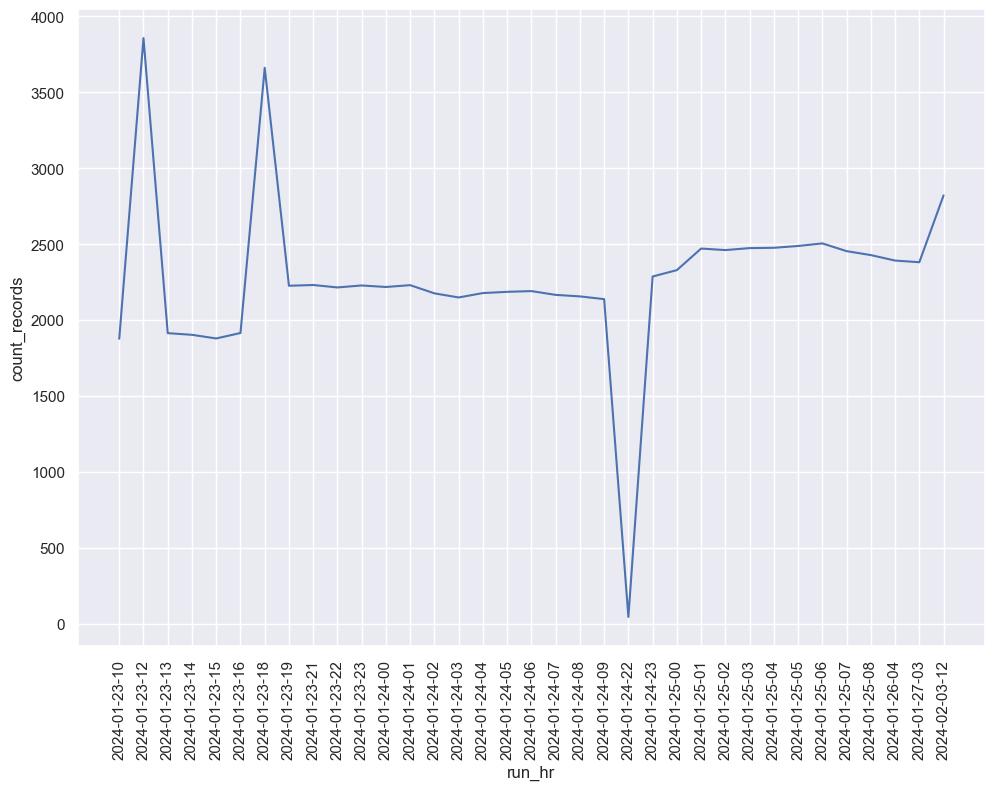

In [5]:
import seaborn as sns

sns.set_theme(style="darkgrid")
# sns plot of num of records per hour and cummulative sum from df
sns.set(rc={"figure.figsize": (11.7, 8.27)})
sns.lineplot(data=df, x="run_hr", y="count_records")
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, '2024-01-23-10'),
  Text(1, 0, '2024-01-23-12'),
  Text(2, 0, '2024-01-23-13'),
  Text(3, 0, '2024-01-23-14'),
  Text(4, 0, '2024-01-23-15'),
  Text(5, 0, '2024-01-23-16'),
  Text(6, 0, '2024-01-23-18'),
  Text(7, 0, '2024-01-23-19'),
  Text(8, 0, '2024-01-23-21'),
  Text(9, 0, '2024-01-23-22'),
  Text(10, 0, '2024-01-23-23'),
  Text(11, 0, '2024-01-24-00'),
  Text(12, 0, '2024-01-24-01'),
  Text(13, 0, '2024-01-24-02'),
  Text(14, 0, '2024-01-24-03'),
  Text(15, 0, '2024-01-24-04'),
  Text(16, 0, '2024-01-24-05'),
  Text(17, 0, '2024-01-24-06'),
  Text(18, 0, '2024-01-24-07'),
  Text(19, 0, '2024-01-24-08'),
  Text(20, 0, '2024-01-24-09'),
  Text(21, 0, '2024-01-24-22'),
  Text(22, 0, '2024-01-24-23'),
  Text(23, 0, '2024-01-25-00'),
  Text(24, 0, '2024-01-25-01'),
  Text(25

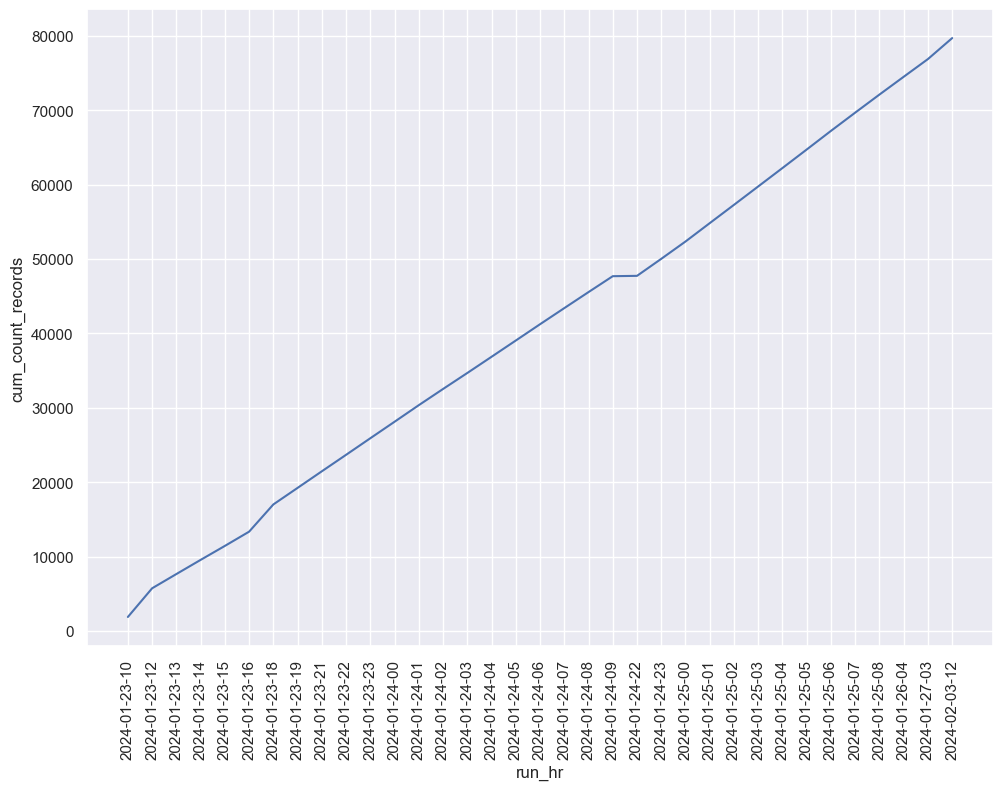

In [6]:
# graph cummulative sum in sns for df
sns.set(rc={"figure.figsize": (11.7, 8.27)})
sns.lineplot(data=df, x="run_hr", y="cum_count_records")
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, '2024-01-23-10'),
  Text(1, 0, '2024-01-23-12'),
  Text(2, 0, '2024-01-23-13'),
  Text(3, 0, '2024-01-23-14'),
  Text(4, 0, '2024-01-23-15'),
  Text(5, 0, '2024-01-23-16'),
  Text(6, 0, '2024-01-23-18'),
  Text(7, 0, '2024-01-23-19'),
  Text(8, 0, '2024-01-23-21'),
  Text(9, 0, '2024-01-23-22'),
  Text(10, 0, '2024-01-23-23'),
  Text(11, 0, '2024-01-24-00'),
  Text(12, 0, '2024-01-24-01'),
  Text(13, 0, '2024-01-24-02'),
  Text(14, 0, '2024-01-24-03'),
  Text(15, 0, '2024-01-24-04'),
  Text(16, 0, '2024-01-24-05'),
  Text(17, 0, '2024-01-24-06'),
  Text(18, 0, '2024-01-24-07'),
  Text(19, 0, '2024-01-24-08'),
  Text(20, 0, '2024-01-24-09'),
  Text(21, 0, '2024-01-24-22'),
  Text(22, 0, '2024-01-24-23'),
  Text(23, 0, '2024-01-25-00'),
  Text(24, 0, '2024-01-25-01'),
  Text(25

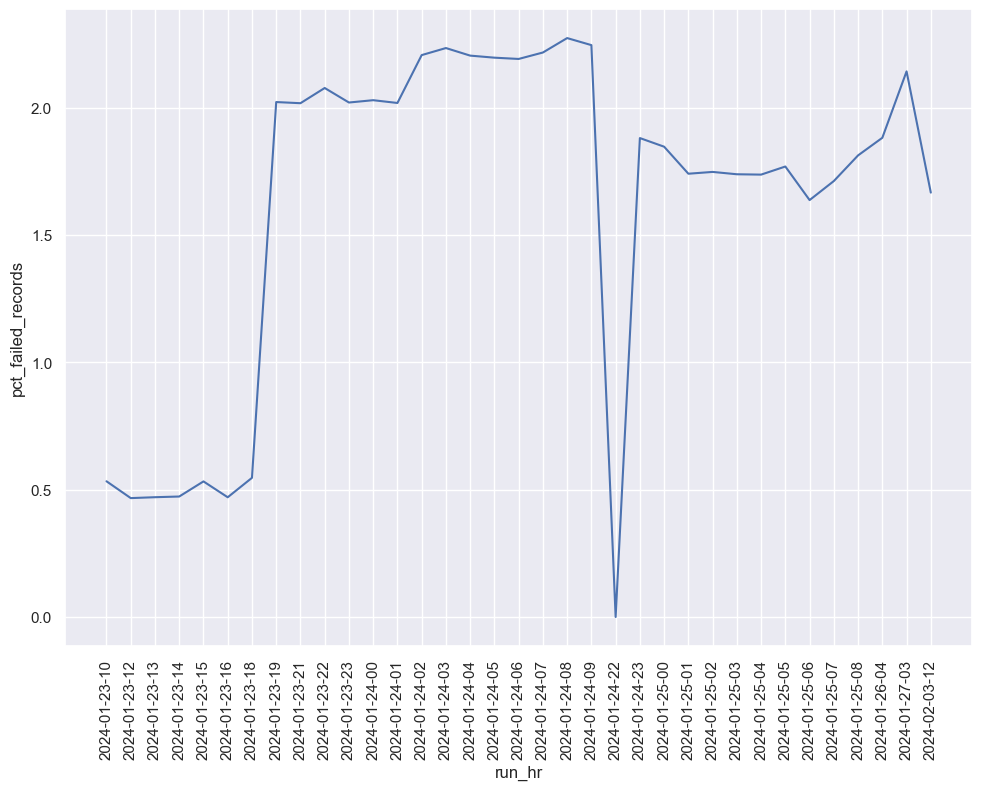

In [7]:
# graph PCT failed reci


sns.set(rc={"figure.figsize": (11.7, 8.27)})
sns.lineplot(data=df, x="run_hr", y="pct_failed_records")
plt.xticks(rotation=90)

In [8]:
# Hotels that consistently fail
with duckdb.connect(DUCK_DB_FILE, read_only=True) as con:
    print(con.execute(failed_hotels).df())

                                           hotel_name
0             The Andorre House, Part of JDV by Hyatt
1                                        Hotel Hayden
2        Boardwalk Beach Resort By Panhandle Getaways
3   Holiday Inn Express & Suites Naples North Boni...
4                                      Hilton Toronto
5                              Beachside Resort Hotel
6                               Broadmore Miami Beach
7                               Chelsea Hotel Toronto
8                                      B Ocean Resort
9                              The Williamsburg Hotel
10             DoubleTree By Hilton New York Downtown
11              Best Western Sugar Sands Inn & Suites
12  Candlewood Suites New York City-Times Square, ...
13           Travelodge By Wyndham Miami Biscayne Bay
14                                                  /


In [9]:
import pandas as pd
import pendulum

# SQL: Get search itineraries from db
search_itineraries_sql = """
SELECT *,
  strptime(created_at || '-2024', '%b %d-%Y') as  clean_created_at
from public.search_itineraries
"""
hotel_prices_trend_sql = """
SELECT *
FROM public.hotel_prices
where text not ilike '%fail%'
and hotel_name = '{hotel_name}'
"""
import re
import matplotlib.pyplot as plt
from pathlib import Path


# Function to create regex patterns based on the hotel name
def create_regex_patterns(hotel_name):
    # Regex to find relevant rows for the given hotel
    # Pattern: <Hotel Name>...<Price>...Visit site
    relevant_row_regex = re.compile(
        rf"{re.escape(hotel_name)}.*?\$\d+.*?Visit site", re.IGNORECASE
    )

    # Regex to remove irrelevant rows
    # Pattern: Does not contain <Hotel Name>...<Price>...Visit site
    irrelevant_row_regex = re.compile(
        rf"^(?!.*{re.escape(hotel_name)}.*?\$\d+.*?Visit site).*", re.IGNORECASE
    )
    provider_price_row_regex = re.compile(
        rf"{re.escape(hotel_name)}.*?->(.*?);;\$(\d+)", re.IGNORECASE
    )
    return relevant_row_regex, irrelevant_row_regex, provider_price_row_regex


# Example usage


def get_price_comparison_graph(search_itin, plot_direrctory):
    with duckdb.connect(DUCK_DB_FILE, read_only=True) as con:
        hotel_prices_trend = hotel_prices_trend_sql.format(
            hotel_name=search_itin["hotel_name"]
        )
        hotel_prices_trend_df = con.execute(hotel_prices_trend).df()
        if hotel_prices_trend_df.empty:
            return
        # add a column to prices_df with the relevant rows true and irrelevant rows true

        (
            relevant_row_regex,
            irrelevant_row_regex,
            provider_price_row_regex,
        ) = create_regex_patterns(search_itin["hotel_name"])
        hotel_prices_trend_df["ai_input"] = hotel_prices_trend_df.apply(
            lambda x: f"{x['hotel_name']}__{x['checkin_date']}__{x['length_of_stay']}__{x['run_date']}->{x['text']}",
            axis=1,
        )
        hotel_prices_trend_df["relevant"] = hotel_prices_trend_df["ai_input"].apply(
            lambda x: bool(relevant_row_regex.search(x))
        )
        hotel_prices_trend_df["irrelevant"] = hotel_prices_trend_df["ai_input"].apply(
            lambda x: bool(irrelevant_row_regex.search(x))
        )
        # filter for relevant rows
        hotel_prices_trend_df = hotel_prices_trend_df[hotel_prices_trend_df["relevant"]]
        # extract the price from the relevant rows and assign it to a new column list_price_usd using provider price row regex on ai input
        hotel_prices_trend_df = hotel_prices_trend_df.assign(
            list_price_usd=hotel_prices_trend_df["ai_input"]
            .apply(
                lambda x: re.findall(provider_price_row_regex, x)[0][1]
                if re.findall(provider_price_row_regex, x)
                else None
            )
            .pipe(pd.to_numeric, errors="coerce")
        )
        # extract the provider from the relevant rows and assign it to a new column list_price_usd_provider using provider price row regex on ai input
        hotel_prices_trend_df = hotel_prices_trend_df.assign(
            list_price_usd_provider=hotel_prices_trend_df["ai_input"].apply(
                lambda x: re.findall(provider_price_row_regex, x)[0][0]
                if re.findall(provider_price_row_regex, x)
                else None
            )
        )

        # modify run_at to be a pendulum format YYYY-mm-dd-HH
        hotel_prices_trend_df["run_at"] = hotel_prices_trend_df["run_at"].apply(
            lambda x: pendulum.parse(x).format("YYYY-MM-DD-HH")
        )
        # find the min list_price_usd by hotel_name and run_at in hotel_prices_trend_df
        min_hotel_prices_trend_df = (
            hotel_prices_trend_df.groupby("run_at")
            .agg({"list_price_usd": "min"})
            .reset_index()
            .rename(columns={"list_price_usd": "min_list_price_usd"})
        )
        max_hotel_prices_trend_df = (
            hotel_prices_trend_df.groupby("run_at")
            .agg({"list_price_usd": "max"})
            .reset_index()
            .rename(columns={"list_price_usd": "max_list_price_usd"})
        )

        hotel_prices_trendlines_df = pd.merge(
            max_hotel_prices_trend_df, min_hotel_prices_trend_df, on=["run_at"]
        )

        search_itin["list_price_usd"] = float(
            search_itin["list_price_usd"].replace("$", "")
        )
        # series repeat list_price_usd for length of date spine
        buy_price_usd = pd.Series(
            search_itin["list_price_usd"], index=hotel_prices_trendlines_df["run_at"]
        )
        # create a df from series list_price_usd and date_spine
        buy_price_usd = pd.DataFrame(buy_price_usd, columns=["buy_price_usd"])

        # merge buy price usd to hotel_prices_trend_df on run_at.
        # This will create a df with run_at, buy_price_usd, min_list_price_usd, max_list_price_usd
        final_df = pd.merge(hotel_prices_trendlines_df, buy_price_usd, on="run_at")
        # sns plot for a straight line over time on list_price_usd x axis is dates
        plt.figure(figsize=(10, 12))
        sns.set(rc={"figure.figsize": (11.7, 8.27)})
        plt.title(
            f'{search_itin["hotel_name"]}--{search_itin["checkin_date"]}--{search_itin["length_of_stay"]}'
        )
        sns.lineplot(data=final_df, x="run_at", y="buy_price_usd")
        sns.lineplot(data=final_df, x="run_at", y="min_list_price_usd")
        sns.lineplot(data=final_df, x="run_at", y="max_list_price_usd")
        plt.xticks(rotation=90)
        sanitized_hotel_name = re.sub(r"[^\w\s]", "", search_itin["hotel_name"])
        datetime_str = pendulum.now("UTC").format("YYYY-MM-DD")
        plt_filename = Path(
            plot_direrctory,
            datetime_str,
            f'{sanitized_hotel_name}_{search_itin["checkin_date"]}_{search_itin["length_of_stay"]}_{pendulum.now("UTC").format("YYYYMMDD")}.png',
        )
        plt_filename.parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(plt_filename, format="png")
        plt.show()
        return final_df

{'created_at': 'Jan 11', 'action': 'buy', 'url': 'https://www.super.com/travel/requests/gj6D1ZJsQx8zXeL0nfNb8w/hotels/EW2ZJRWo', 'hotel_name': 'DoubleTree By Hilton New York Downtown', 'list_price_usd': '$92.00', 'full_price_usd': '$106.00', 'checkin': 'Feb 9', 'checkout': 'Feb 10', 'cancellable_option': 'no', 'cancellable_date': 'N/A', 'room_type': 'King Room', 'adults': '2', 'updated_at': '', 'created_by': 'Khalid', 'notes': 'NY Fashion Week. Lowest Price room in Manhattan. Over 50% below typical Feb ADR', 'screenshot_link': '', 'clean_checkin': Timestamp('2024-02-08 19:00:00-0500', tz='America/New_York'), 'clean_checkout': Timestamp('2024-02-09 19:00:00-0500', tz='America/New_York'), 'checkin_date': '2024-02-09', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-11 00:00:00')}


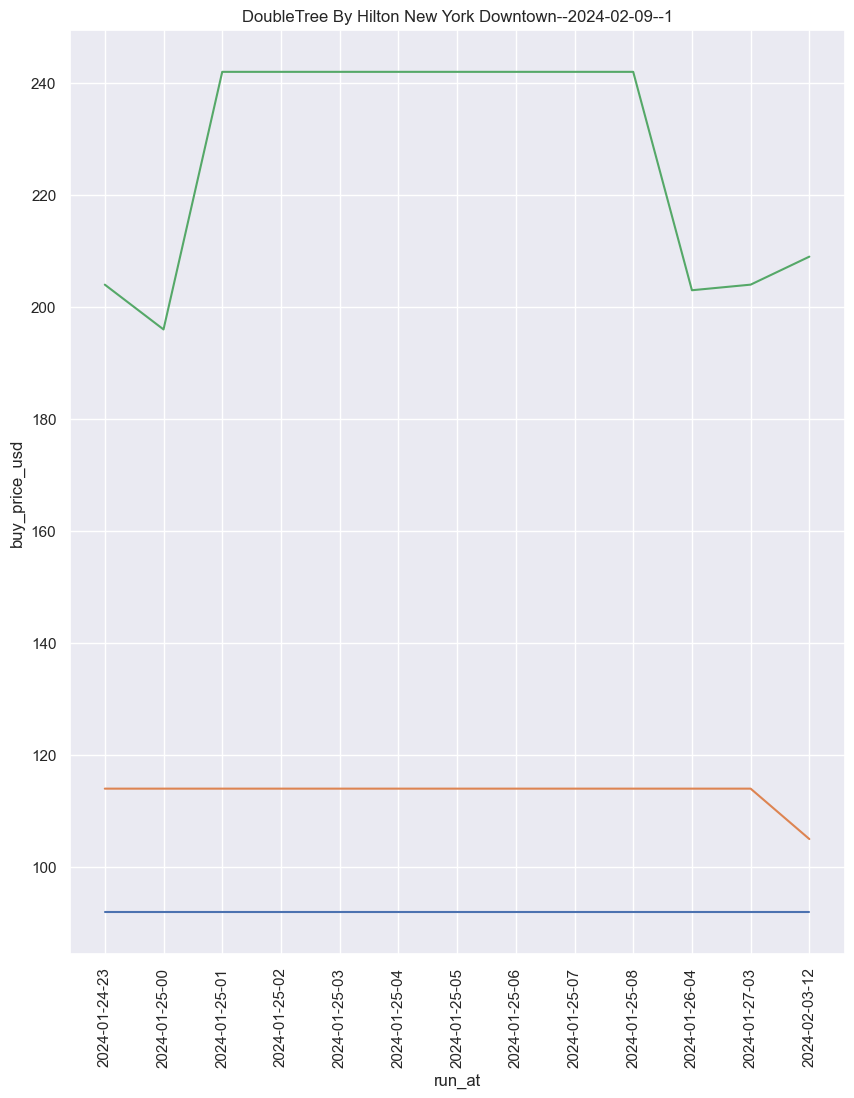

{'created_at': 'Jan 11', 'action': 'buy', 'url': 'https://www.super.com/travel/requests/gj6D1ZJsQx8zXeL0nfNb8w/hotels/EW2ZJRWo', 'hotel_name': 'DoubleTree By Hilton New York Downtown', 'list_price_usd': '$92.00', 'full_price_usd': '$106.00', 'checkin': 'Feb 9', 'checkout': 'Feb 10', 'cancellable_option': 'no', 'cancellable_date': 'N/A', 'room_type': 'King Room', 'adults': '2', 'updated_at': '', 'created_by': 'Khalid', 'notes': 'NY Fashion Week. Lowest Price room in Manhattan. Over 50% below typical Feb ADR', 'screenshot_link': 'https://share.zight.com/4guWzk01', 'clean_checkin': Timestamp('2024-02-08 19:00:00-0500', tz='America/New_York'), 'clean_checkout': Timestamp('2024-02-09 19:00:00-0500', tz='America/New_York'), 'checkin_date': '2024-02-09', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-11 00:00:00')}


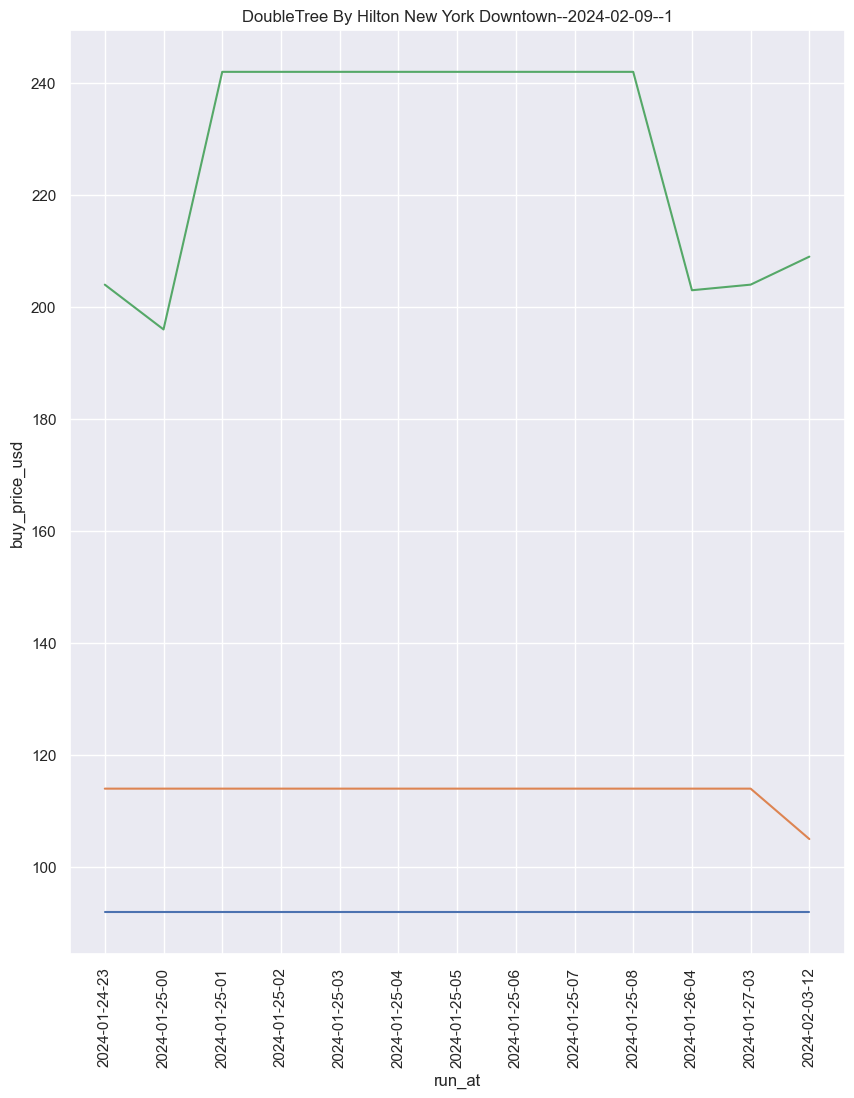

{'created_at': 'Jan 11', 'action': 'buy', 'url': 'https://www.super.com/travel/bookings/738050a6-422d-4b38-8e64-d6c25c826706', 'hotel_name': 'Candlewood Suites New York City-Times Square, An IHG Hotel', 'list_price_usd': '$103.00', 'full_price_usd': '$124.00', 'checkin': 'Feb 9', 'checkout': 'Feb 10', 'cancellable_option': 'yes', 'cancellable_date': 'Feb 3', 'room_type': 'Queen Suite', 'adults': '2', 'updated_at': '', 'created_by': 'Khalid', 'notes': "NY Fashion Week. One of the lowest room in Manhattan. No resort fee, and multiple beds thanks to the 'suite'. Over 40% below typical Feb ADR", 'screenshot_link': 'https://share.zight.com/nOuJY0jq', 'clean_checkin': Timestamp('2024-02-08 19:00:00-0500', tz='America/New_York'), 'clean_checkout': Timestamp('2024-02-09 19:00:00-0500', tz='America/New_York'), 'checkin_date': '2024-02-09', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-11 00:00:00')}
{'created_at': 'Jan 11', 'action': 'buy', 'url': 'https://www.super.com/travel/boo

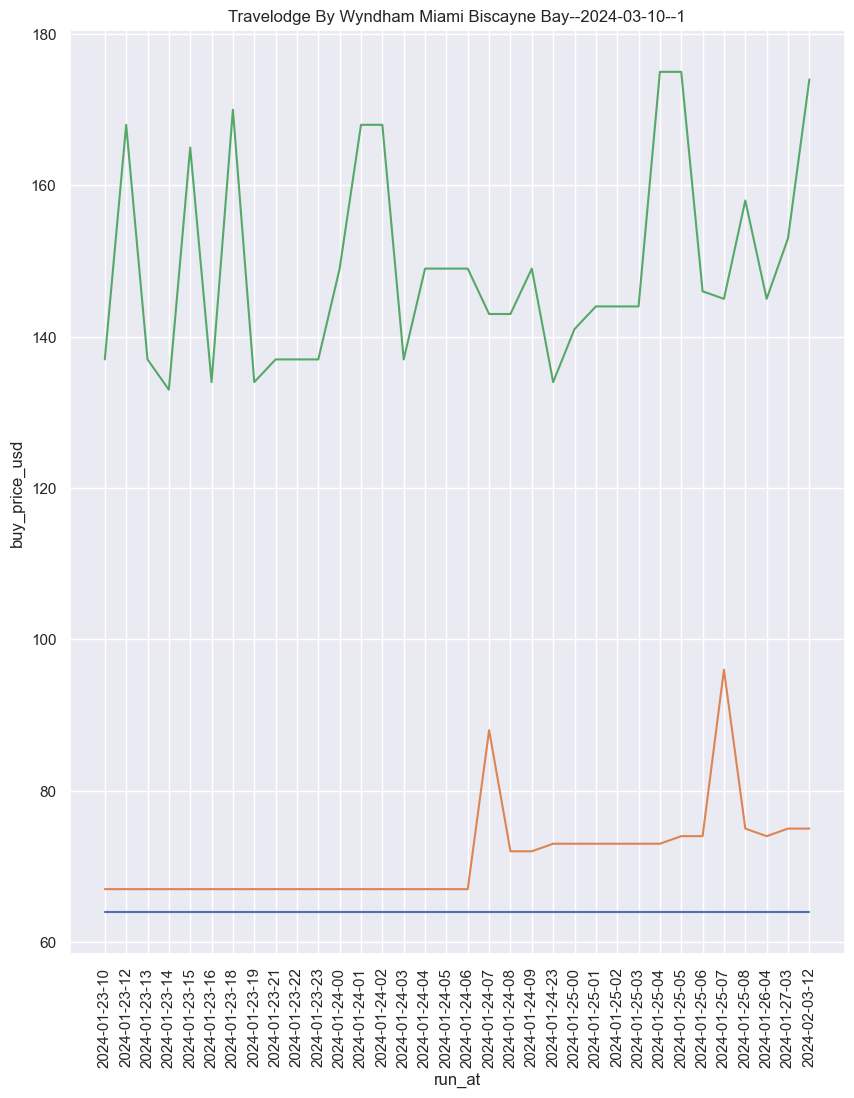

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=miami%20hotels&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAESCgoCCAMKAggDEAAaMwoVEhEKCC9tLzBmMnYwOgVNaWFtaRoAEhoSFAoHCOgPEAMYChIHCOgPEAMYDhgEMgIIASoQCgU6A1VTRBoAIgUSAxCWAQ&qs=CAEgACgAMidDaGtJaXUyaXBZR185WmRYR2cwdlp5OHhNV2QzYlRsbk4yWXpFQUU4DUgA&ap=KigKEgkj86CzGso5QBFVw0Di0QxUwBISCaH5ayAQ3DlAEVXDQEoRC1TAMABoAQ&ictx=1&sa=X&sqi=2&ved=0CAAQ5JsGahgKEwiI2vS8596DAxUAAAAAHQAAAAAQzwY&utm_campaign=sharing&utm_medium=link_btn&utm_source=htls', 'hotel_name': 'Travelodge By Wyndham Miami Biscayne Bay', 'list_price_usd': '$64.00', 'full_price_usd': '$72.25', 'checkin': 'Mar 11', 'checkout': 'Mar 12', 'cancellab

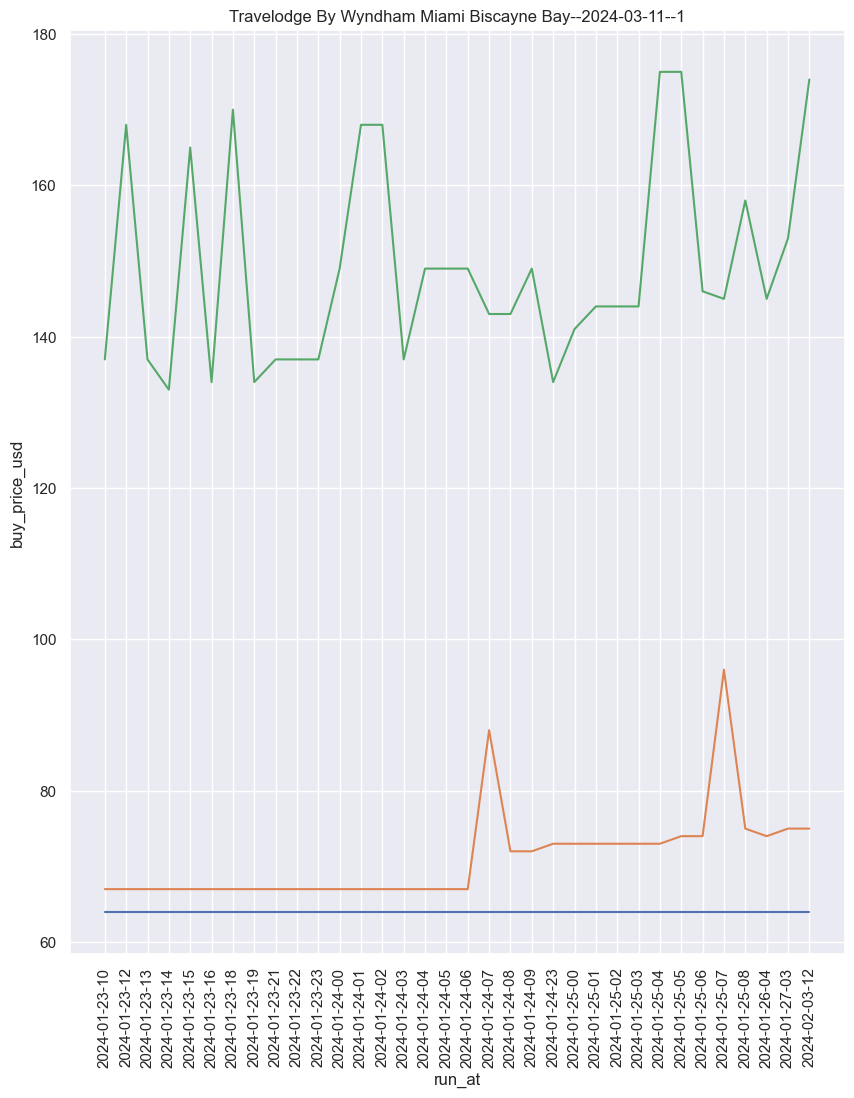

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=miami%20hotels&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAESCgoCCAMKAggDEAAaMwoVEhEKCC9tLzBmMnYwOgVNaWFtaRoAEhoSFAoHCOgPEAMYChIHCOgPEAMYDhgEMgIIASoQCgU6A1VTRBoAIgUSAxCWAQ&qs=CAEgACgAMidDaGtJaXUyaXBZR185WmRYR2cwdlp5OHhNV2QzYlRsbk4yWXpFQUU4DUgA&ap=KigKEgkj86CzGso5QBFVw0Di0QxUwBISCaH5ayAQ3DlAEVXDQEoRC1TAMABoAQ&ictx=1&sa=X&sqi=2&ved=0CAAQ5JsGahgKEwiI2vS8596DAxUAAAAAHQAAAAAQzwY&utm_campaign=sharing&utm_medium=link_btn&utm_source=htls', 'hotel_name': 'Travelodge By Wyndham Miami Biscayne Bay', 'list_price_usd': '$64.00', 'full_price_usd': '$72.25', 'checkin': 'Mar 12', 'checkout': 'Mar 13', 'cancellab

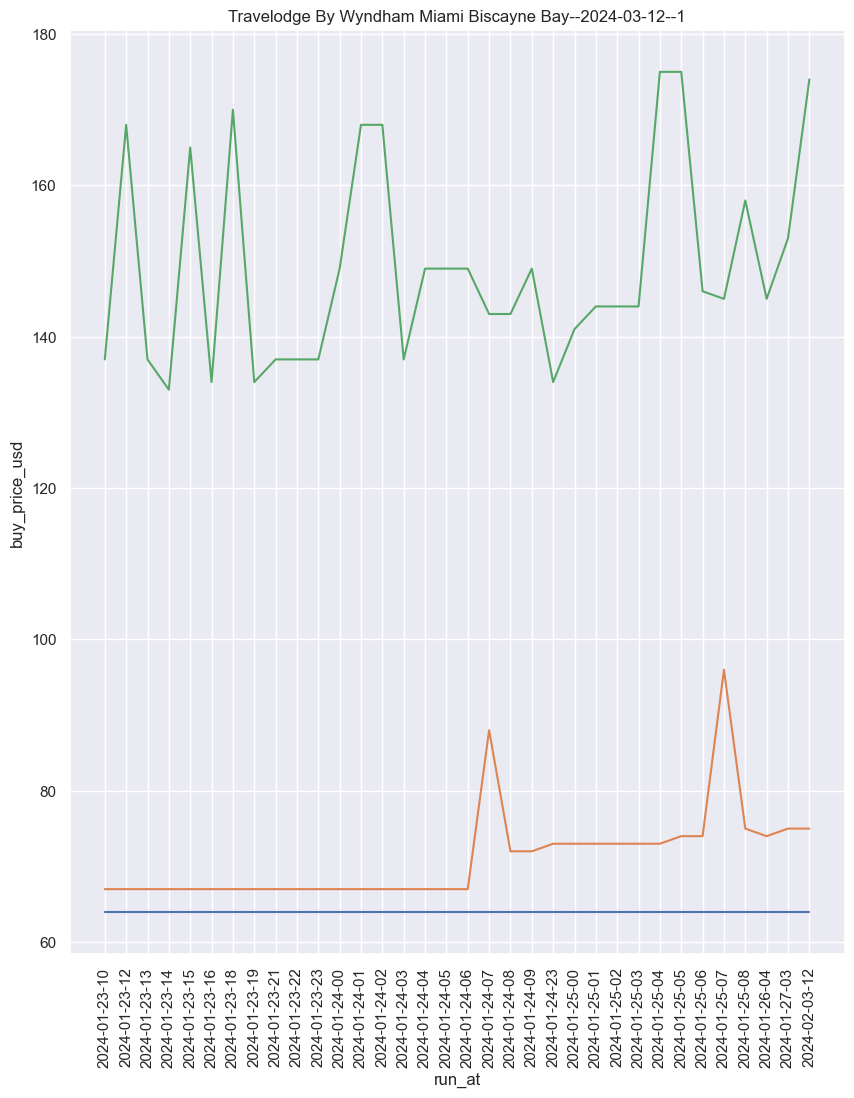

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=miami%20hotels&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAESCgoCCAMKAggDEAAaMwoVEhEKCC9tLzBmMnYwOgVNaWFtaRoAEhoSFAoHCOgPEAMYChIHCOgPEAMYDhgEMgIIASoQCgU6A1VTRBoAIgUSAxCWAQ&qs=CAEgACgAMidDaGtJaXUyaXBZR185WmRYR2cwdlp5OHhNV2QzYlRsbk4yWXpFQUU4DUgA&ap=KigKEgkj86CzGso5QBFVw0Di0QxUwBISCaH5ayAQ3DlAEVXDQEoRC1TAMABoAQ&ictx=1&sa=X&sqi=2&ved=0CAAQ5JsGahgKEwiI2vS8596DAxUAAAAAHQAAAAAQzwY&utm_campaign=sharing&utm_medium=link_btn&utm_source=htls', 'hotel_name': 'Travelodge By Wyndham Miami Biscayne Bay', 'list_price_usd': '$64.00', 'full_price_usd': '$72.25', 'checkin': 'Mar 13', 'checkout': 'Mar 14', 'cancellab

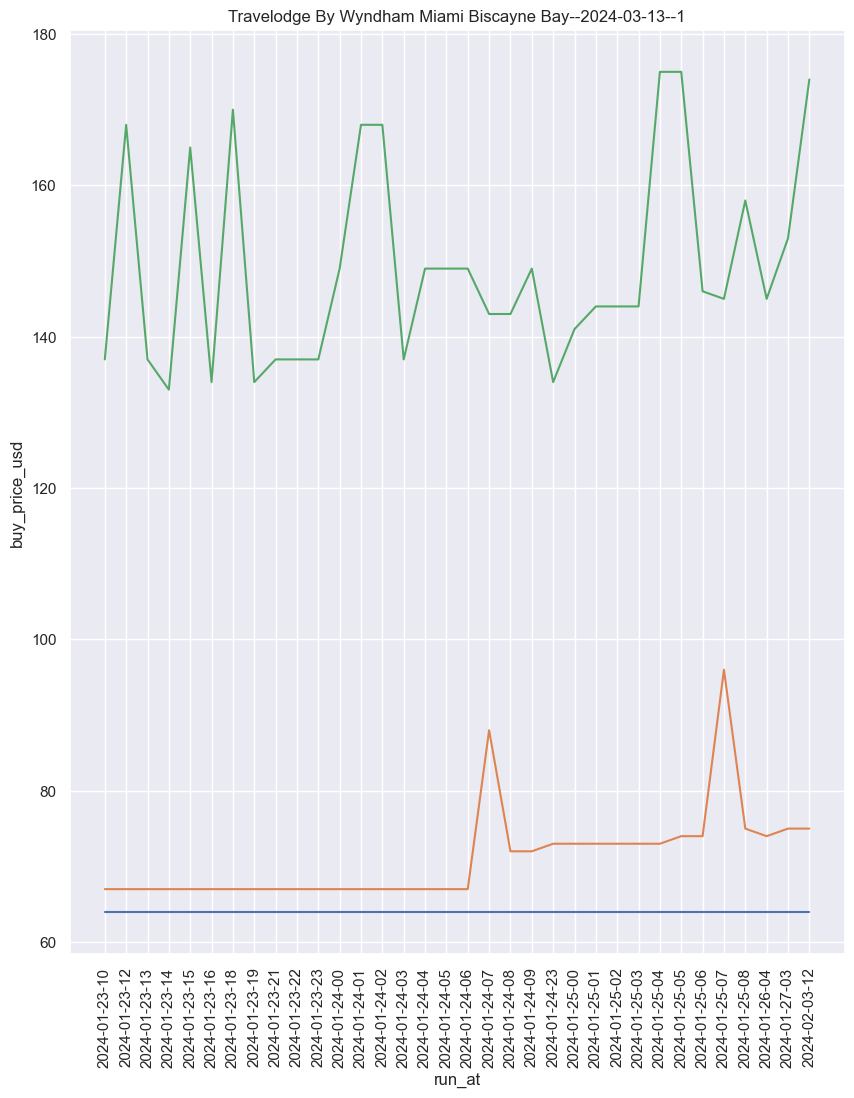

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=jdv%20by%20hyatt%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAESCgoCCAMKAggDEAAaIAoCGgASGhIUCgcI6A8QBBgGEgcI6A8QBBgHGAEyAggBKhAKBToDVVNEGgAiBRIDEIsB&qs=CAEgASgAMidDaGtJcVkza3FveWo0OS1wQVJvTUwyY3ZNV2hqTW5wb2NuWjRFQUVIAA&ap=KigKEgn-iR5J0cZFQBHFypkTR9lTwBISCYQ5vu6-4kVAEcXKmQPw1lPAMABoAQ&ictx=1&sa=X&sqi=2&ved=0CAAQ5JsGahgKEwiI2vS8596DAxUAAAAAHQAAAAAQ-g0', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 6', 'checkout': 'April 7', 'cancellable_option': 'yes', 'cancellable_date': 'Mar 31', 'room_type': 'Classic Room', 'adults': 

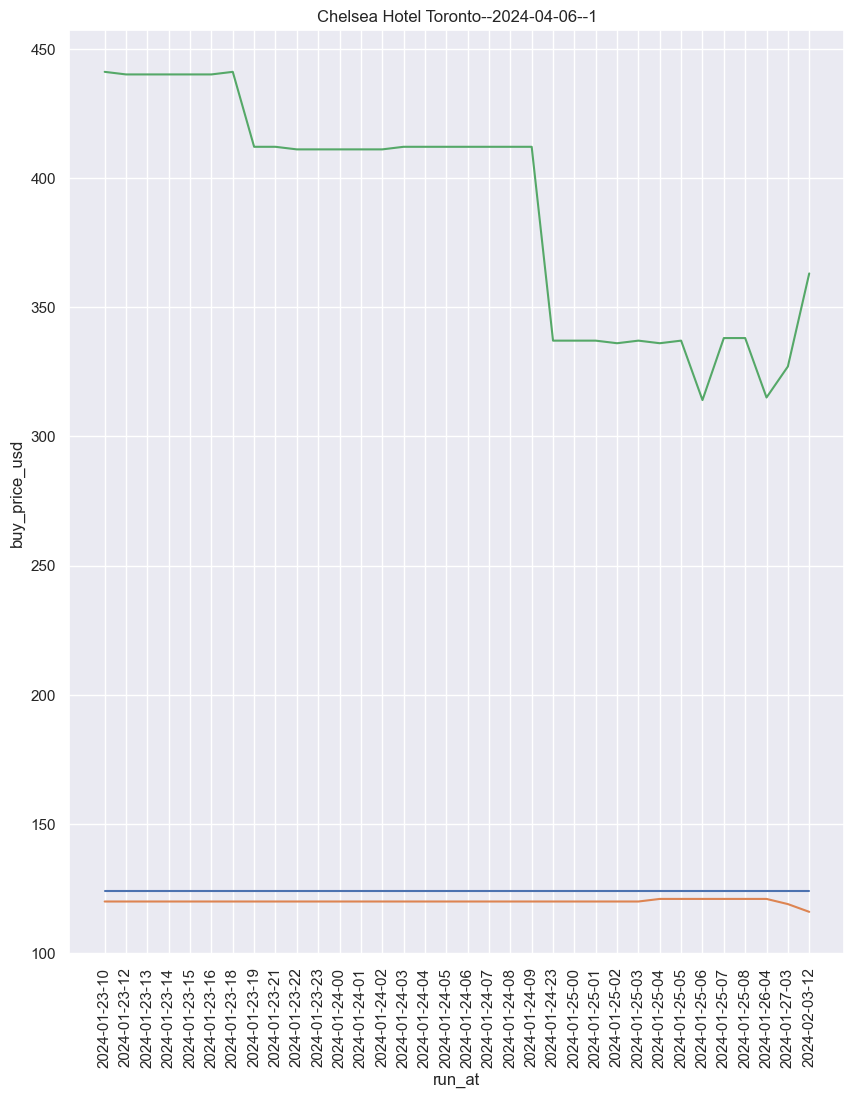

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=jdv%20by%20hyatt%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAESCgoCCAMKAggDEAAaIAoCGgASGhIUCgcI6A8QBBgGEgcI6A8QBBgHGAEyAggBKhAKBToDVVNEGgAiBRIDEIsB&qs=CAEgASgAMidDaGtJcVkza3FveWo0OS1wQVJvTUwyY3ZNV2hqTW5wb2NuWjRFQUVIAA&ap=KigKEgn-iR5J0cZFQBHFypkTR9lTwBISCYQ5vu6-4kVAEcXKmQPw1lPAMABoAQ&ictx=1&sa=X&sqi=2&ved=0CAAQ5JsGahgKEwiI2vS8596DAxUAAAAAHQAAAAAQ-g0', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 6', 'checkout': 'April 7', 'cancellable_option': 'yes', 'cancellable_date': 'Mar 31', 'room_type': 'Classic Room', 'adults': 

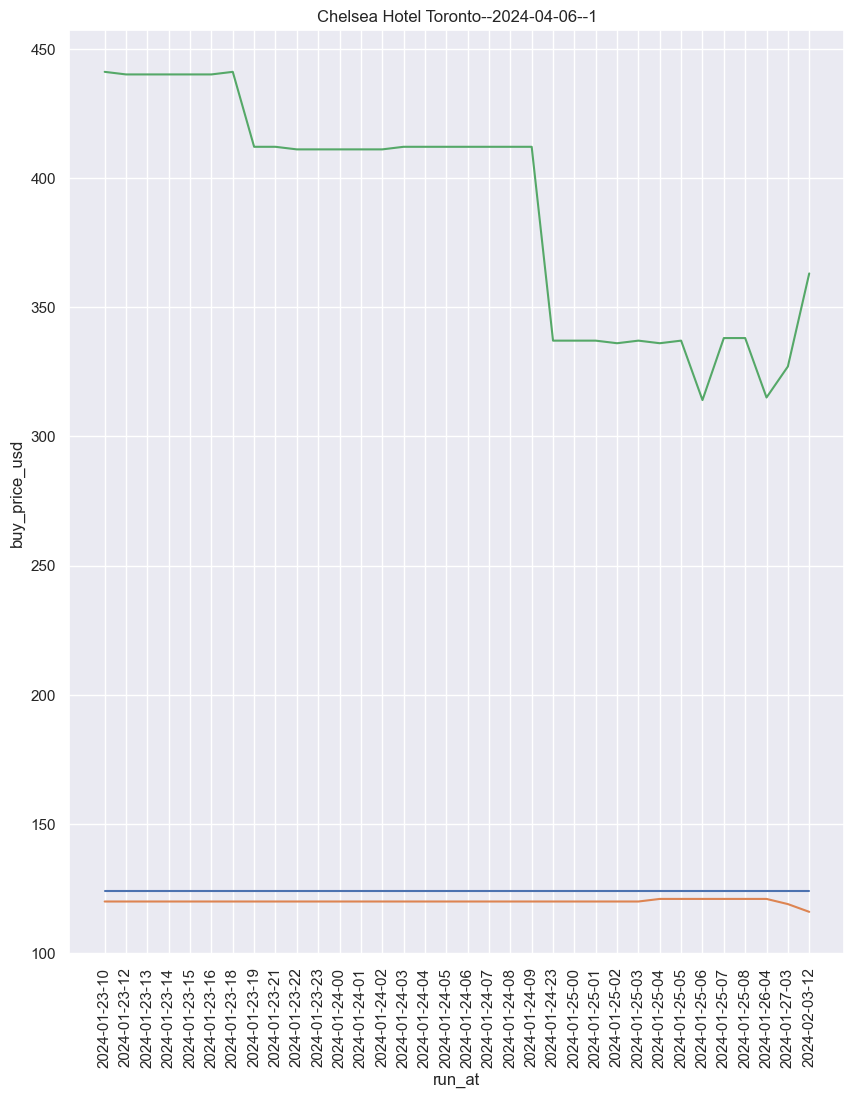

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=chelsea%20hotel%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAEaSQorEicyJTB4ODgyYjM0YjU3Zjg4YWFkNToweGE5YmY4ZDE4YzU1OTA2YTkaABIaEhQKBwjoDxAEGAUSBwjoDxAEGAYYATICCAEqCQoFOgNDQUQaAA&qs=CAEyJ0Noa0lxWTNrcW95ajQ5LXBBUm9NTDJjdk1XaGpNbnBvY25aNEVBRTgCQgkJqQZZxRiNv6lCCQmpBlnFGI2_qQ&ap=ugEGcHJpY2Vz&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwiQ4qWU9d6DAxUAAAAAHQAAAAAQEA', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 5', 'checkout': 'April 6', 'cancellable_option': 'yes', 'cancellable_date': 'Mar 30', 'room_type': 'Classic Room', 'adults': '2',

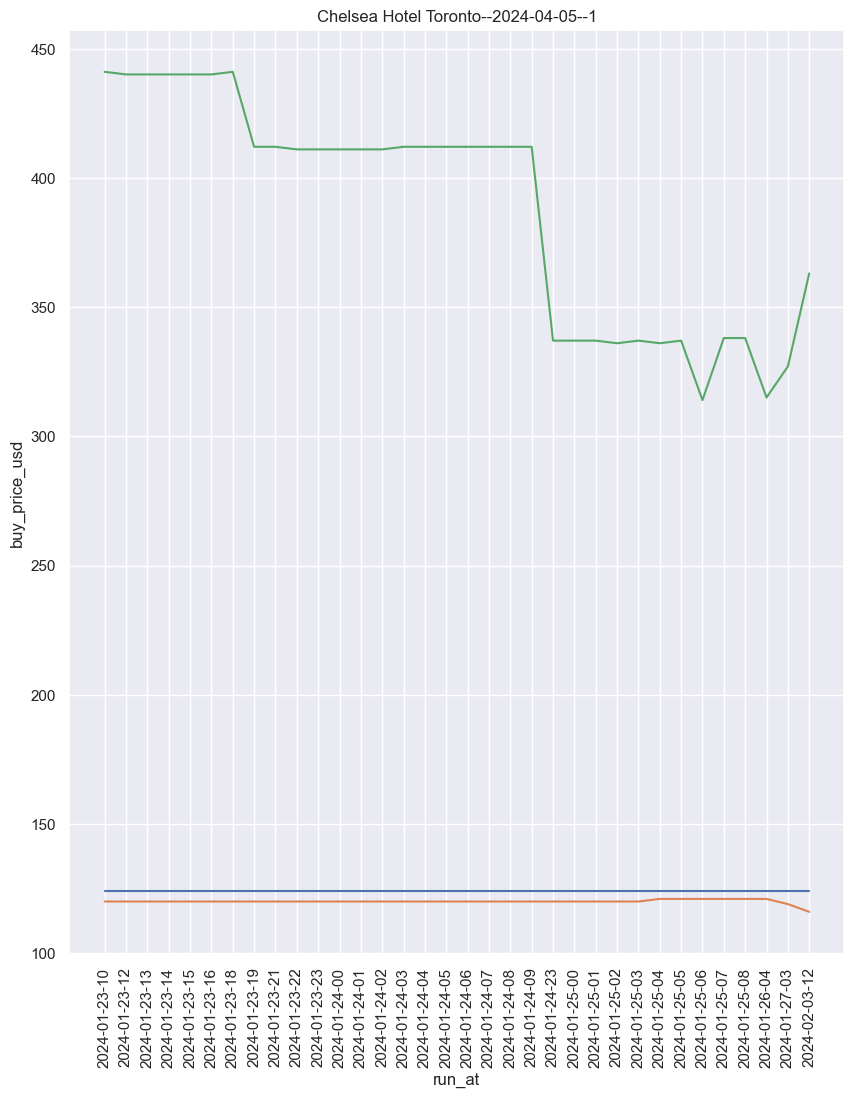

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=chelsea%20hotel%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAEaSQorEicyJTB4ODgyYjM0YjU3Zjg4YWFkNToweGE5YmY4ZDE4YzU1OTA2YTkaABIaEhQKBwjoDxAEGAUSBwjoDxAEGAYYATICCAEqCQoFOgNDQUQaAA&qs=CAEyJ0Noa0lxWTNrcW95ajQ5LXBBUm9NTDJjdk1XaGpNbnBvY25aNEVBRTgCQgkJqQZZxRiNv6lCCQmpBlnFGI2_qQ&ap=ugEGcHJpY2Vz&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwiQ4qWU9d6DAxUAAAAAHQAAAAAQEA', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 5', 'checkout': 'April 6', 'cancellable_option': 'yes', 'cancellable_date': 'Mar 30', 'room_type': 'Classic Room', 'adults': '2',

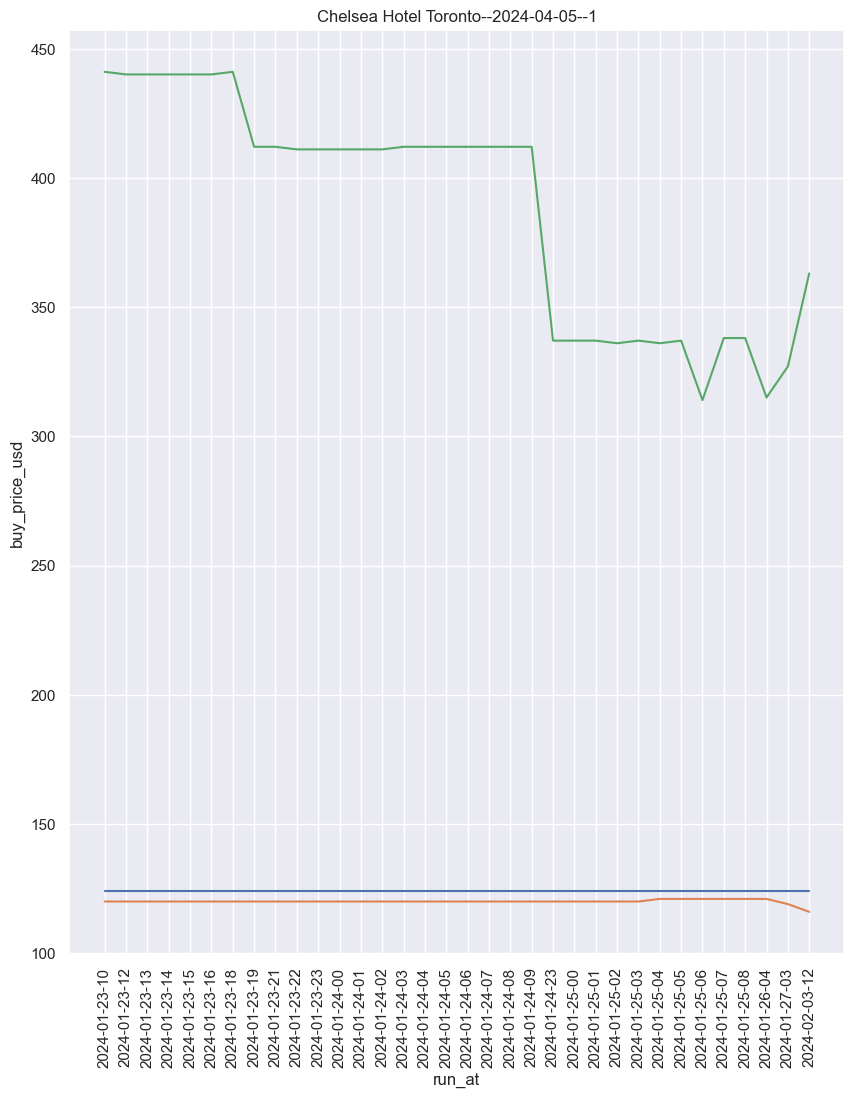

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=chelsea%20hotel%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAEaSQorEicyJTB4ODgyYjM0YjU3Zjg4YWFkNToweGE5YmY4ZDE4YzU1OTA2YTkaABIaEhQKBwjoDxAEGAUSBwjoDxAEGAYYATICCAEqCQoFOgNDQUQaAA&qs=CAEyJ0Noa0lxWTNrcW95ajQ5LXBBUm9NTDJjdk1XaGpNbnBvY25aNEVBRTgCQgkJqQZZxRiNv6lCCQmpBlnFGI2_qQ&ap=ugEGcHJpY2Vz&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwiQ4qWU9d6DAxUAAAAAHQAAAAAQEA', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 7', 'checkout': 'April 8', 'cancellable_option': 'yes', 'cancellable_date': 'Apr 1', 'room_type': 'Classic Room', 'adults': '2', 

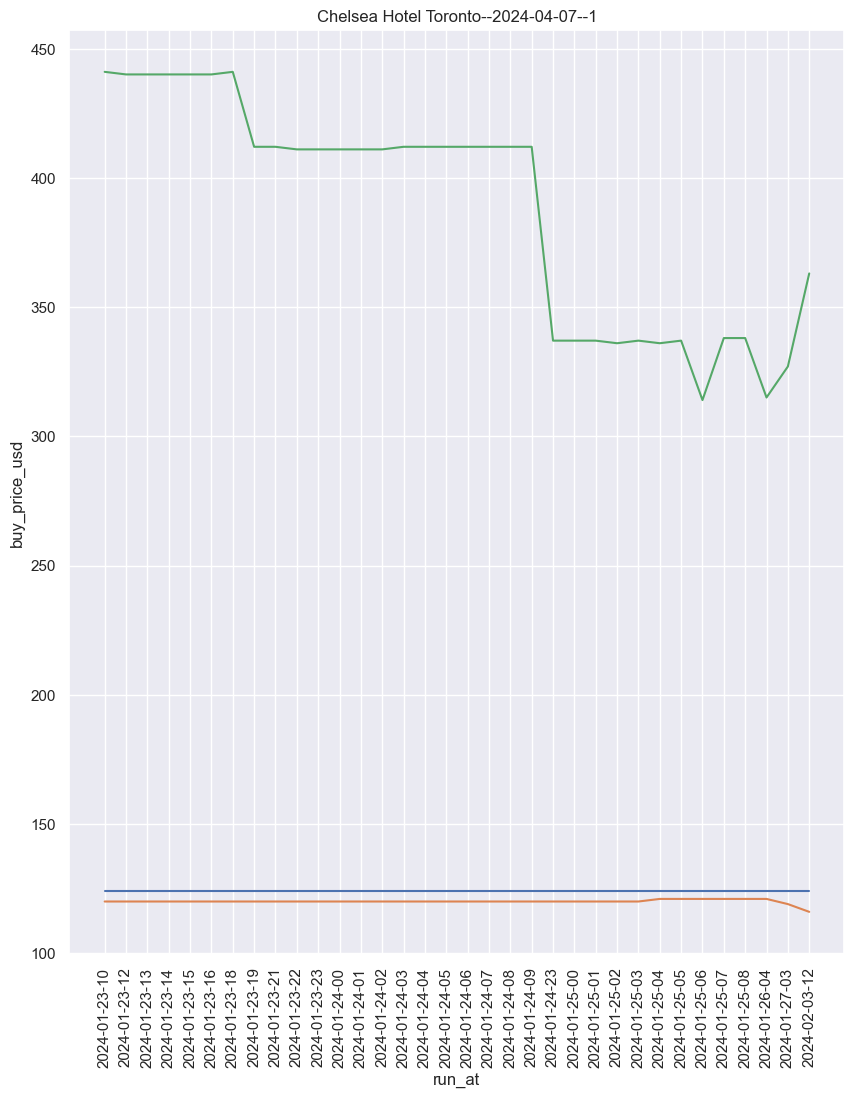

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=chelsea%20hotel%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAEaSQorEicyJTB4ODgyYjM0YjU3Zjg4YWFkNToweGE5YmY4ZDE4YzU1OTA2YTkaABIaEhQKBwjoDxAEGAUSBwjoDxAEGAYYATICCAEqCQoFOgNDQUQaAA&qs=CAEyJ0Noa0lxWTNrcW95ajQ5LXBBUm9NTDJjdk1XaGpNbnBvY25aNEVBRTgCQgkJqQZZxRiNv6lCCQmpBlnFGI2_qQ&ap=ugEGcHJpY2Vz&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwiQ4qWU9d6DAxUAAAAAHQAAAAAQEA', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 8', 'checkout': 'April 9', 'cancellable_option': 'yes', 'cancellable_date': 'Apr 2', 'room_type': 'Classic Room', 'adults': '2', 

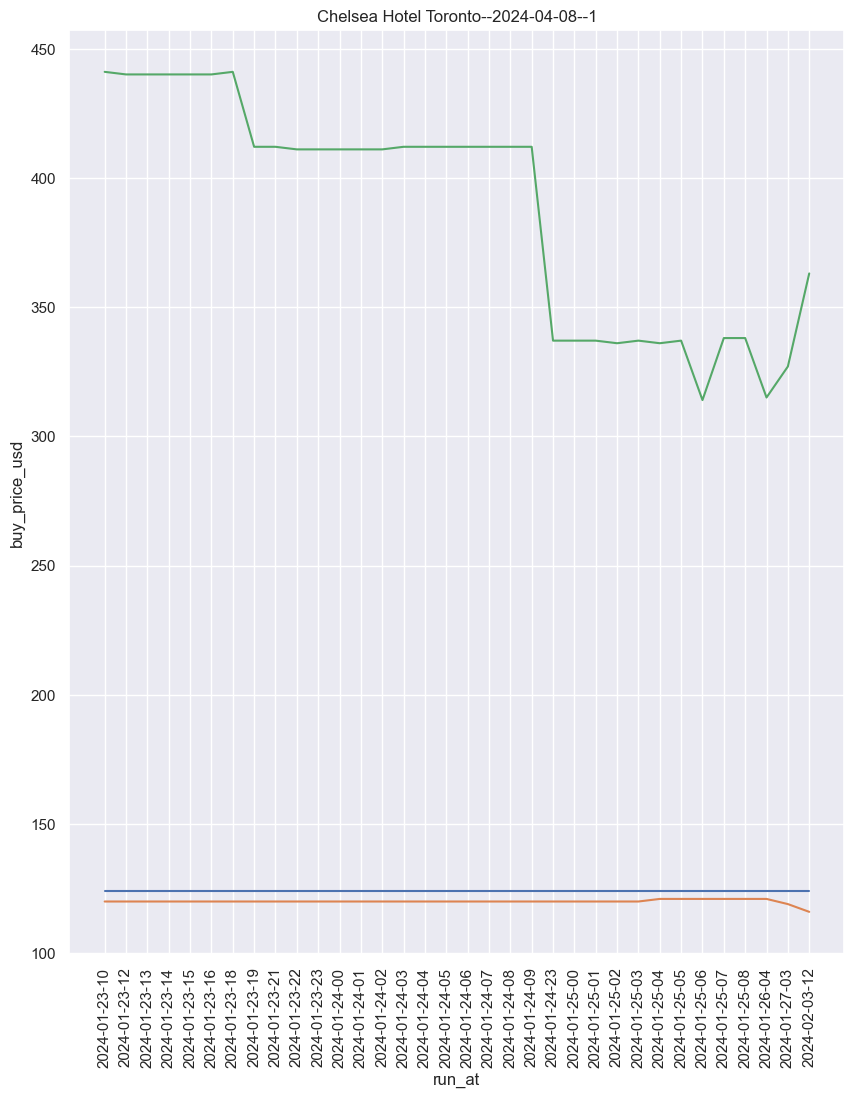

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=chelsea%20hotel%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAEaSQorEicyJTB4ODgyYjM0YjU3Zjg4YWFkNToweGE5YmY4ZDE4YzU1OTA2YTkaABIaEhQKBwjoDxAEGAUSBwjoDxAEGAYYATICCAEqCQoFOgNDQUQaAA&qs=CAEyJ0Noa0lxWTNrcW95ajQ5LXBBUm9NTDJjdk1XaGpNbnBvY25aNEVBRTgCQgkJqQZZxRiNv6lCCQmpBlnFGI2_qQ&ap=ugEGcHJpY2Vz&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwiQ4qWU9d6DAxUAAAAAHQAAAAAQEA', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 9', 'checkout': 'April 10', 'cancellable_option': 'yes', 'cancellable_date': 'Apr 3', 'room_type': 'Classic Room', 'adults': '2',

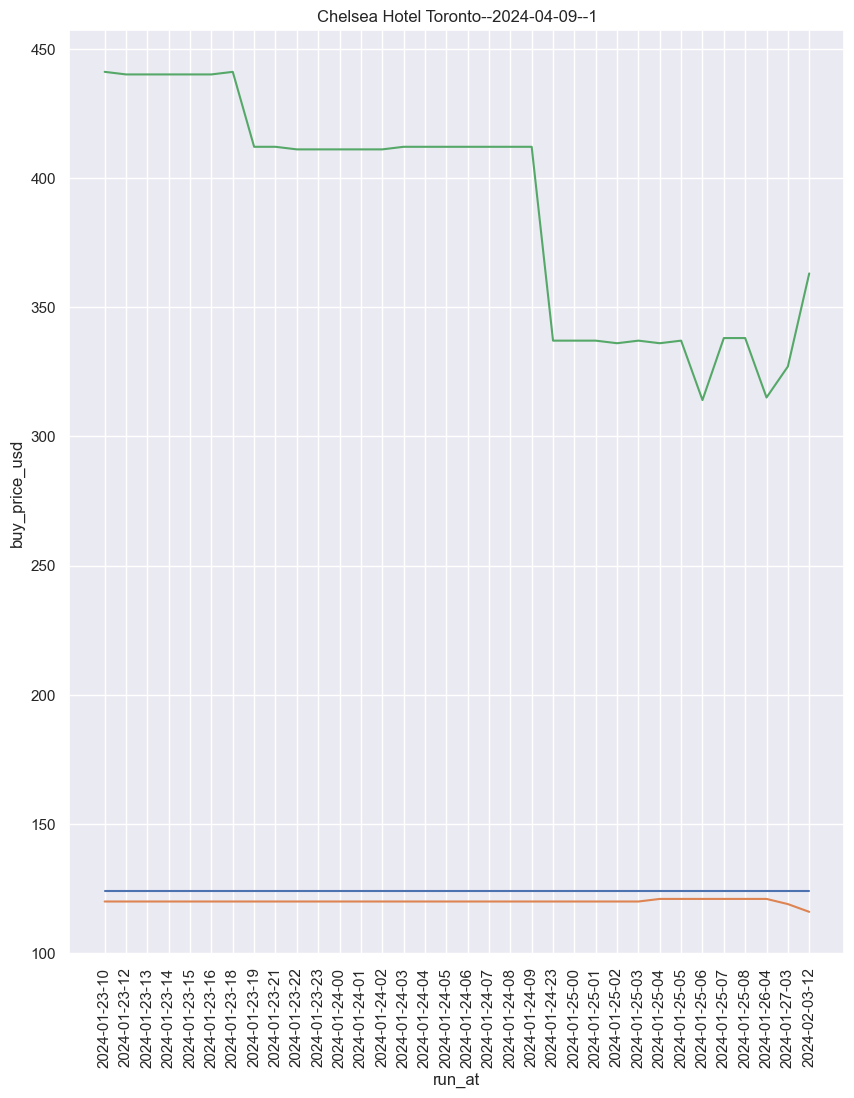

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=chelsea%20hotel%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAEaSQorEicyJTB4ODgyYjM0YjU3Zjg4YWFkNToweGE5YmY4ZDE4YzU1OTA2YTkaABIaEhQKBwjoDxAEGAUSBwjoDxAEGAYYATICCAEqCQoFOgNDQUQaAA&qs=CAEyJ0Noa0lxWTNrcW95ajQ5LXBBUm9NTDJjdk1XaGpNbnBvY25aNEVBRTgCQgkJqQZZxRiNv6lCCQmpBlnFGI2_qQ&ap=ugEGcHJpY2Vz&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwiQ4qWU9d6DAxUAAAAAHQAAAAAQEA', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 10', 'checkout': 'April 11', 'cancellable_option': 'yes', 'cancellable_date': 'Apr 4', 'room_type': 'Classic Room', 'adults': '2'

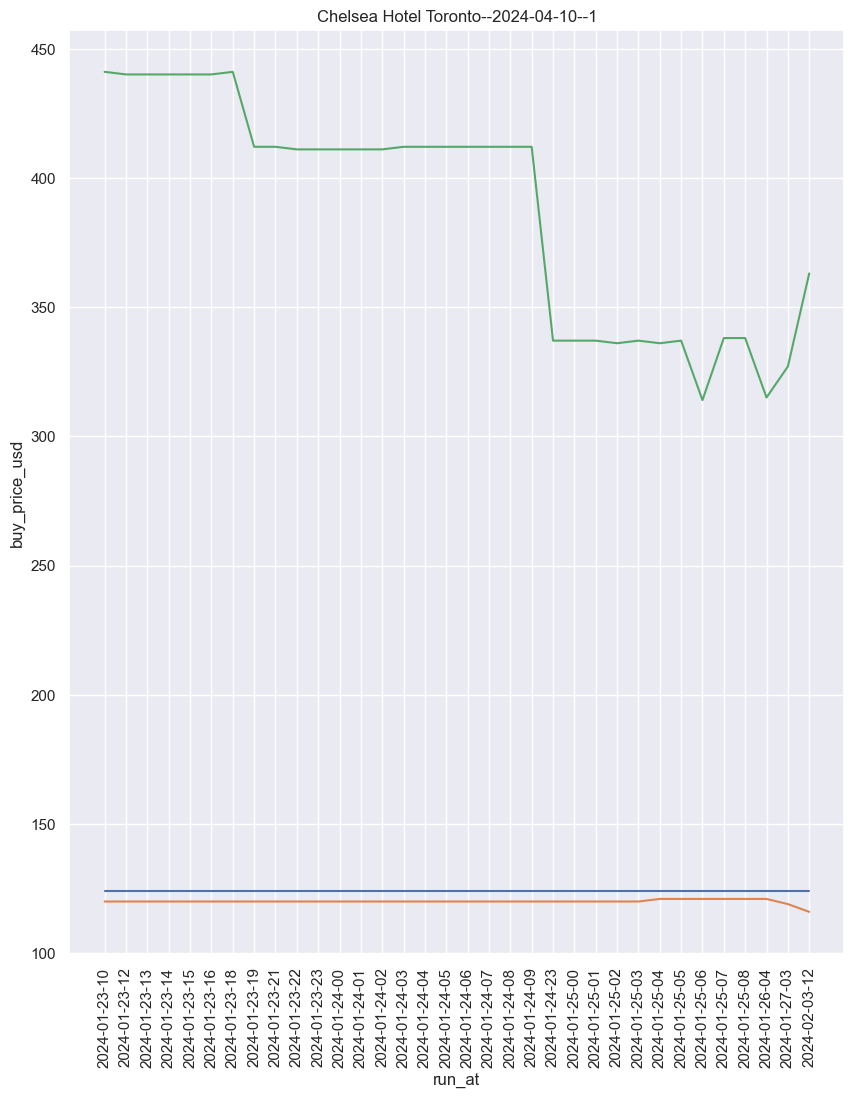

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=chelsea%20hotel%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAEaSQorEicyJTB4ODgyYjM0YjU3Zjg4YWFkNToweGE5YmY4ZDE4YzU1OTA2YTkaABIaEhQKBwjoDxAEGAUSBwjoDxAEGAYYATICCAEqCQoFOgNDQUQaAA&qs=CAEyJ0Noa0lxWTNrcW95ajQ5LXBBUm9NTDJjdk1XaGpNbnBvY25aNEVBRTgCQgkJqQZZxRiNv6lCCQmpBlnFGI2_qQ&ap=ugEGcHJpY2Vz&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwiQ4qWU9d6DAxUAAAAAHQAAAAAQEA', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 11', 'checkout': 'April 12', 'cancellable_option': 'yes', 'cancellable_date': 'Apr 5', 'room_type': 'Classic Room', 'adults': '2'

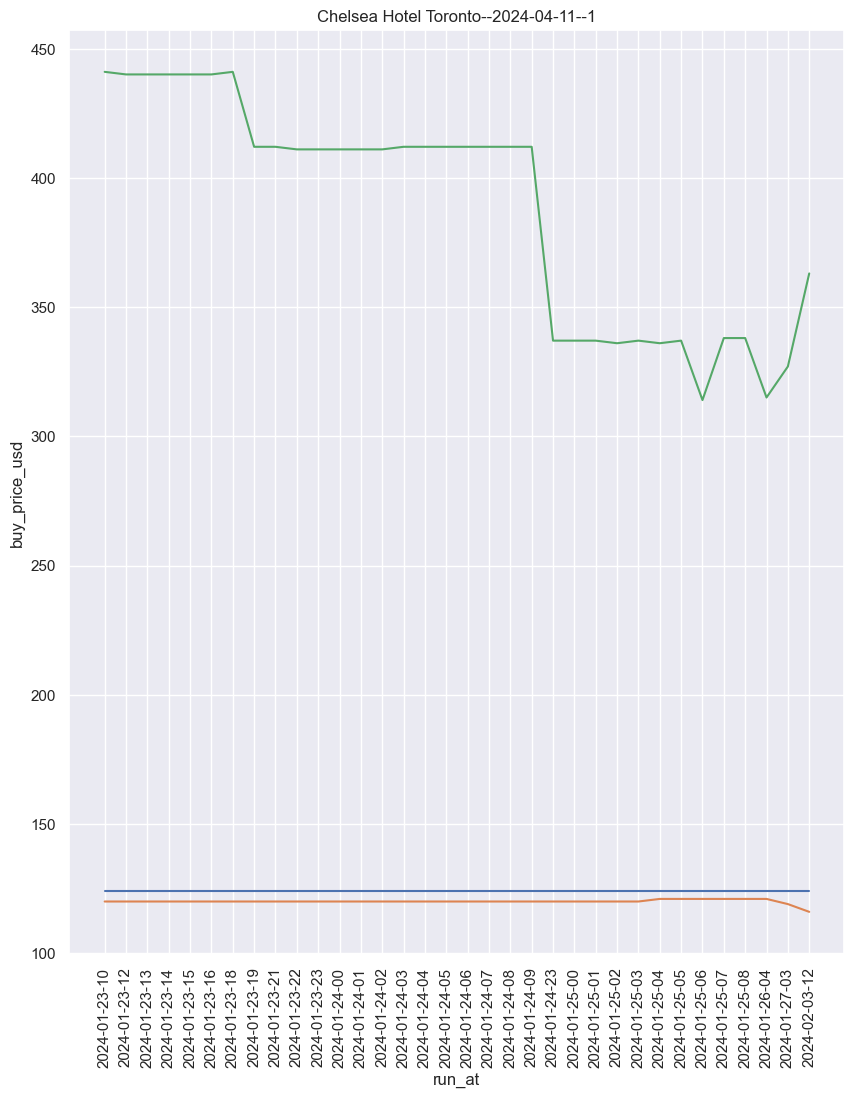

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=chelsea%20hotel%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAEaSQorEicyJTB4ODgyYjM0YjU3Zjg4YWFkNToweGE5YmY4ZDE4YzU1OTA2YTkaABIaEhQKBwjoDxAEGAUSBwjoDxAEGAYYATICCAEqCQoFOgNDQUQaAA&qs=CAEyJ0Noa0lxWTNrcW95ajQ5LXBBUm9NTDJjdk1XaGpNbnBvY25aNEVBRTgCQgkJqQZZxRiNv6lCCQmpBlnFGI2_qQ&ap=ugEGcHJpY2Vz&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwiQ4qWU9d6DAxUAAAAAHQAAAAAQEA', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 12', 'checkout': 'April 13', 'cancellable_option': 'yes', 'cancellable_date': 'Apr 6', 'room_type': 'Classic Room', 'adults': '2'

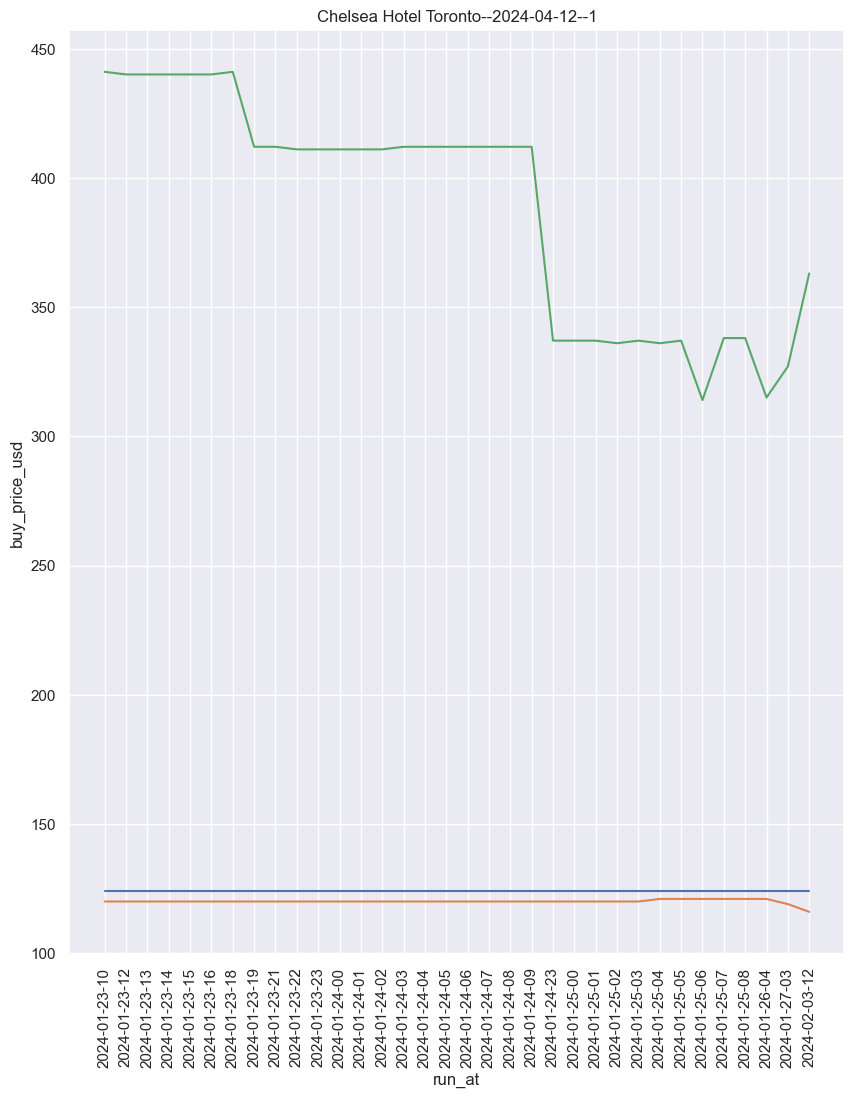

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=chelsea%20hotel%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAEaSQorEicyJTB4ODgyYjM0YjU3Zjg4YWFkNToweGE5YmY4ZDE4YzU1OTA2YTkaABIaEhQKBwjoDxAEGAUSBwjoDxAEGAYYATICCAEqCQoFOgNDQUQaAA&qs=CAEyJ0Noa0lxWTNrcW95ajQ5LXBBUm9NTDJjdk1XaGpNbnBvY25aNEVBRTgCQgkJqQZZxRiNv6lCCQmpBlnFGI2_qQ&ap=ugEGcHJpY2Vz&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwiQ4qWU9d6DAxUAAAAAHQAAAAAQEA', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 13', 'checkout': 'April 14', 'cancellable_option': 'yes', 'cancellable_date': 'Apr 7', 'room_type': 'Classic Room', 'adults': '2'

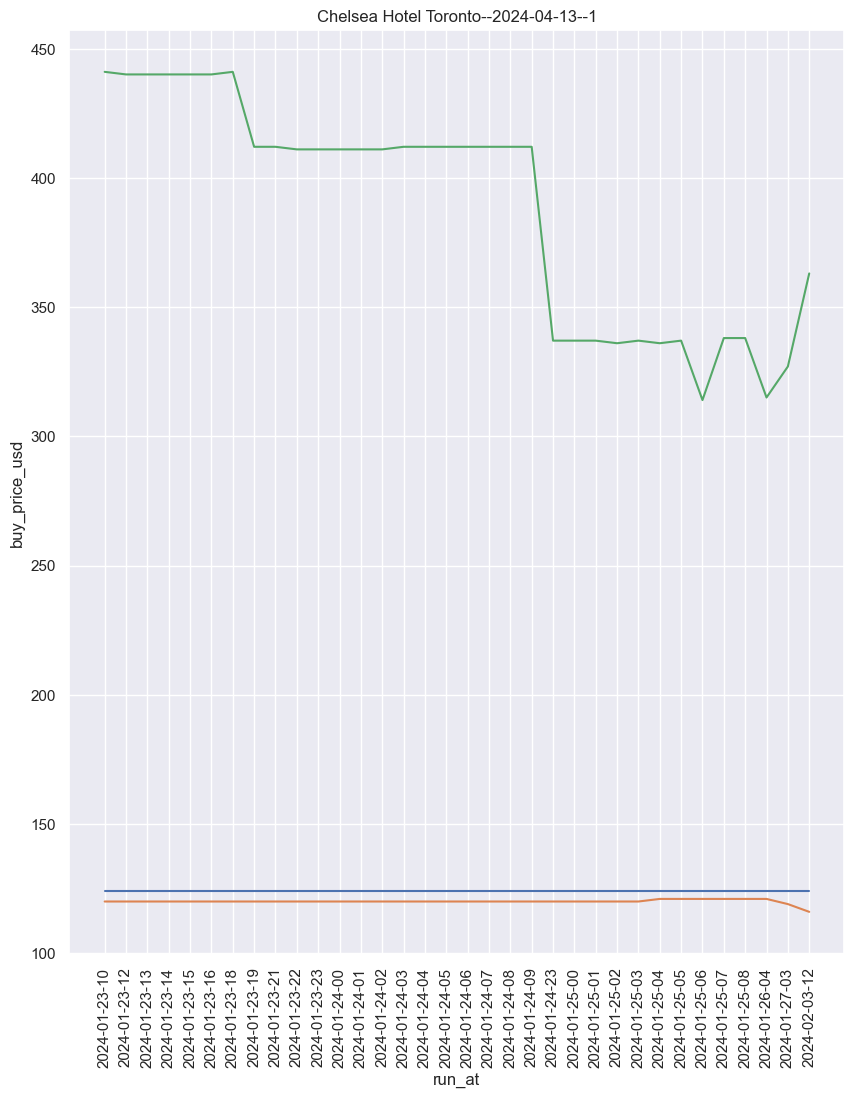

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=chelsea%20hotel%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAEaSQorEicyJTB4ODgyYjM0YjU3Zjg4YWFkNToweGE5YmY4ZDE4YzU1OTA2YTkaABIaEhQKBwjoDxAEGAUSBwjoDxAEGAYYATICCAEqCQoFOgNDQUQaAA&qs=CAEyJ0Noa0lxWTNrcW95ajQ5LXBBUm9NTDJjdk1XaGpNbnBvY25aNEVBRTgCQgkJqQZZxRiNv6lCCQmpBlnFGI2_qQ&ap=ugEGcHJpY2Vz&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwiQ4qWU9d6DAxUAAAAAHQAAAAAQEA', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 14', 'checkout': 'April 15', 'cancellable_option': 'yes', 'cancellable_date': 'Apr 8', 'room_type': 'Classic Room', 'adults': '2'

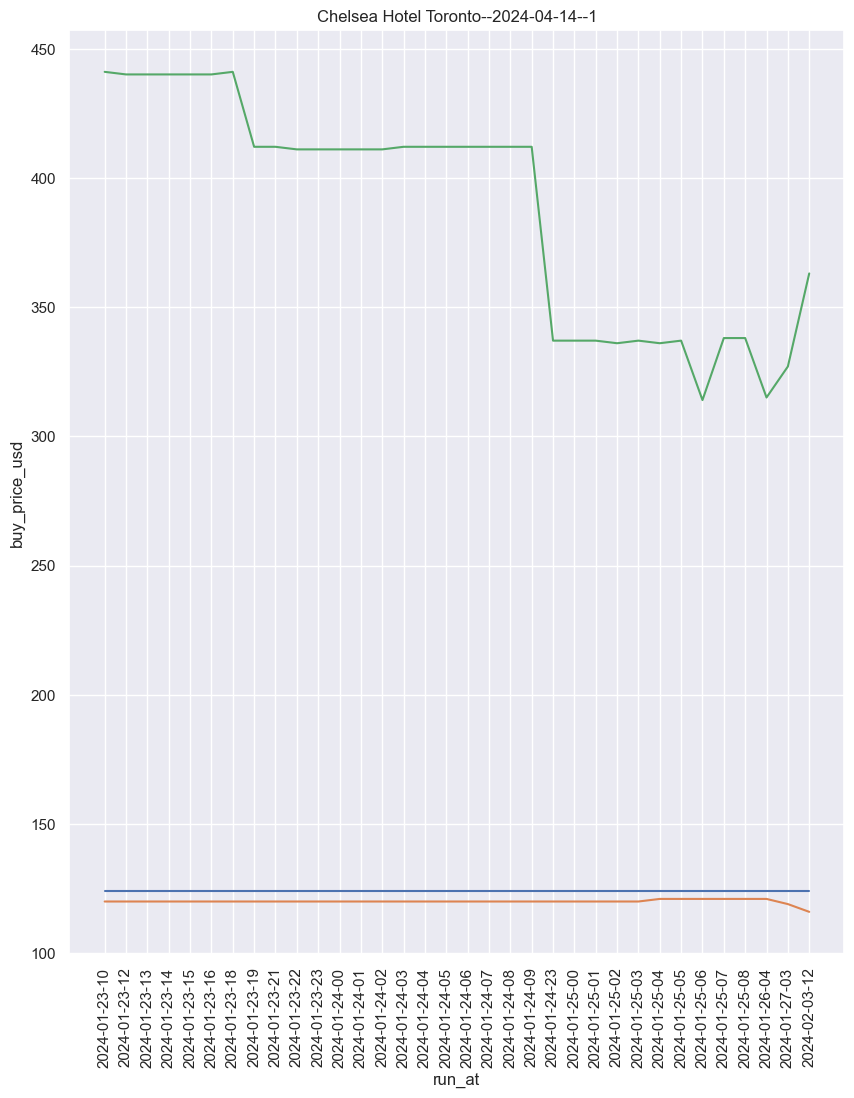

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=chelsea%20hotel%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAEaSQorEicyJTB4ODgyYjM0YjU3Zjg4YWFkNToweGE5YmY4ZDE4YzU1OTA2YTkaABIaEhQKBwjoDxAEGAUSBwjoDxAEGAYYATICCAEqCQoFOgNDQUQaAA&qs=CAEyJ0Noa0lxWTNrcW95ajQ5LXBBUm9NTDJjdk1XaGpNbnBvY25aNEVBRTgCQgkJqQZZxRiNv6lCCQmpBlnFGI2_qQ&ap=ugEGcHJpY2Vz&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwiQ4qWU9d6DAxUAAAAAHQAAAAAQEA', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 15', 'checkout': 'April 16', 'cancellable_option': 'yes', 'cancellable_date': 'Apr 9', 'room_type': 'Classic Room', 'adults': '2'

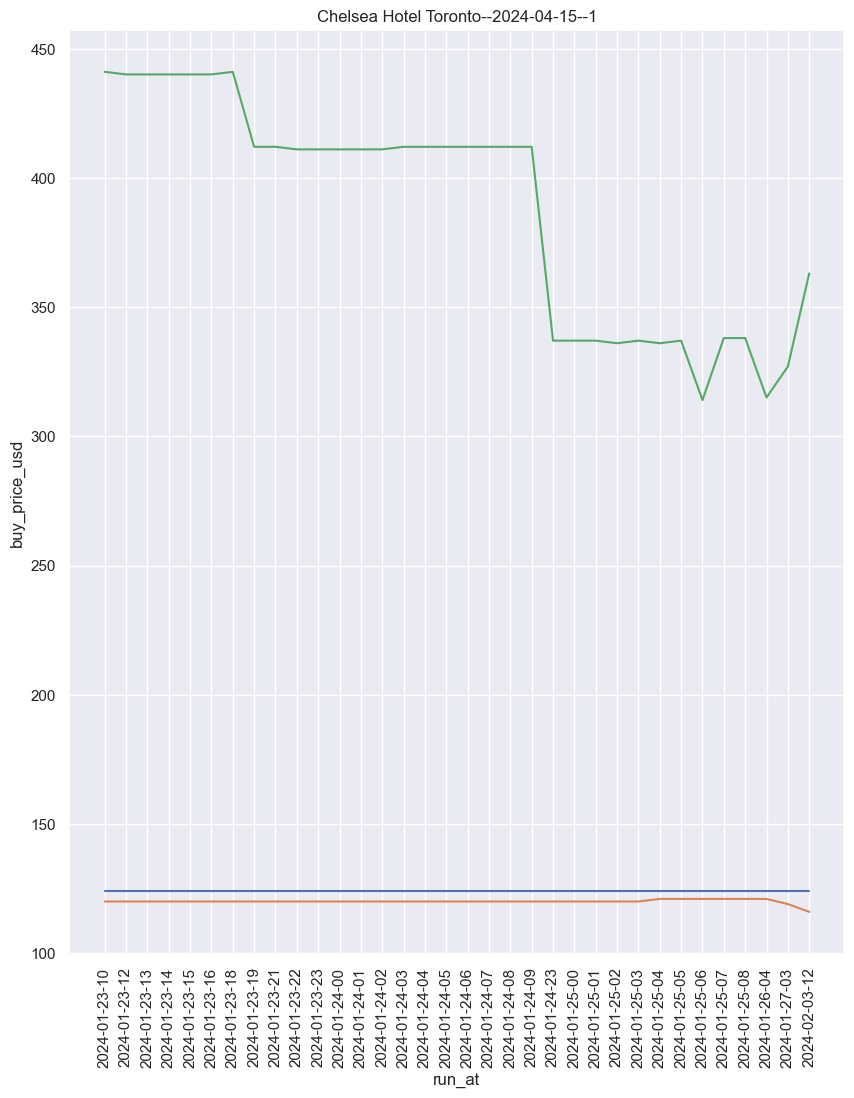

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=chelsea%20hotel%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAEaSQorEicyJTB4ODgyYjM0YjU3Zjg4YWFkNToweGE5YmY4ZDE4YzU1OTA2YTkaABIaEhQKBwjoDxAEGAUSBwjoDxAEGAYYATICCAEqCQoFOgNDQUQaAA&qs=CAEyJ0Noa0lxWTNrcW95ajQ5LXBBUm9NTDJjdk1XaGpNbnBvY25aNEVBRTgCQgkJqQZZxRiNv6lCCQmpBlnFGI2_qQ&ap=ugEGcHJpY2Vz&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwiQ4qWU9d6DAxUAAAAAHQAAAAAQEA', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 16', 'checkout': 'April 17', 'cancellable_option': 'yes', 'cancellable_date': 'Apr 10', 'room_type': 'Classic Room', 'adults': '2

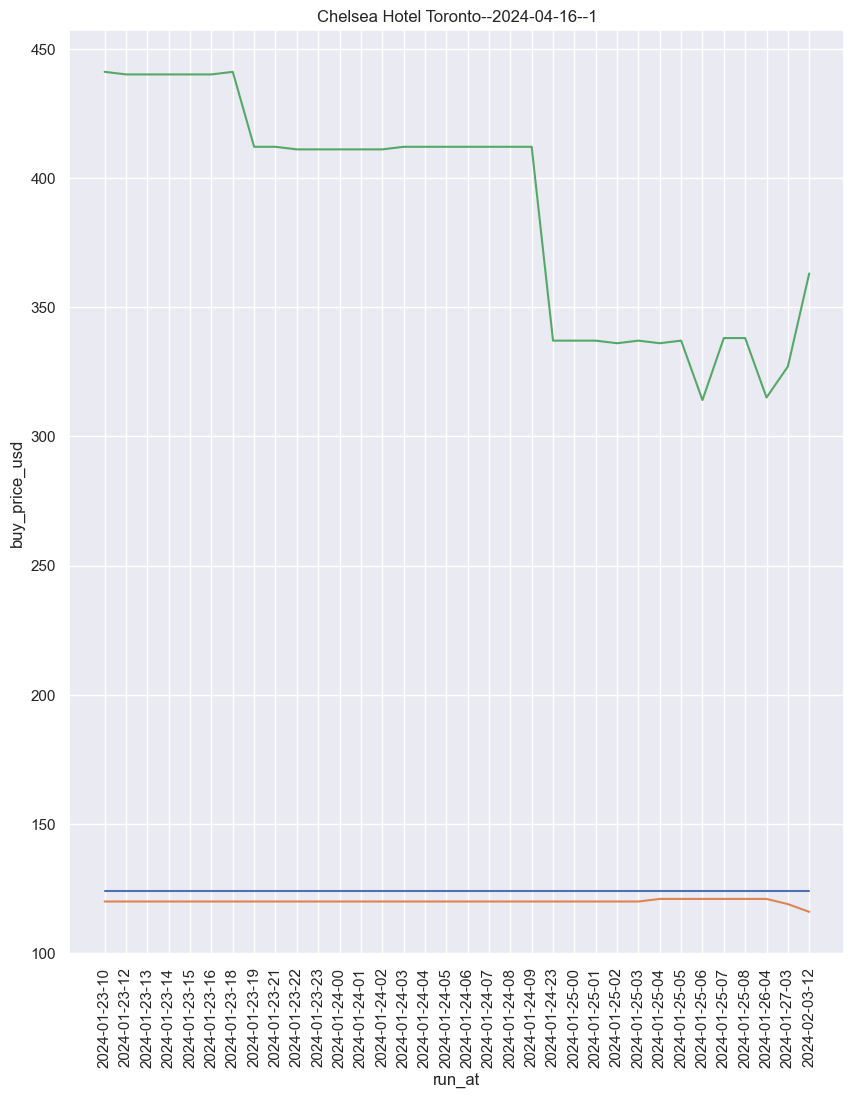

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=chelsea%20hotel%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAEaSQorEicyJTB4ODgyYjM0YjU3Zjg4YWFkNToweGE5YmY4ZDE4YzU1OTA2YTkaABIaEhQKBwjoDxAEGAUSBwjoDxAEGAYYATICCAEqCQoFOgNDQUQaAA&qs=CAEyJ0Noa0lxWTNrcW95ajQ5LXBBUm9NTDJjdk1XaGpNbnBvY25aNEVBRTgCQgkJqQZZxRiNv6lCCQmpBlnFGI2_qQ&ap=ugEGcHJpY2Vz&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwiQ4qWU9d6DAxUAAAAAHQAAAAAQEA', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 17', 'checkout': 'April 18', 'cancellable_option': 'yes', 'cancellable_date': 'Apr 11', 'room_type': 'Classic Room', 'adults': '2

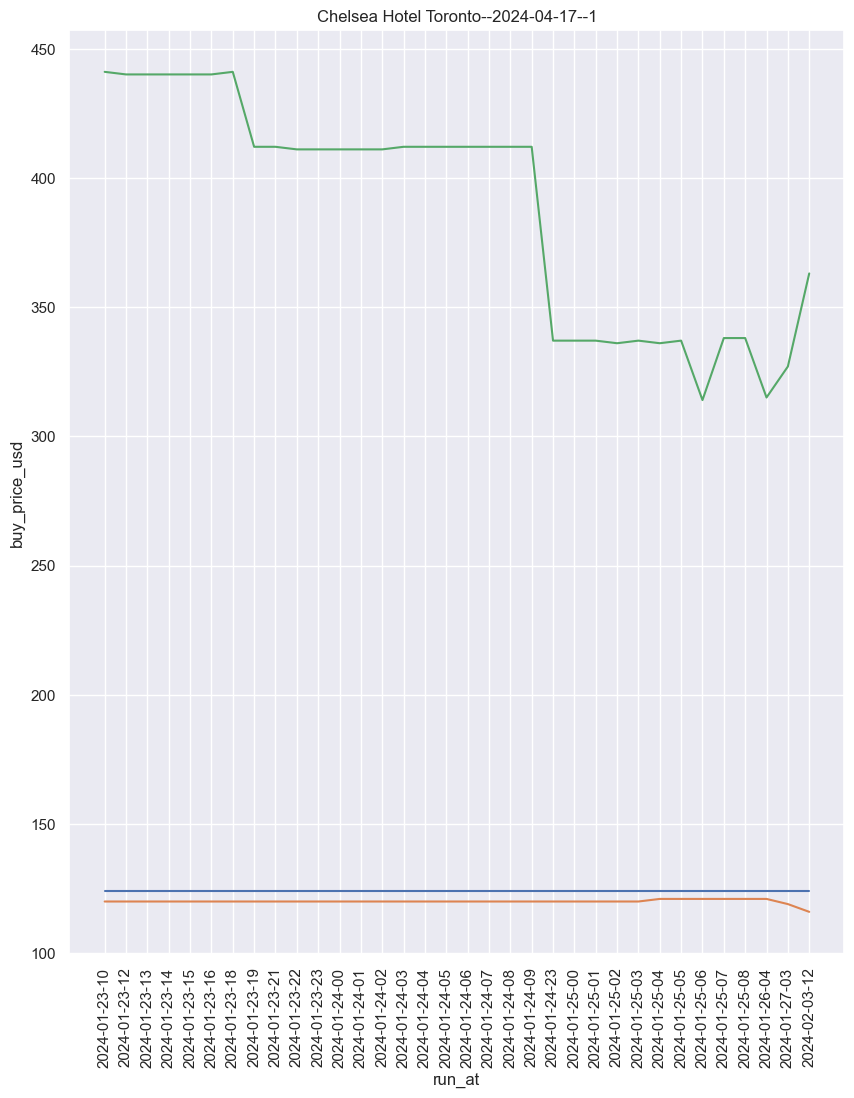

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=chelsea%20hotel%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAEaSQorEicyJTB4ODgyYjM0YjU3Zjg4YWFkNToweGE5YmY4ZDE4YzU1OTA2YTkaABIaEhQKBwjoDxAEGAUSBwjoDxAEGAYYATICCAEqCQoFOgNDQUQaAA&qs=CAEyJ0Noa0lxWTNrcW95ajQ5LXBBUm9NTDJjdk1XaGpNbnBvY25aNEVBRTgCQgkJqQZZxRiNv6lCCQmpBlnFGI2_qQ&ap=ugEGcHJpY2Vz&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwiQ4qWU9d6DAxUAAAAAHQAAAAAQEA', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 18', 'checkout': 'April 19', 'cancellable_option': 'yes', 'cancellable_date': 'Apr 12', 'room_type': 'Classic Room', 'adults': '2

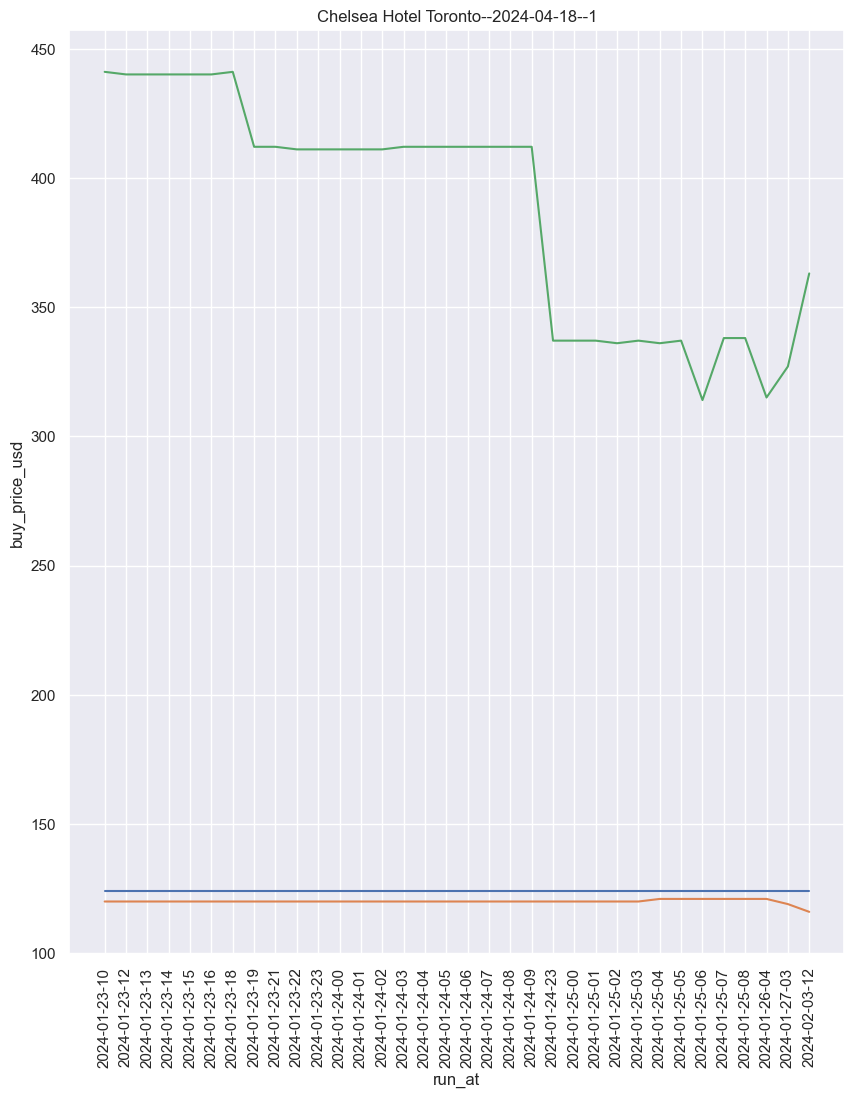

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=chelsea%20hotel%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAEaSQorEicyJTB4ODgyYjM0YjU3Zjg4YWFkNToweGE5YmY4ZDE4YzU1OTA2YTkaABIaEhQKBwjoDxAEGAUSBwjoDxAEGAYYATICCAEqCQoFOgNDQUQaAA&qs=CAEyJ0Noa0lxWTNrcW95ajQ5LXBBUm9NTDJjdk1XaGpNbnBvY25aNEVBRTgCQgkJqQZZxRiNv6lCCQmpBlnFGI2_qQ&ap=ugEGcHJpY2Vz&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwiQ4qWU9d6DAxUAAAAAHQAAAAAQEA', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 19', 'checkout': 'April 20', 'cancellable_option': 'yes', 'cancellable_date': 'Apr 13', 'room_type': 'Classic Room', 'adults': '2

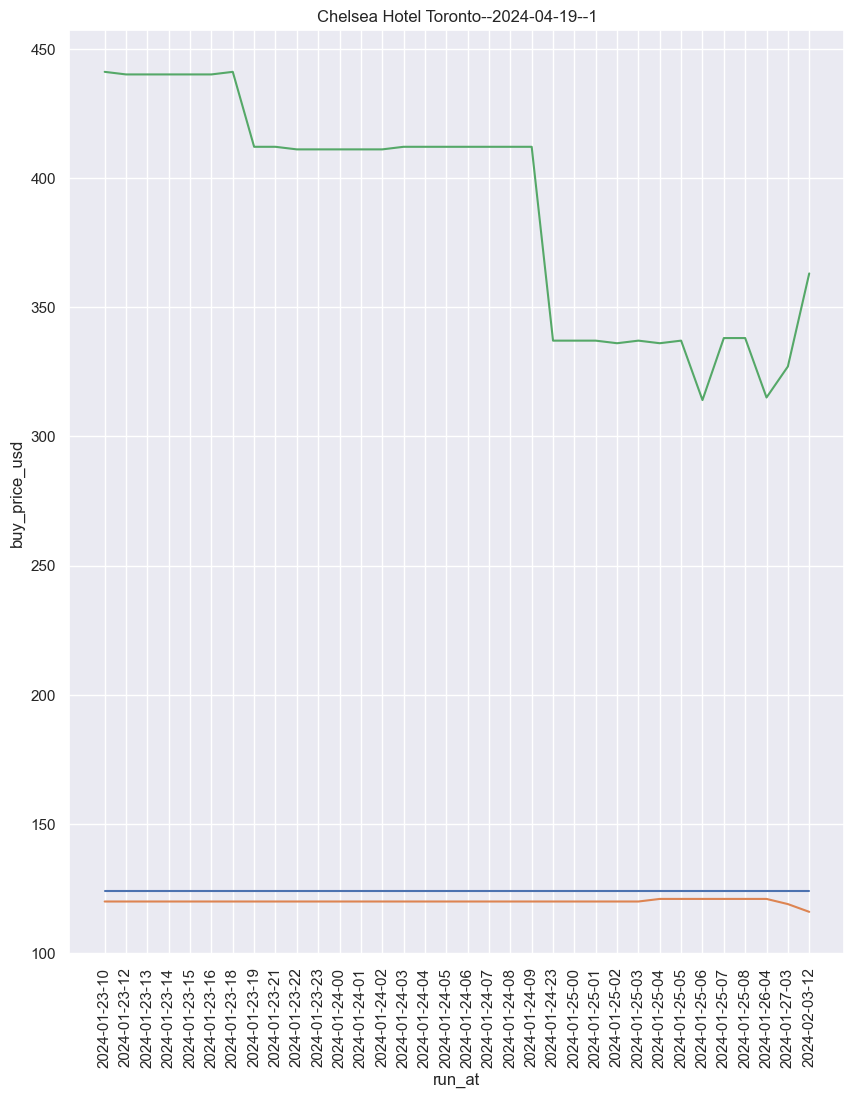

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=chelsea%20hotel%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAEaSQorEicyJTB4ODgyYjM0YjU3Zjg4YWFkNToweGE5YmY4ZDE4YzU1OTA2YTkaABIaEhQKBwjoDxAEGAUSBwjoDxAEGAYYATICCAEqCQoFOgNDQUQaAA&qs=CAEyJ0Noa0lxWTNrcW95ajQ5LXBBUm9NTDJjdk1XaGpNbnBvY25aNEVBRTgCQgkJqQZZxRiNv6lCCQmpBlnFGI2_qQ&ap=ugEGcHJpY2Vz&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwiQ4qWU9d6DAxUAAAAAHQAAAAAQEA', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 20', 'checkout': 'April 21', 'cancellable_option': 'yes', 'cancellable_date': 'Apr 14', 'room_type': 'Classic Room', 'adults': '2

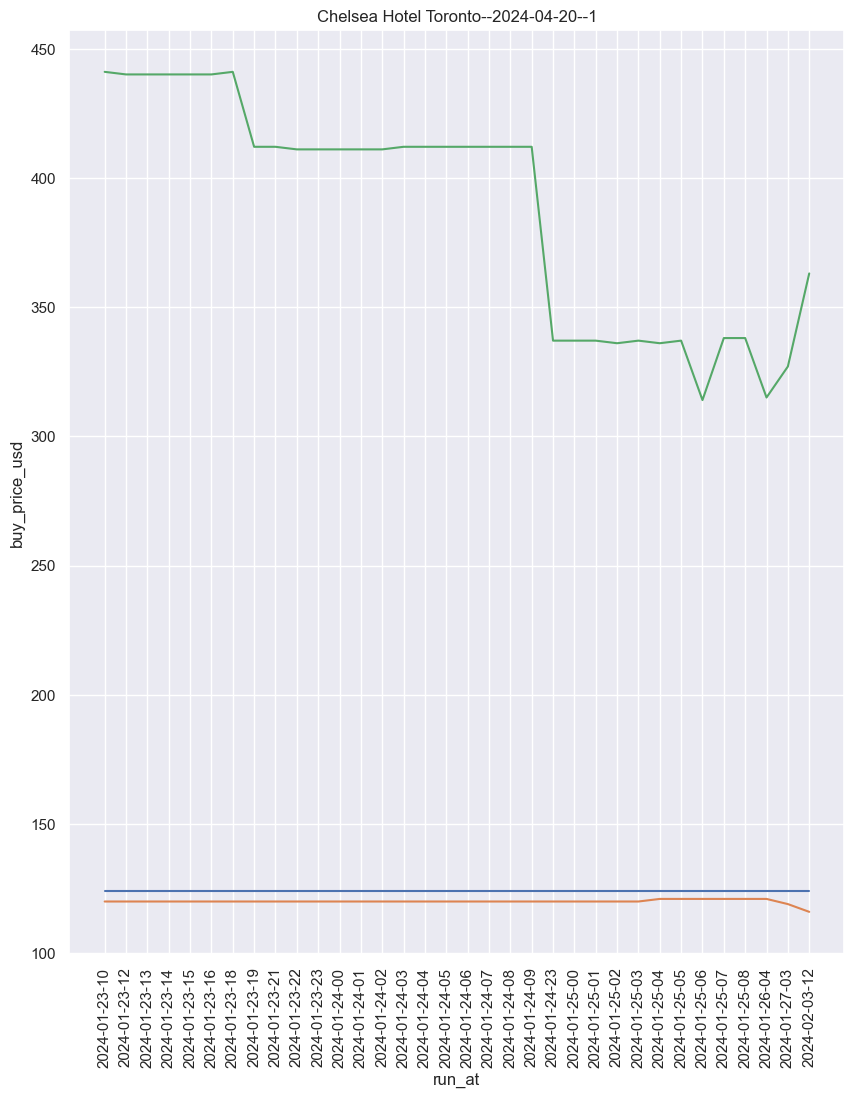

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=chelsea%20hotel%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAEaSQorEicyJTB4ODgyYjM0YjU3Zjg4YWFkNToweGE5YmY4ZDE4YzU1OTA2YTkaABIaEhQKBwjoDxAEGAUSBwjoDxAEGAYYATICCAEqCQoFOgNDQUQaAA&qs=CAEyJ0Noa0lxWTNrcW95ajQ5LXBBUm9NTDJjdk1XaGpNbnBvY25aNEVBRTgCQgkJqQZZxRiNv6lCCQmpBlnFGI2_qQ&ap=ugEGcHJpY2Vz&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwiQ4qWU9d6DAxUAAAAAHQAAAAAQEA', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 21', 'checkout': 'April 22', 'cancellable_option': 'yes', 'cancellable_date': 'Apr 15', 'room_type': 'Classic Room', 'adults': '2

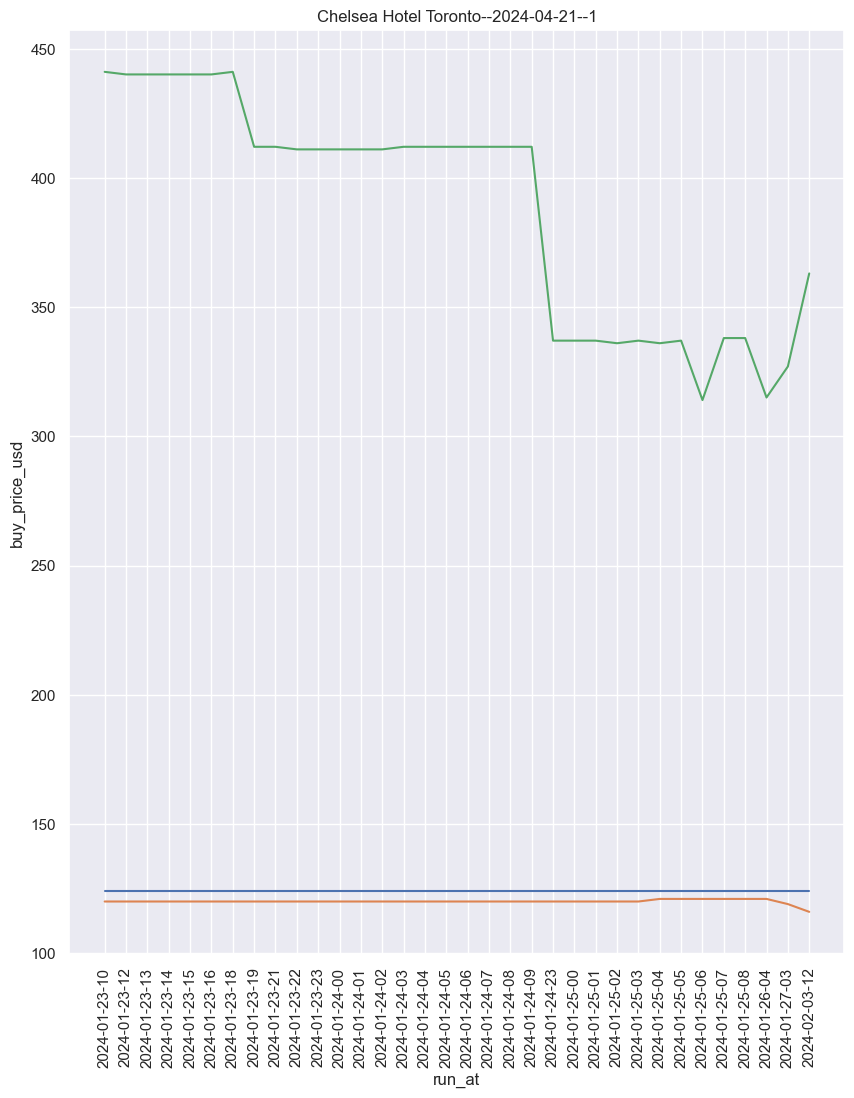

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=chelsea%20hotel%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAEaSQorEicyJTB4ODgyYjM0YjU3Zjg4YWFkNToweGE5YmY4ZDE4YzU1OTA2YTkaABIaEhQKBwjoDxAEGAUSBwjoDxAEGAYYATICCAEqCQoFOgNDQUQaAA&qs=CAEyJ0Noa0lxWTNrcW95ajQ5LXBBUm9NTDJjdk1XaGpNbnBvY25aNEVBRTgCQgkJqQZZxRiNv6lCCQmpBlnFGI2_qQ&ap=ugEGcHJpY2Vz&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwiQ4qWU9d6DAxUAAAAAHQAAAAAQEA', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 22', 'checkout': 'April 23', 'cancellable_option': 'yes', 'cancellable_date': 'Apr 16', 'room_type': 'Classic Room', 'adults': '2

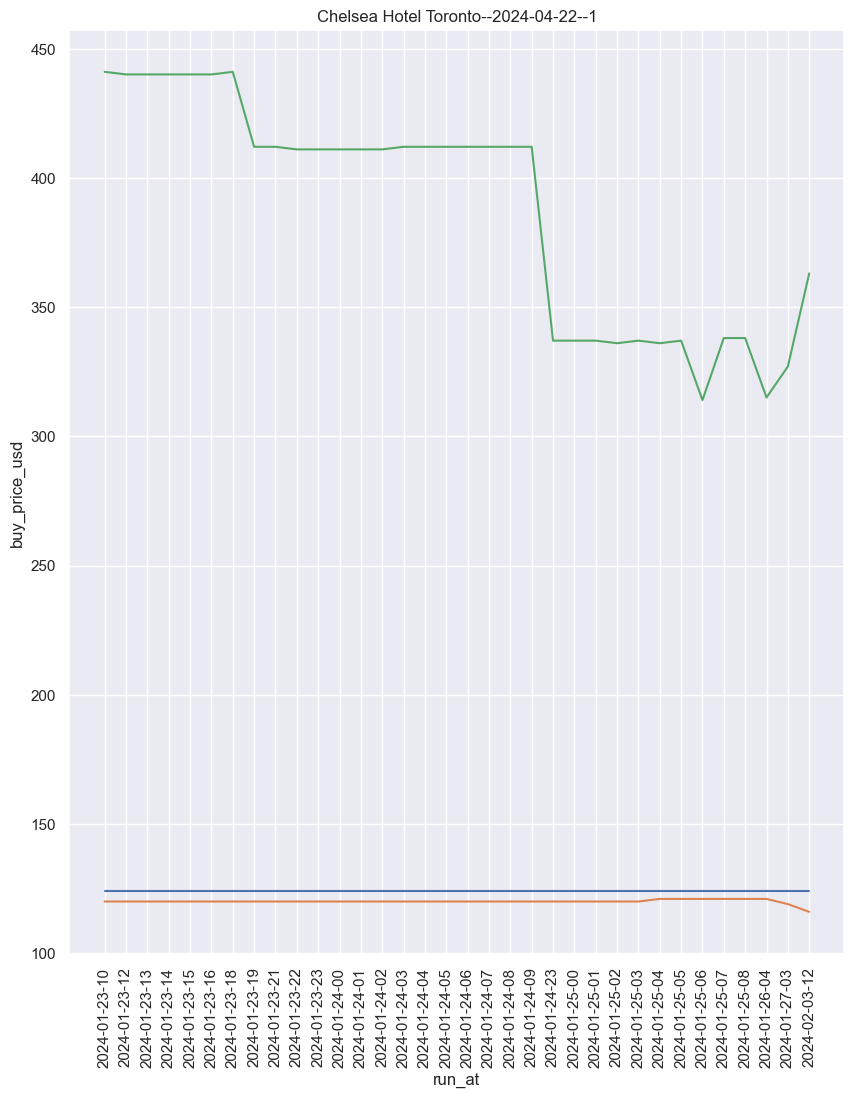

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=chelsea%20hotel%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAEaSQorEicyJTB4ODgyYjM0YjU3Zjg4YWFkNToweGE5YmY4ZDE4YzU1OTA2YTkaABIaEhQKBwjoDxAEGAUSBwjoDxAEGAYYATICCAEqCQoFOgNDQUQaAA&qs=CAEyJ0Noa0lxWTNrcW95ajQ5LXBBUm9NTDJjdk1XaGpNbnBvY25aNEVBRTgCQgkJqQZZxRiNv6lCCQmpBlnFGI2_qQ&ap=ugEGcHJpY2Vz&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwiQ4qWU9d6DAxUAAAAAHQAAAAAQEA', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 23', 'checkout': 'April 24', 'cancellable_option': 'yes', 'cancellable_date': 'Apr 17', 'room_type': 'Classic Room', 'adults': '2

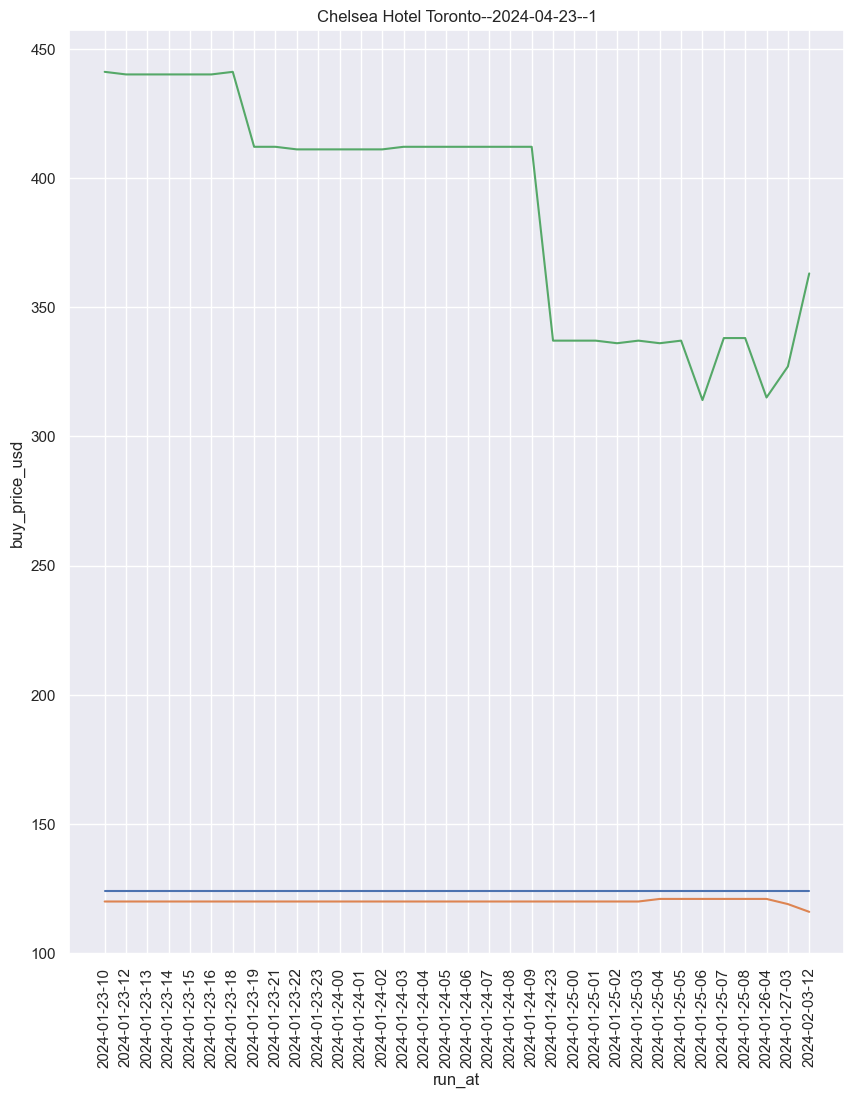

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=chelsea%20hotel%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAEaSQorEicyJTB4ODgyYjM0YjU3Zjg4YWFkNToweGE5YmY4ZDE4YzU1OTA2YTkaABIaEhQKBwjoDxAEGAUSBwjoDxAEGAYYATICCAEqCQoFOgNDQUQaAA&qs=CAEyJ0Noa0lxWTNrcW95ajQ5LXBBUm9NTDJjdk1XaGpNbnBvY25aNEVBRTgCQgkJqQZZxRiNv6lCCQmpBlnFGI2_qQ&ap=ugEGcHJpY2Vz&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwiQ4qWU9d6DAxUAAAAAHQAAAAAQEA', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 24', 'checkout': 'April 25', 'cancellable_option': 'yes', 'cancellable_date': 'Apr 18', 'room_type': 'Classic Room', 'adults': '2

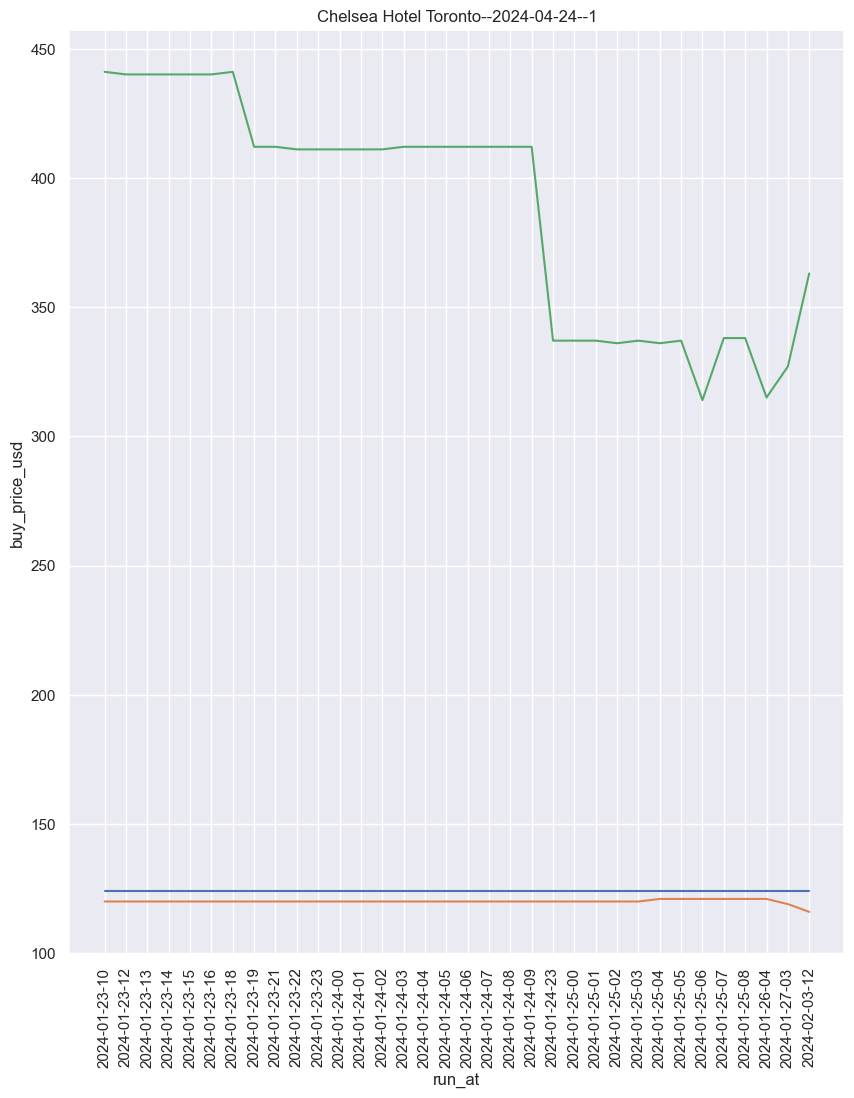

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=chelsea%20hotel%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAEaSQorEicyJTB4ODgyYjM0YjU3Zjg4YWFkNToweGE5YmY4ZDE4YzU1OTA2YTkaABIaEhQKBwjoDxAEGAUSBwjoDxAEGAYYATICCAEqCQoFOgNDQUQaAA&qs=CAEyJ0Noa0lxWTNrcW95ajQ5LXBBUm9NTDJjdk1XaGpNbnBvY25aNEVBRTgCQgkJqQZZxRiNv6lCCQmpBlnFGI2_qQ&ap=ugEGcHJpY2Vz&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwiQ4qWU9d6DAxUAAAAAHQAAAAAQEA', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 25', 'checkout': 'April 26', 'cancellable_option': 'yes', 'cancellable_date': 'Apr 19', 'room_type': 'Classic Room', 'adults': '2

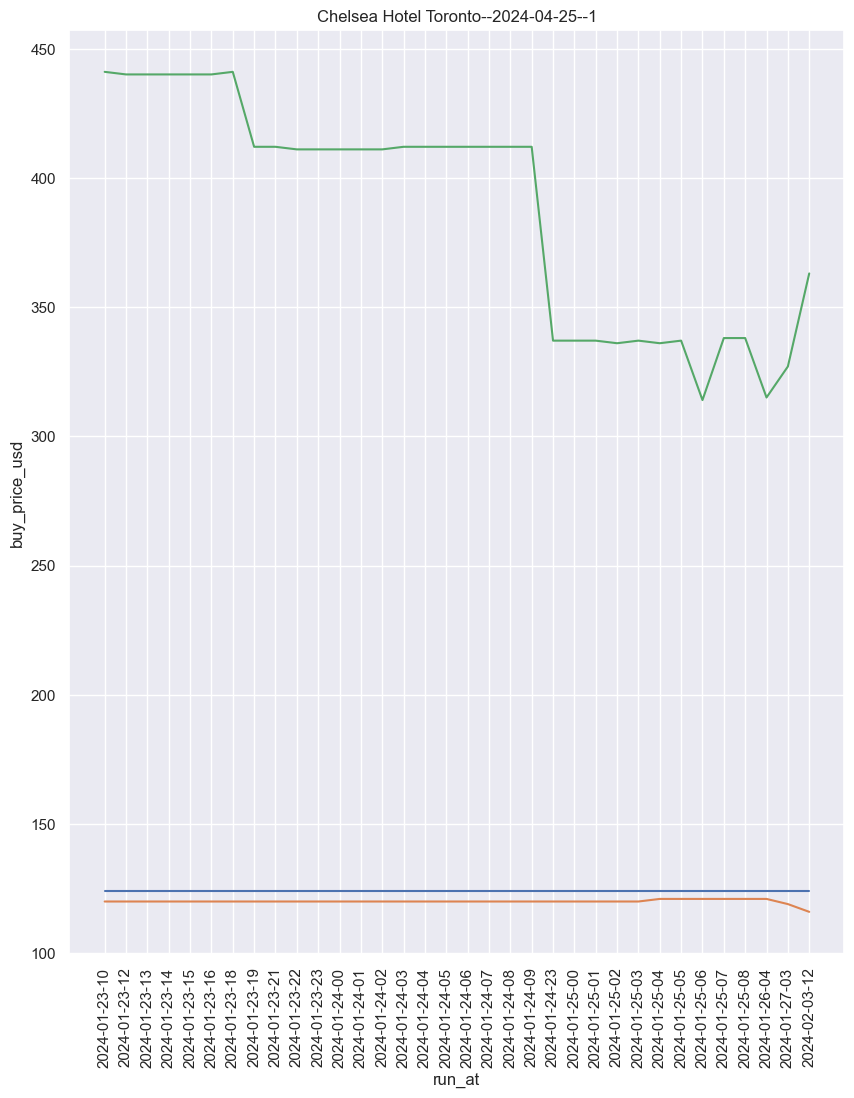

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=chelsea%20hotel%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAEaSQorEicyJTB4ODgyYjM0YjU3Zjg4YWFkNToweGE5YmY4ZDE4YzU1OTA2YTkaABIaEhQKBwjoDxAEGAUSBwjoDxAEGAYYATICCAEqCQoFOgNDQUQaAA&qs=CAEyJ0Noa0lxWTNrcW95ajQ5LXBBUm9NTDJjdk1XaGpNbnBvY25aNEVBRTgCQgkJqQZZxRiNv6lCCQmpBlnFGI2_qQ&ap=ugEGcHJpY2Vz&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwiQ4qWU9d6DAxUAAAAAHQAAAAAQEA', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 26', 'checkout': 'April 27', 'cancellable_option': 'yes', 'cancellable_date': 'Apr 20', 'room_type': 'Classic Room', 'adults': '2

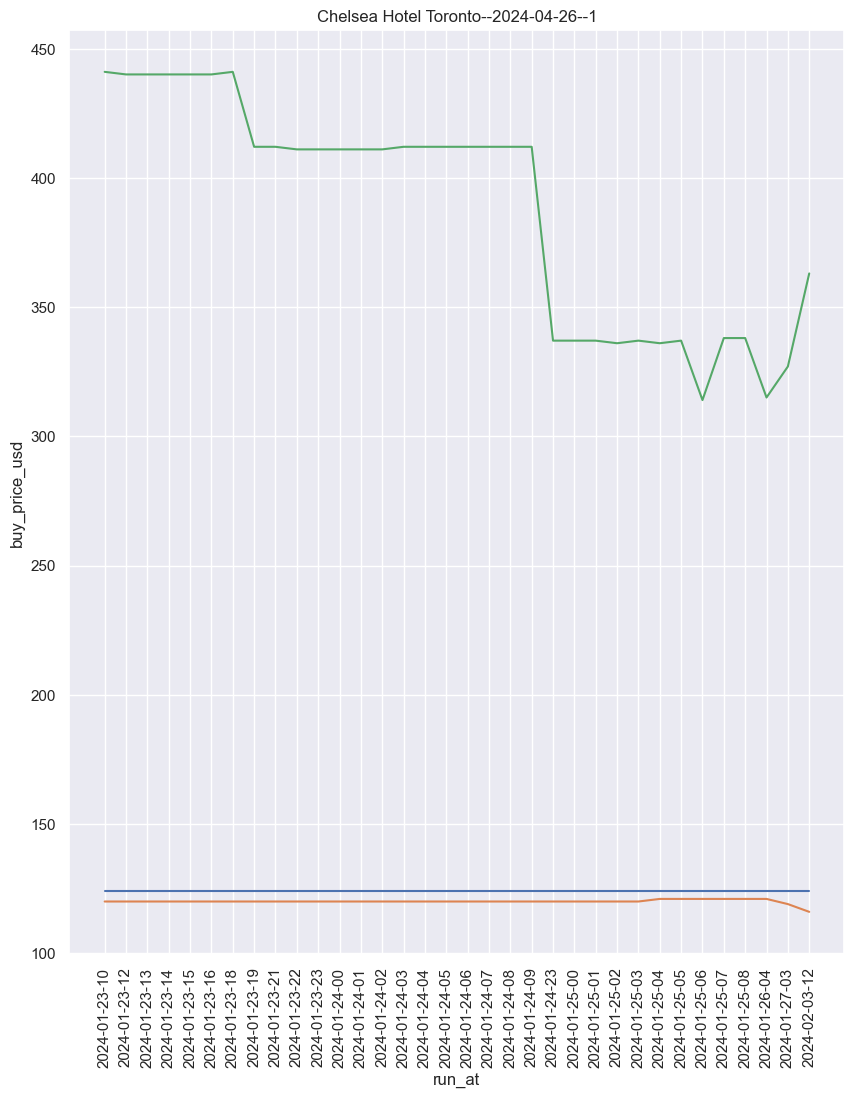

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=chelsea%20hotel%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAEaSQorEicyJTB4ODgyYjM0YjU3Zjg4YWFkNToweGE5YmY4ZDE4YzU1OTA2YTkaABIaEhQKBwjoDxAEGAUSBwjoDxAEGAYYATICCAEqCQoFOgNDQUQaAA&qs=CAEyJ0Noa0lxWTNrcW95ajQ5LXBBUm9NTDJjdk1XaGpNbnBvY25aNEVBRTgCQgkJqQZZxRiNv6lCCQmpBlnFGI2_qQ&ap=ugEGcHJpY2Vz&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwiQ4qWU9d6DAxUAAAAAHQAAAAAQEA', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 27', 'checkout': 'April 28', 'cancellable_option': 'yes', 'cancellable_date': 'Apr 21', 'room_type': 'Classic Room', 'adults': '2

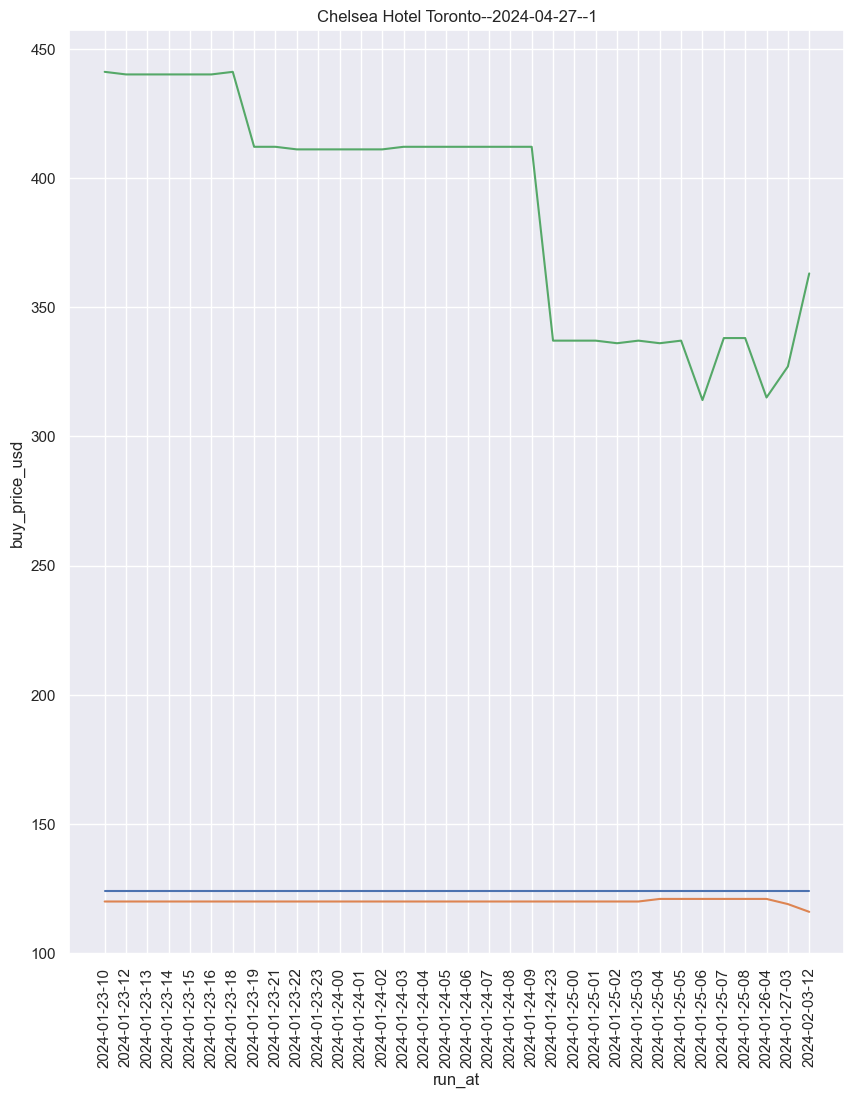

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=chelsea%20hotel%20toronto&g2lb=2502548%2C2503771%2C2503781%2C4258168%2C4284970%2C4291517%2C4597339%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72412680%2C72414906%2C72421566%2C72430562%2C72440517%2C72442338%2C72458707%2C72469155%2C72470438%2C72470899%2C72471395%2C72473738&hl=en-CA&gl=ca&cs=1&ssta=1&ts=CAEaSQorEicyJTB4ODgyYjM0YjU3Zjg4YWFkNToweGE5YmY4ZDE4YzU1OTA2YTkaABIaEhQKBwjoDxAEGAUSBwjoDxAEGAYYATICCAEqCQoFOgNDQUQaAA&qs=CAEyJ0Noa0lxWTNrcW95ajQ5LXBBUm9NTDJjdk1XaGpNbnBvY25aNEVBRTgCQgkJqQZZxRiNv6lCCQmpBlnFGI2_qQ&ap=ugEGcHJpY2Vz&ictx=1&sa=X&ved=0CAAQ5JsGahcKEwiQ4qWU9d6DAxUAAAAAHQAAAAAQEA', 'hotel_name': 'Chelsea Hotel Toronto', 'list_price_usd': '$124.00', 'full_price_usd': '$149.00', 'checkin': 'April 28', 'checkout': 'April 30', 'cancellable_option': 'yes', 'cancellable_date': 'Apr 22', 'room_type': 'Classic Room', 'adults': '2

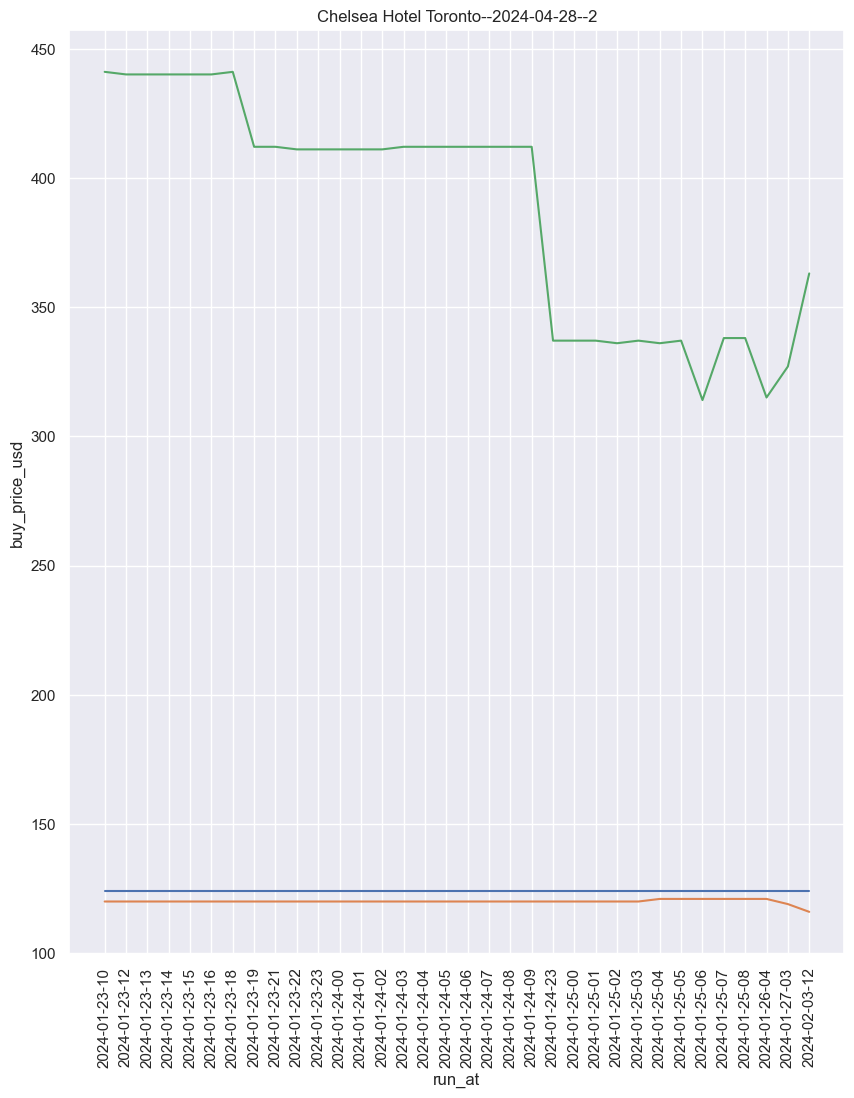

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.super.com/travel/requests/zXw81HGPH9mKf9IzVfjD0Q/hotels/PjmnBZGg', 'hotel_name': 'The Andorre House, Part of JDV by Hyatt', 'list_price_usd': '$160.00', 'full_price_usd': '$190.00', 'checkin': 'May 10', 'checkout': 'May 11', 'cancellable_option': 'yes', 'cancellable_date': 'May 4', 'room_type': 'King Room', 'adults': '2', 'updated_at': '', 'created_by': 'Khalid', 'notes': 'Buying a month of rooms at a price that is over 30% below ADR for the month. Some risk due to occupancy. Betting that this room will be the cheapest price for a room in Toronto DT in April, combined with cancellation rights. ', 'screenshot_link': '', 'clean_checkin': Timestamp('2024-05-09 20:00:00-0400', tz='America/New_York'), 'clean_checkout': Timestamp('2024-05-10 20:00:00-0400', tz='America/New_York'), 'checkin_date': '2024-05-10', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-15 00:00:00')}


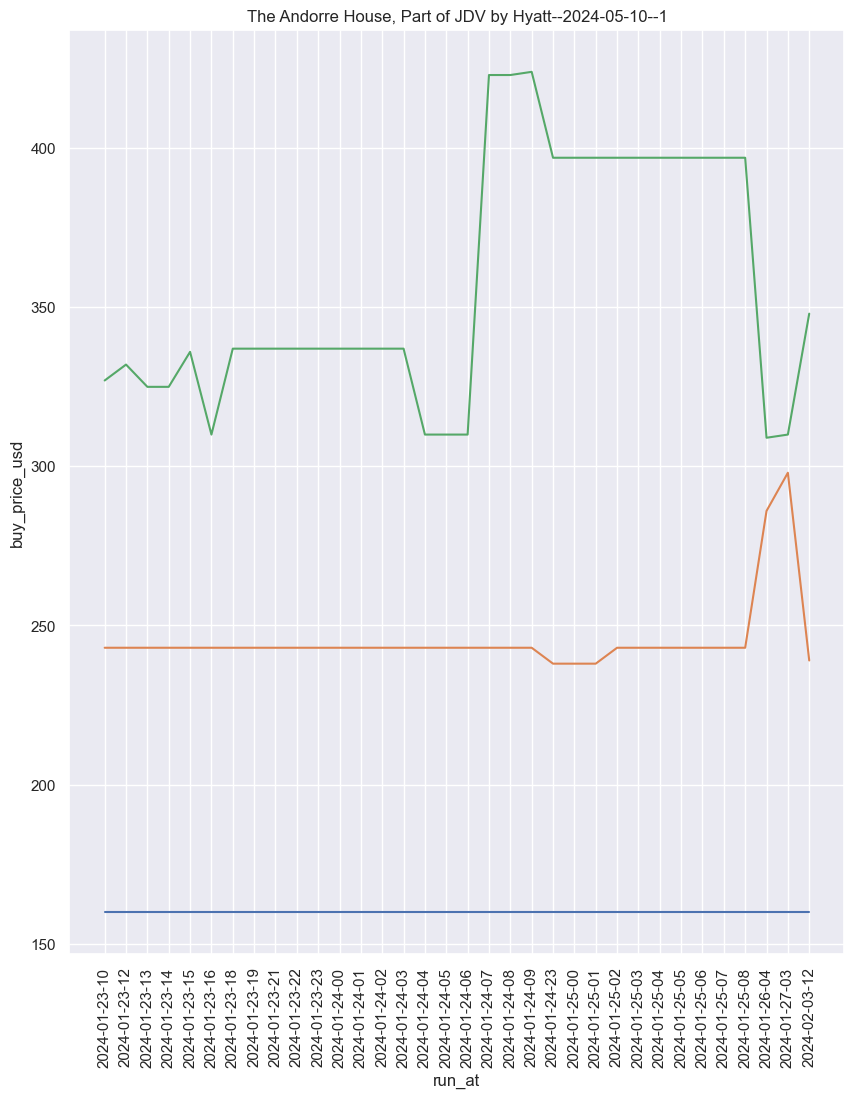

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.super.com/travel/requests/zXw81HGPH9mKf9IzVfjD0Q/hotels/PjmnBZGg', 'hotel_name': 'The Andorre House, Part of JDV by Hyatt', 'list_price_usd': '$160.00', 'full_price_usd': '$190.00', 'checkin': 'May 11', 'checkout': 'May 12', 'cancellable_option': 'yes', 'cancellable_date': 'May 5', 'room_type': 'King Room', 'adults': '2', 'updated_at': '', 'created_by': 'Khalid', 'notes': '', 'screenshot_link': '', 'clean_checkin': Timestamp('2024-05-10 20:00:00-0400', tz='America/New_York'), 'clean_checkout': Timestamp('2024-05-11 20:00:00-0400', tz='America/New_York'), 'checkin_date': '2024-05-11', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-15 00:00:00')}


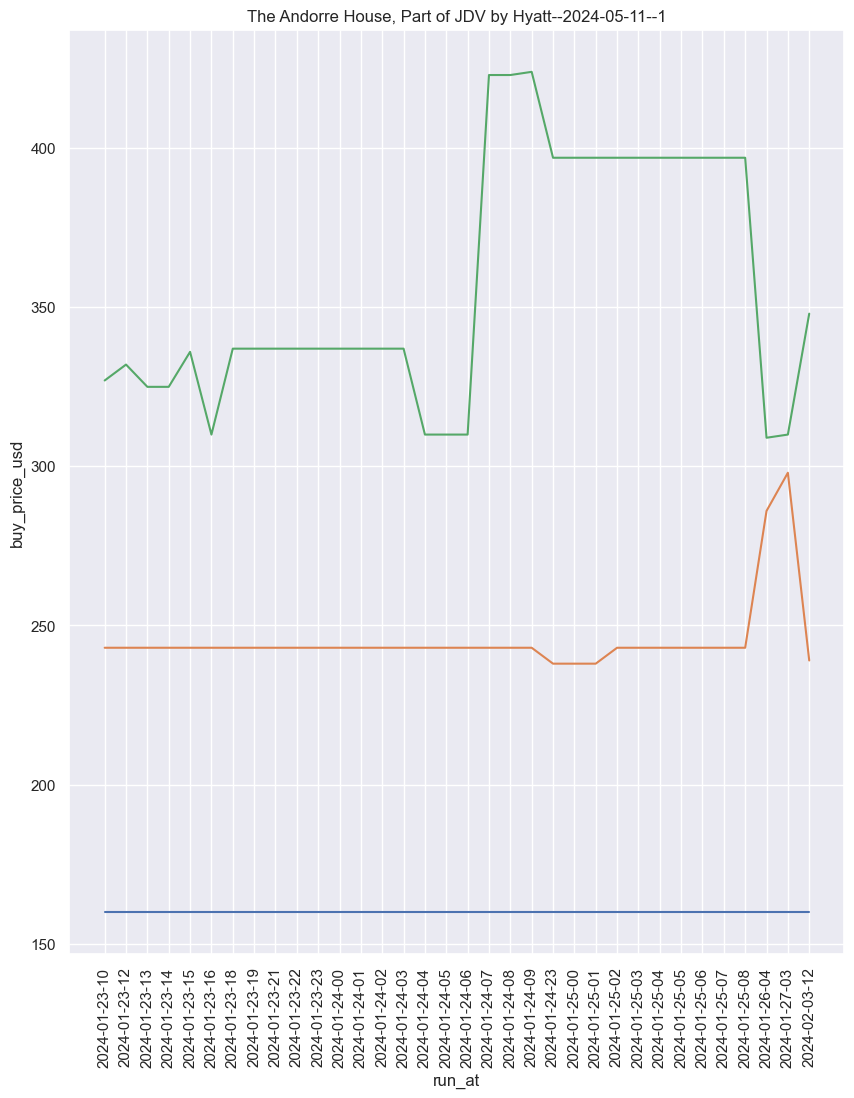

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.super.com/travel/bookings/5bb3274d-b93c-4253-a7f7-c1118ef39d2d?upsell=Free%20Breakfast', 'hotel_name': 'Hilton Toronto', 'list_price_usd': '$184.00', 'full_price_usd': '$223.00', 'checkin': 'April 12', 'checkout': 'April 13', 'cancellable_option': 'yes', 'cancellable_date': 'April 7', 'room_type': 'Two Queens', 'adults': '2', 'updated_at': '', 'created_by': 'Khalid', 'notes': '', 'screenshot_link': 'https://share.zight.com/eDueodpy', 'clean_checkin': Timestamp('2024-04-11 20:00:00-0400', tz='America/New_York'), 'clean_checkout': Timestamp('2024-04-12 20:00:00-0400', tz='America/New_York'), 'checkin_date': '2024-04-12', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-15 00:00:00')}


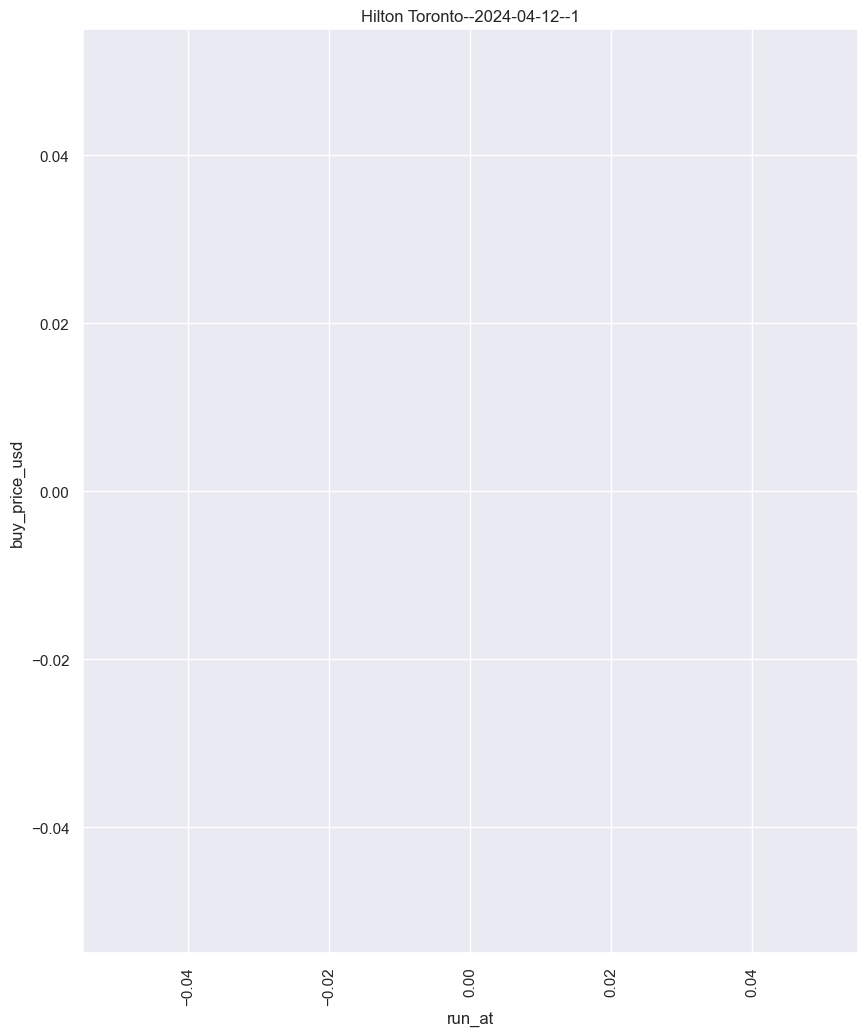

{'created_at': 'Jan 15', 'action': 'buy', 'url': 'https://www.super.com/travel/bookings/5bb3274d-b93c-4253-a7f7-c1118ef39d2d?upsell=Free%20Breakfast', 'hotel_name': 'Hilton Toronto', 'list_price_usd': '$184.00', 'full_price_usd': '$223.00', 'checkin': 'April 13', 'checkout': 'April 14', 'cancellable_option': 'yes', 'cancellable_date': 'April 8', 'room_type': 'Two Queens', 'adults': '2', 'updated_at': '', 'created_by': 'Khalid', 'notes': '', 'screenshot_link': 'https://share.zight.com/eDueodpy', 'clean_checkin': Timestamp('2024-04-12 20:00:00-0400', tz='America/New_York'), 'clean_checkout': Timestamp('2024-04-13 20:00:00-0400', tz='America/New_York'), 'checkin_date': '2024-04-13', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-15 00:00:00')}


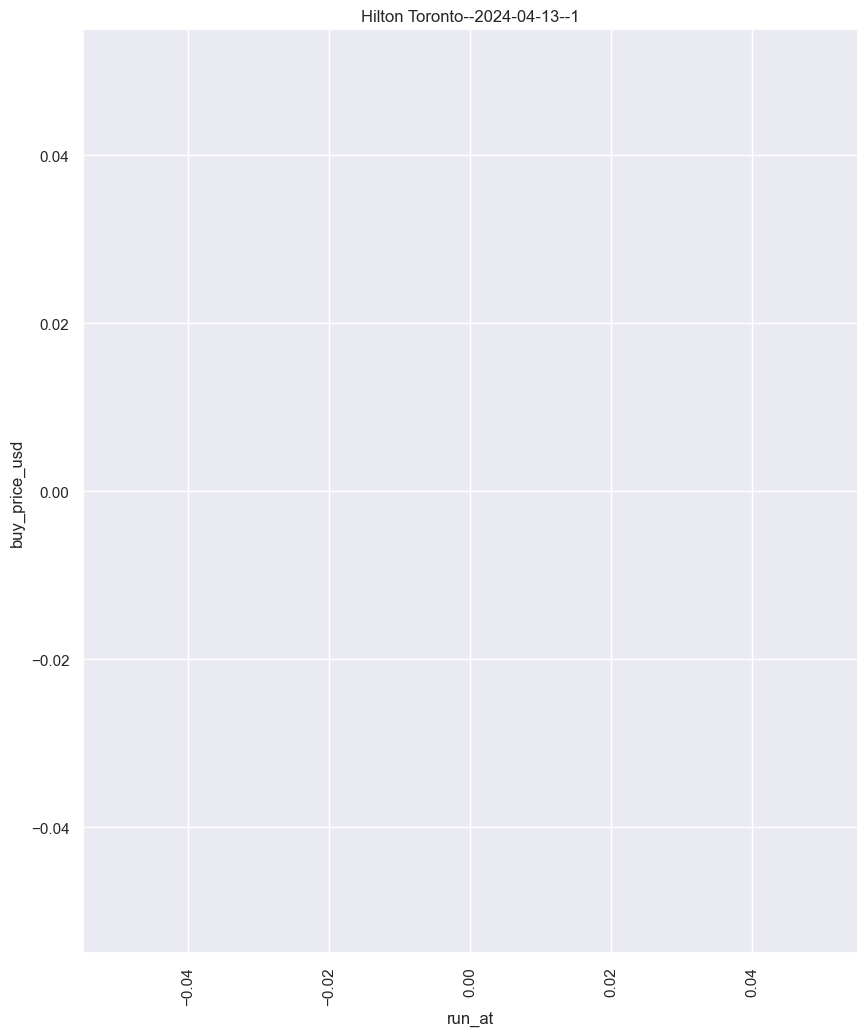

{'created_at': 'Jan 16', 'action': 'buy', 'url': 'https://www.super.com/travel/bookings/4784d55f-45ac-4fed-9018-be356915ac49', 'hotel_name': 'Hotel Hayden', 'list_price_usd': '$173.00', 'full_price_usd': '$215.00', 'checkin': 'Mar 29', 'checkout': 'Mar 30', 'cancellable_option': 'yes', 'cancellable_date': 'Mar 23', 'room_type': 'King Room, Free Breakfast', 'adults': '2', 'updated_at': '', 'created_by': 'Khalid', 'notes': '', 'screenshot_link': 'https://share.zight.com/OAuNRAd2', 'clean_checkin': Timestamp('2024-03-28 20:00:00-0400', tz='America/New_York'), 'clean_checkout': Timestamp('2024-03-29 20:00:00-0400', tz='America/New_York'), 'checkin_date': '2024-03-29', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-16 00:00:00')}


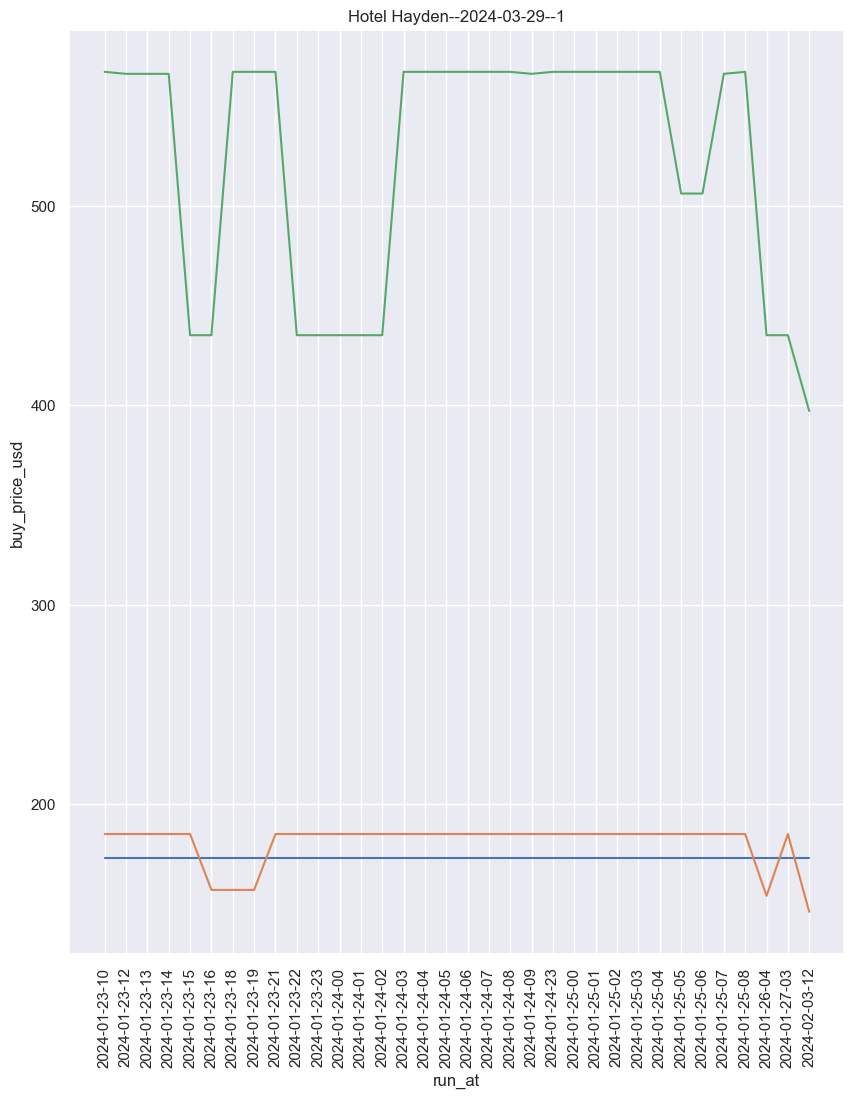

{'created_at': 'Jan 16', 'action': 'buy', 'url': 'https://www.super.com/travel/bookings/4784d55f-45ac-4fed-9018-be356915ac49', 'hotel_name': 'Hotel Hayden', 'list_price_usd': '$173.00', 'full_price_usd': '$215.00', 'checkin': 'Mar 30', 'checkout': 'Mar 31', 'cancellable_option': 'yes', 'cancellable_date': 'Mar 23', 'room_type': 'King Room, Free Breakfast', 'adults': '2', 'updated_at': '', 'created_by': 'Khalid', 'notes': '', 'screenshot_link': 'https://share.zight.com/OAuNRAd2', 'clean_checkin': Timestamp('2024-03-29 20:00:00-0400', tz='America/New_York'), 'clean_checkout': Timestamp('2024-03-30 20:00:00-0400', tz='America/New_York'), 'checkin_date': '2024-03-30', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-16 00:00:00')}


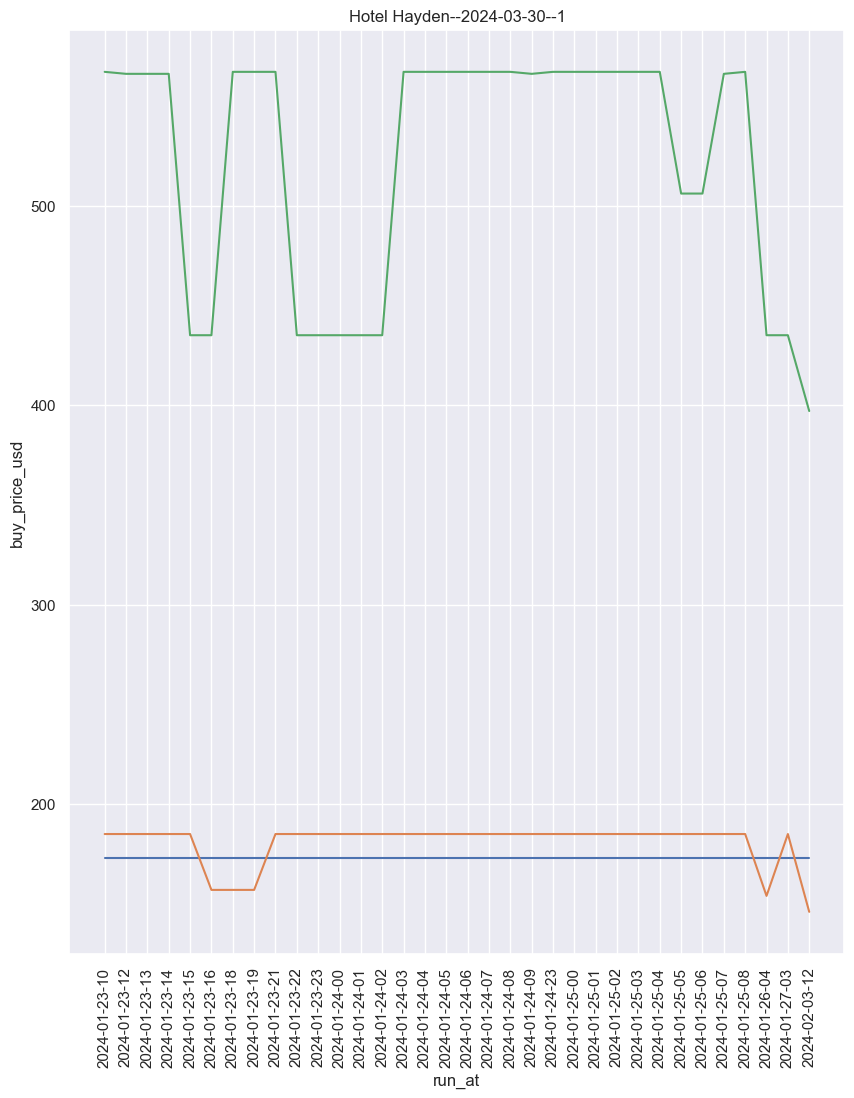

{'created_at': 'Jan 16', 'action': 'buy', 'url': 'https://www.super.com/travel/bookings/4784d55f-45ac-4fed-9018-be356915ac49', 'hotel_name': 'Hotel Hayden', 'list_price_usd': '$173.00', 'full_price_usd': '$215.00', 'checkin': 'Mar 31', 'checkout': 'Apr 1', 'cancellable_option': 'yes', 'cancellable_date': 'Mar 23', 'room_type': 'King Room, Free Breakfast', 'adults': '2', 'updated_at': '', 'created_by': 'Khalid', 'notes': '', 'screenshot_link': 'https://share.zight.com/OAuNRAd2', 'clean_checkin': Timestamp('2024-03-30 20:00:00-0400', tz='America/New_York'), 'clean_checkout': Timestamp('2024-03-31 20:00:00-0400', tz='America/New_York'), 'checkin_date': '2024-03-31', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-16 00:00:00')}


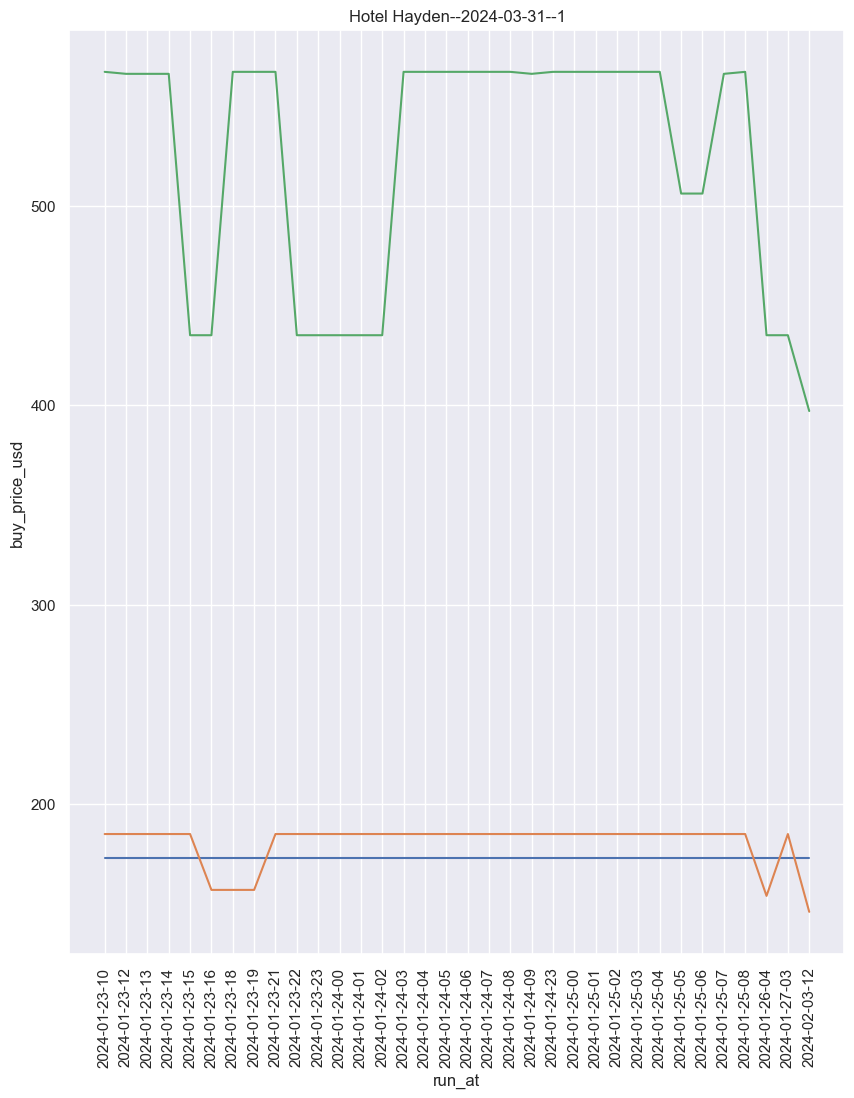

{'created_at': 'Jan 16', 'action': 'buy', 'url': 'https://www.super.com/travel/bookings/23026154-2bdb-40b3-b57c-56eaebd3553e?upsell=Free%20Breakfast', 'hotel_name': 'The Williamsburg Hotel', 'list_price_usd': '$170.00', 'full_price_usd': '$196.00', 'checkin': 'Mar 29', 'checkout': 'Mar 30', 'cancellable_option': 'yes', 'cancellable_date': 'Mar 5', 'room_type': 'Queen Room', 'adults': '2', 'updated_at': '', 'created_by': 'Khalid', 'notes': '', 'screenshot_link': 'https://share.zight.com/p9uBjq02', 'clean_checkin': Timestamp('2024-03-28 20:00:00-0400', tz='America/New_York'), 'clean_checkout': Timestamp('2024-03-29 20:00:00-0400', tz='America/New_York'), 'checkin_date': '2024-03-29', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-16 00:00:00')}


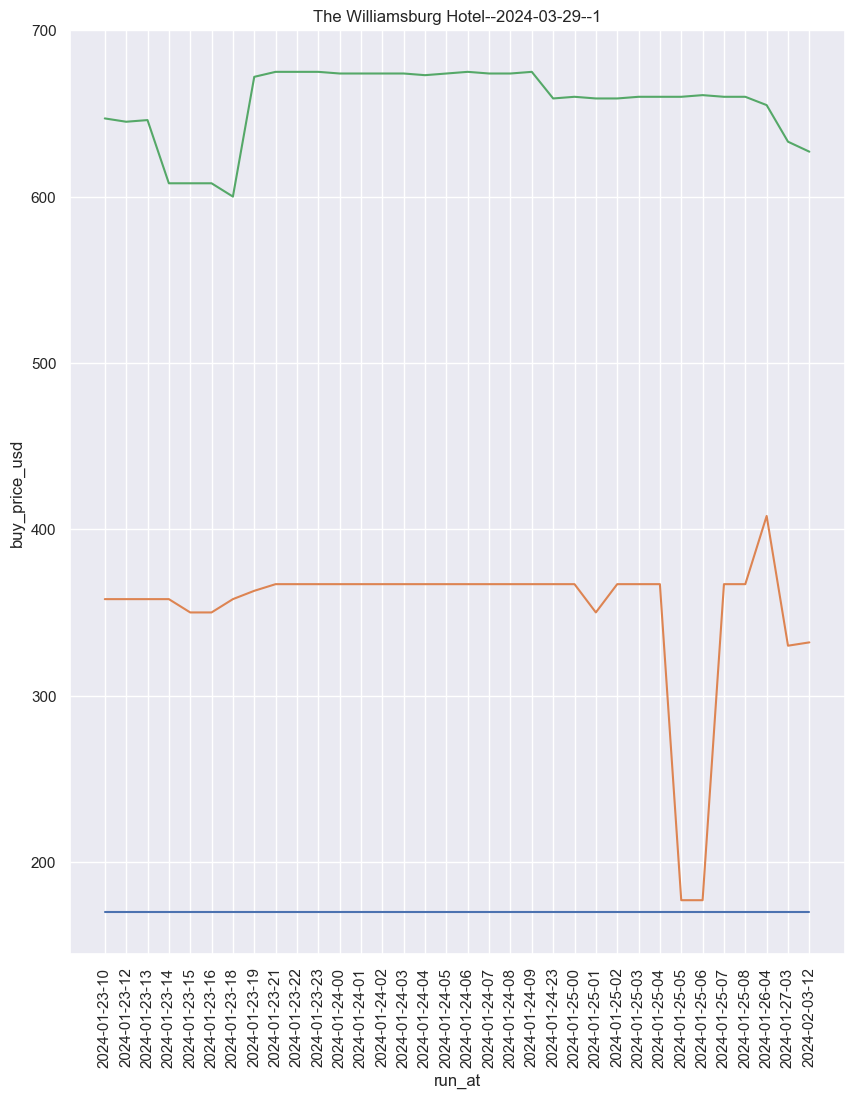

{'created_at': 'Jan 16', 'action': 'buy', 'url': 'https://www.super.com/travel/bookings/23026154-2bdb-40b3-b57c-56eaebd3553e?upsell=Free%20Breakfast', 'hotel_name': 'The Williamsburg Hotel', 'list_price_usd': '$170.00', 'full_price_usd': '$196.00', 'checkin': 'Mar 30', 'checkout': 'Mar 31', 'cancellable_option': 'yes', 'cancellable_date': 'Mar 5', 'room_type': 'Queen Room', 'adults': '2', 'updated_at': '', 'created_by': 'Khalid', 'notes': '', 'screenshot_link': 'https://share.zight.com/p9uBjq02', 'clean_checkin': Timestamp('2024-03-29 20:00:00-0400', tz='America/New_York'), 'clean_checkout': Timestamp('2024-03-30 20:00:00-0400', tz='America/New_York'), 'checkin_date': '2024-03-30', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-16 00:00:00')}


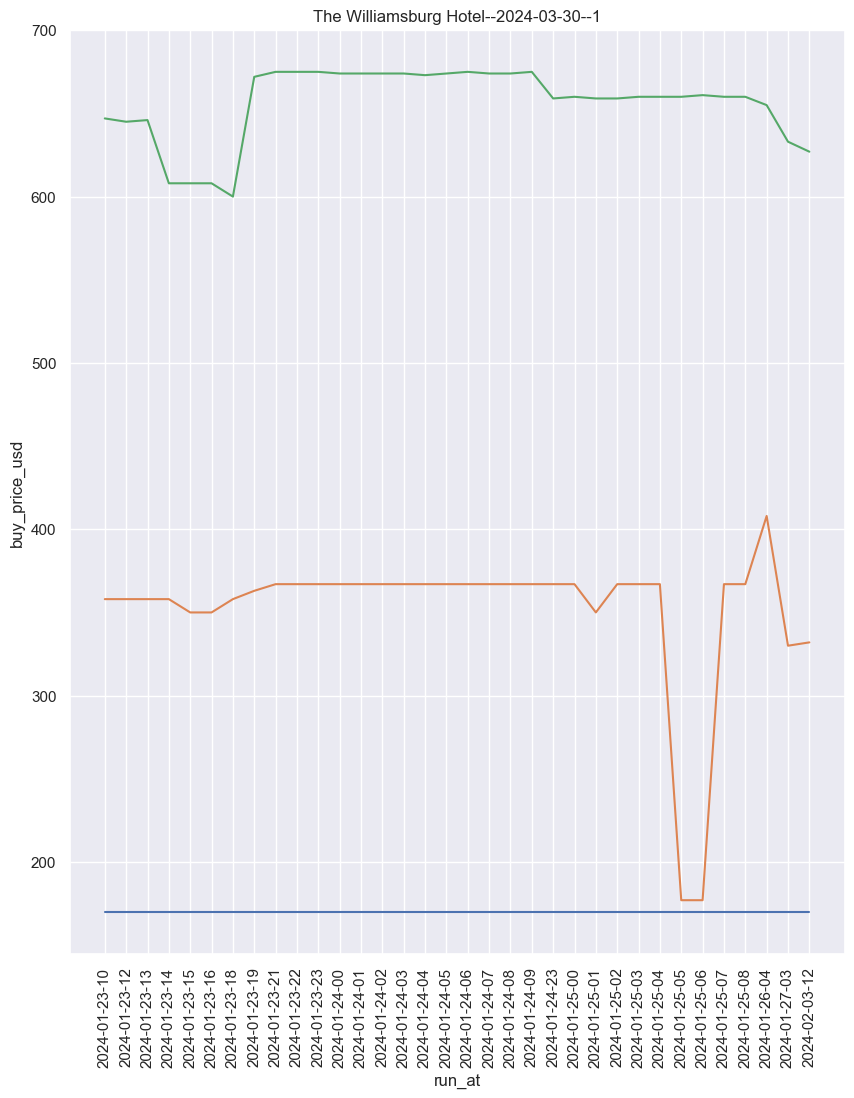

{'created_at': 'Jan 19', 'action': 'buy', 'url': 'https://www.super.com/travel/requests/GAsue9pNNimhXl8R-orwCg/hotels/bjRad9Ll', 'hotel_name': 'Beachside Resort Hotel', 'list_price_usd': '$104.00', 'full_price_usd': '$130.00', 'checkin': 'Mar 10', 'checkout': 'Mar 11', 'cancellable_option': 'yes', 'cancellable_date': 'Mar 6', 'room_type': 'King Room, Free Breakfast', 'adults': '2', 'updated_at': '', 'created_by': 'Khalid', 'notes': '', 'screenshot_link': '', 'clean_checkin': Timestamp('2024-03-09 19:00:00-0500', tz='America/New_York'), 'clean_checkout': Timestamp('2024-03-10 20:00:00-0400', tz='America/New_York'), 'checkin_date': '2024-03-10', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-19 00:00:00')}


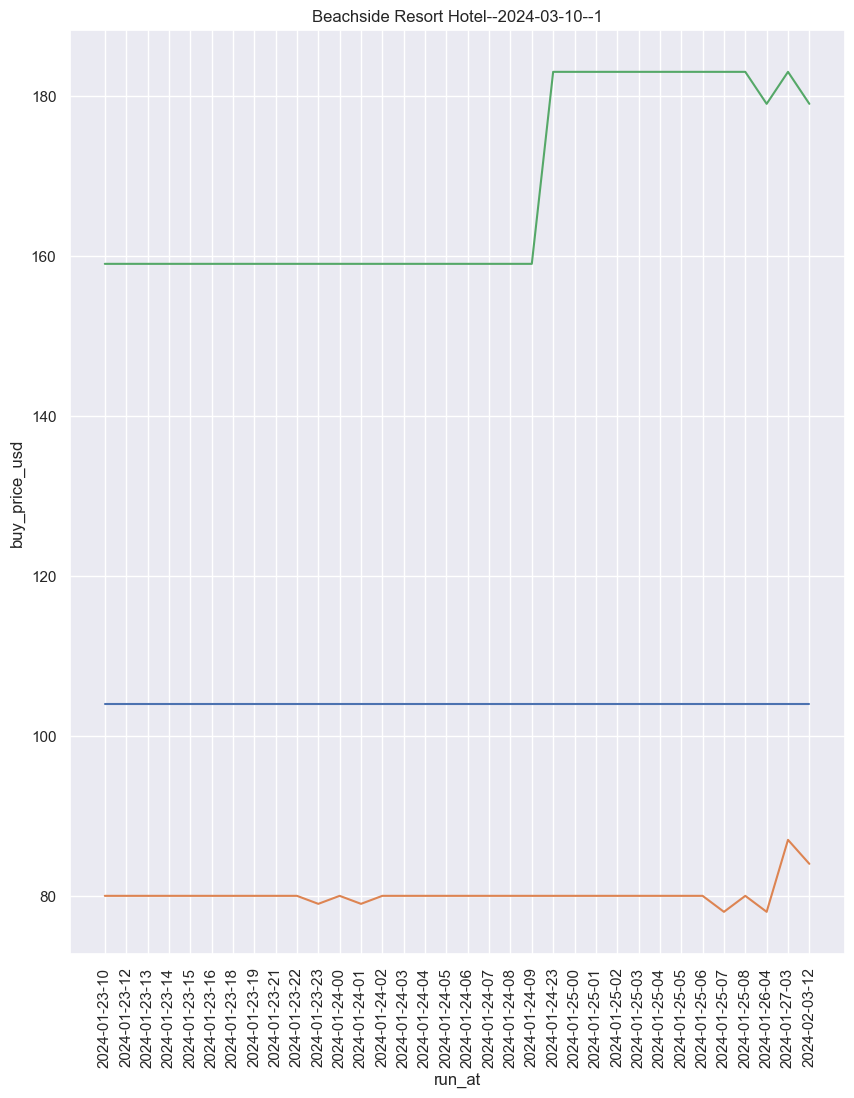

{'created_at': 'Jan 19', 'action': 'buy', 'url': 'https://www.super.com/travel/requests/GAsue9pNNimhXl8R-orwCg/hotels/bjRad9Ll', 'hotel_name': 'Beachside Resort Hotel', 'list_price_usd': '$104.00', 'full_price_usd': '$130.00', 'checkin': 'Mar 11', 'checkout': 'Mar 12', 'cancellable_option': 'yes', 'cancellable_date': 'Mar 6', 'room_type': 'King Room, Free Breakfast', 'adults': '2', 'updated_at': '', 'created_by': 'Khalid', 'notes': '', 'screenshot_link': '', 'clean_checkin': Timestamp('2024-03-10 20:00:00-0400', tz='America/New_York'), 'clean_checkout': Timestamp('2024-03-11 20:00:00-0400', tz='America/New_York'), 'checkin_date': '2024-03-11', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-19 00:00:00')}


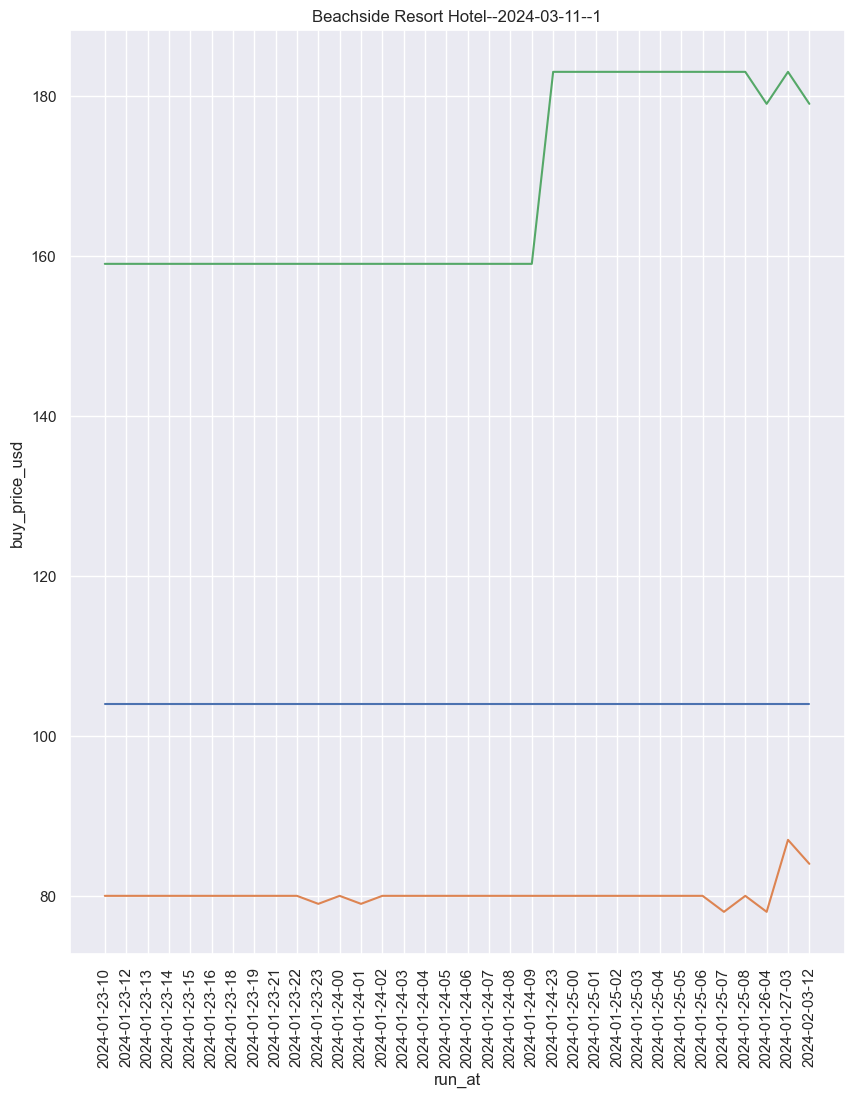

{'created_at': 'Jan 19', 'action': 'buy', 'url': 'https://www.super.com/travel/requests/GAsue9pNNimhXl8R-orwCg/hotels/bjRad9Ll', 'hotel_name': 'Beachside Resort Hotel', 'list_price_usd': '$104.00', 'full_price_usd': '$130.00', 'checkin': 'Mar 12', 'checkout': 'Mar 13', 'cancellable_option': 'yes', 'cancellable_date': 'Mar 6', 'room_type': 'King Room, Free Breakfast', 'adults': '2', 'updated_at': '', 'created_by': 'Khalid', 'notes': '', 'screenshot_link': '', 'clean_checkin': Timestamp('2024-03-11 20:00:00-0400', tz='America/New_York'), 'clean_checkout': Timestamp('2024-03-12 20:00:00-0400', tz='America/New_York'), 'checkin_date': '2024-03-12', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-19 00:00:00')}


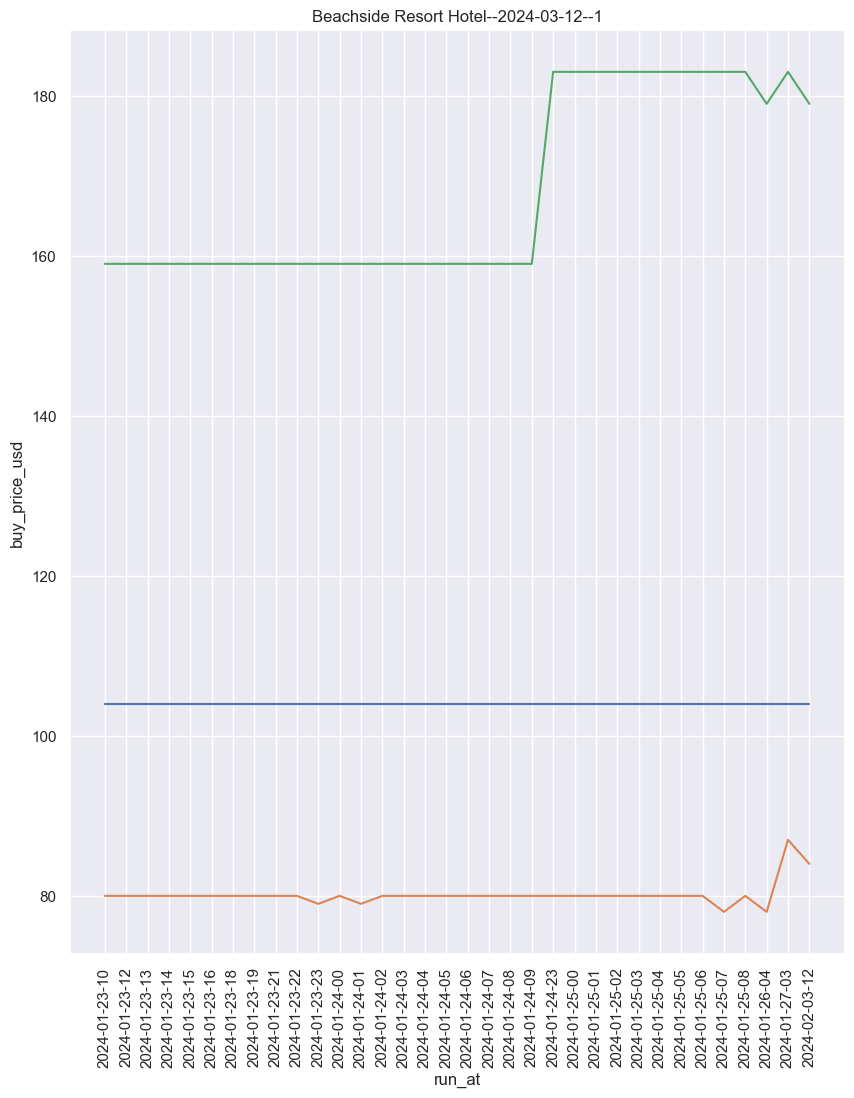

{'created_at': 'Jan 24', 'action': 'buy', 'url': 'https://www.super.com/travel/requests/kAsb57r51bcE0reWbCXrZQ/hotels/bjRad9Ll', 'hotel_name': 'Beachside Resort Hotel', 'list_price_usd': '$112.00', 'full_price_usd': '$139.00', 'checkin': 'Mar 13', 'checkout': 'Mar 14', 'cancellable_option': 'yes', 'cancellable_date': 'Mar 9', 'room_type': 'King Room, Free Breakfast', 'adults': '', 'updated_at': '', 'created_by': 'Khalid', 'notes': '', 'screenshot_link': 'https://share.zight.com/4guWy8EE', 'clean_checkin': Timestamp('2024-03-12 20:00:00-0400', tz='America/New_York'), 'clean_checkout': Timestamp('2024-03-13 20:00:00-0400', tz='America/New_York'), 'checkin_date': '2024-03-13', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-24 00:00:00')}


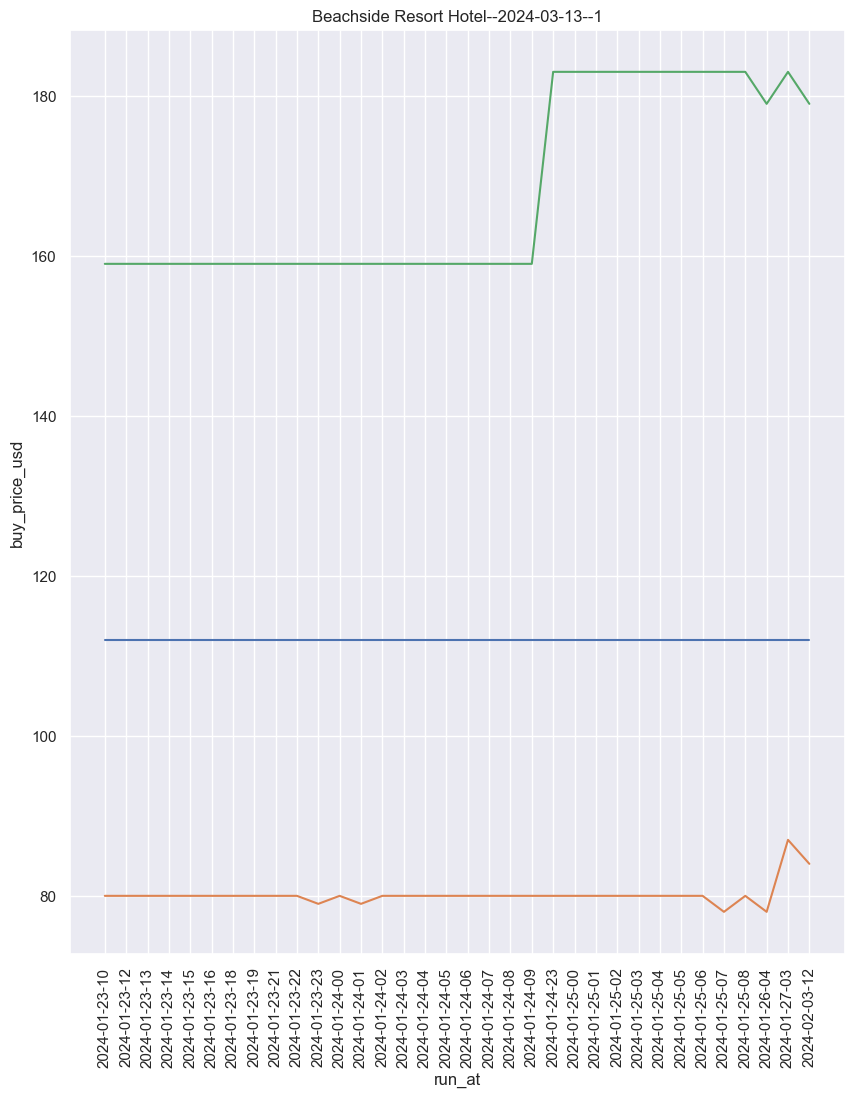

{'created_at': 'Jan 24', 'action': 'buy', 'url': 'https://www.super.com/travel/requests/kAsb57r51bcE0reWbCXrZQ/hotels/bjRad9Ll', 'hotel_name': 'Beachside Resort Hotel', 'list_price_usd': '$112.00', 'full_price_usd': '$139.00', 'checkin': 'Mar 14', 'checkout': 'Mar 15', 'cancellable_option': 'yes', 'cancellable_date': 'Mar 9', 'room_type': 'King Room, Free Breakfast', 'adults': '', 'updated_at': '', 'created_by': 'Khalid', 'notes': '', 'screenshot_link': 'https://share.zight.com/4guWy8EE', 'clean_checkin': Timestamp('2024-03-13 20:00:00-0400', tz='America/New_York'), 'clean_checkout': Timestamp('2024-03-14 20:00:00-0400', tz='America/New_York'), 'checkin_date': '2024-03-14', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-24 00:00:00')}


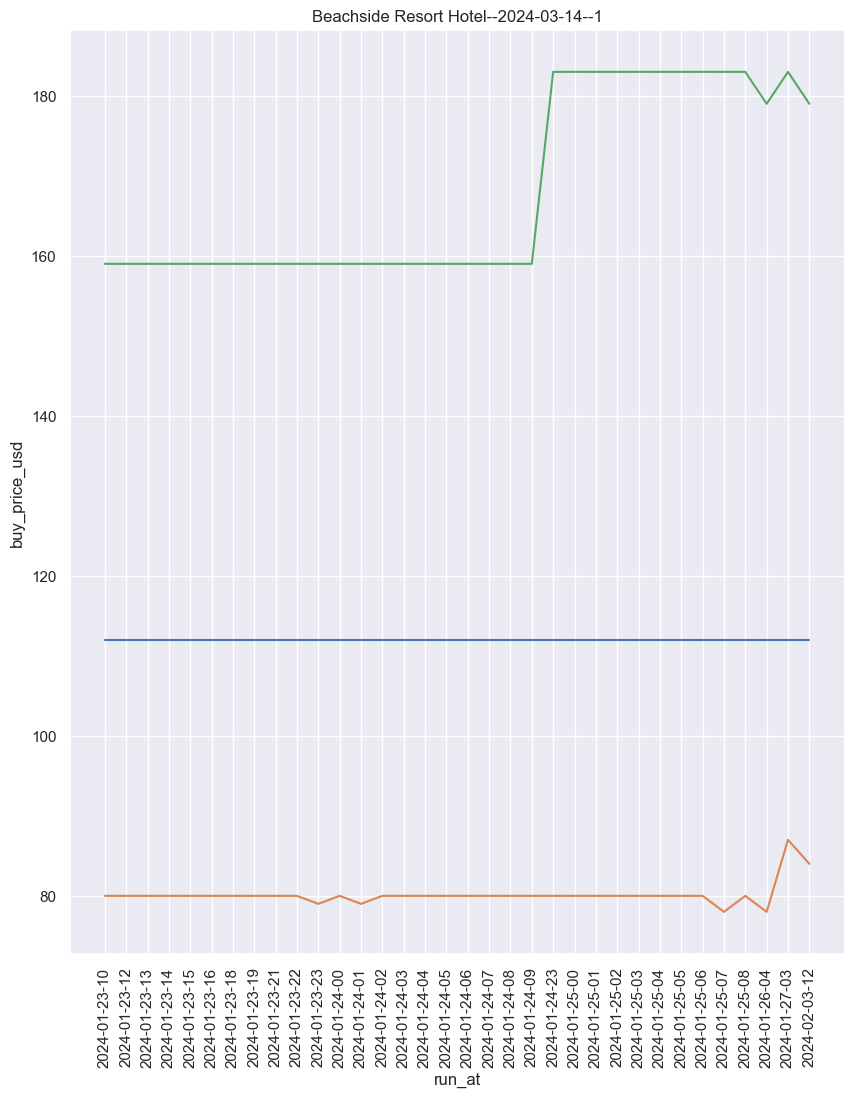

{'created_at': 'Jan 24', 'action': 'buy', 'url': 'https://www.super.com/travel/requests/kAsb57r51bcE0reWbCXrZQ/hotels/bjRad9Ll', 'hotel_name': 'Beachside Resort Hotel', 'list_price_usd': '$112.00', 'full_price_usd': '$139.00', 'checkin': 'Mar 15', 'checkout': 'Mar 16', 'cancellable_option': 'yes', 'cancellable_date': 'Mar 9', 'room_type': 'King Room, Free Breakfast', 'adults': '', 'updated_at': '', 'created_by': 'Khalid', 'notes': '', 'screenshot_link': 'https://share.zight.com/4guWy8EE', 'clean_checkin': Timestamp('2024-03-14 20:00:00-0400', tz='America/New_York'), 'clean_checkout': Timestamp('2024-03-15 20:00:00-0400', tz='America/New_York'), 'checkin_date': '2024-03-15', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-24 00:00:00')}


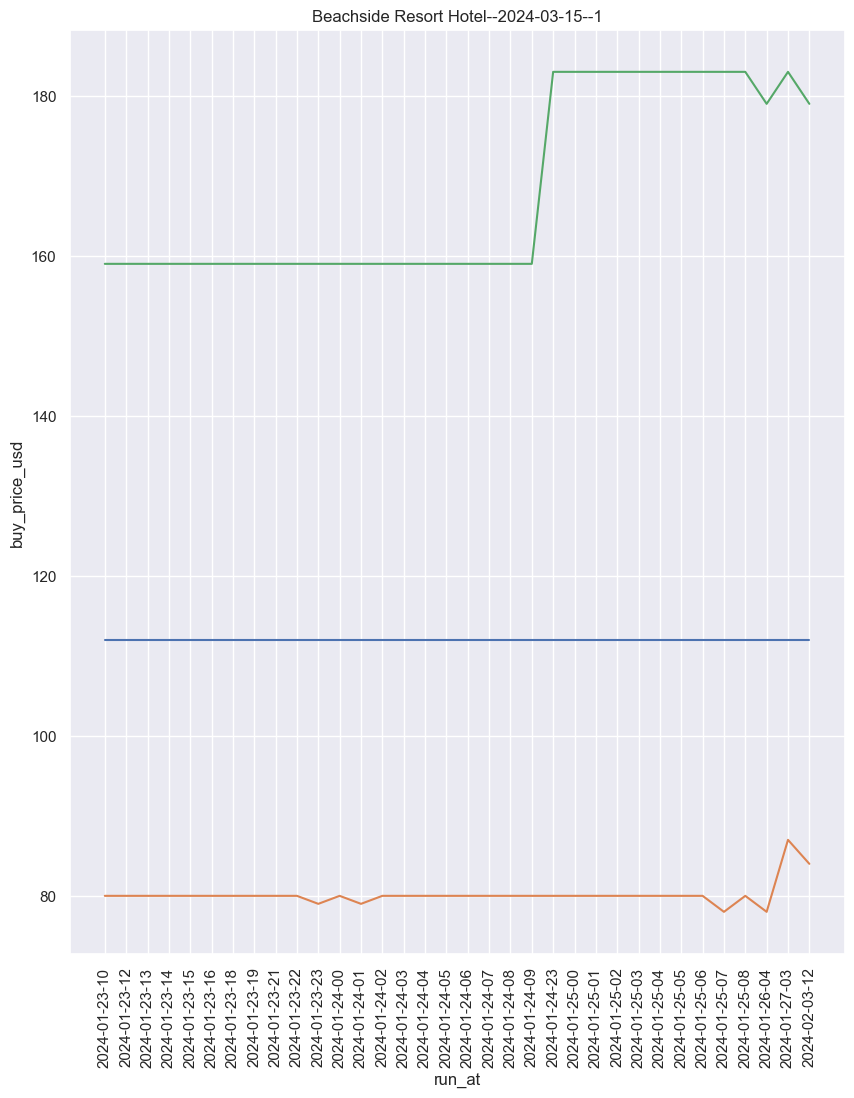

{'created_at': 'Jan 19', 'action': 'buy', 'url': 'https://www.super.com/travel/bookings/af388b5e-2916-4988-8a3b-bb3f2b595e4e', 'hotel_name': 'Boardwalk Beach Resort By Panhandle Getaways', 'list_price_usd': '$79.00', 'full_price_usd': '$97.00', 'checkin': 'Mar 11', 'checkout': 'Mar 12', 'cancellable_option': 'no', 'cancellable_date': '', 'room_type': 'Classic Room', 'adults': '', 'updated_at': '', 'created_by': 'Khalid', 'notes': '', 'screenshot_link': 'https://share.zight.com/OAuNL8ON', 'clean_checkin': Timestamp('2024-03-10 20:00:00-0400', tz='America/New_York'), 'clean_checkout': Timestamp('2024-03-11 20:00:00-0400', tz='America/New_York'), 'checkin_date': '2024-03-11', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-19 00:00:00')}


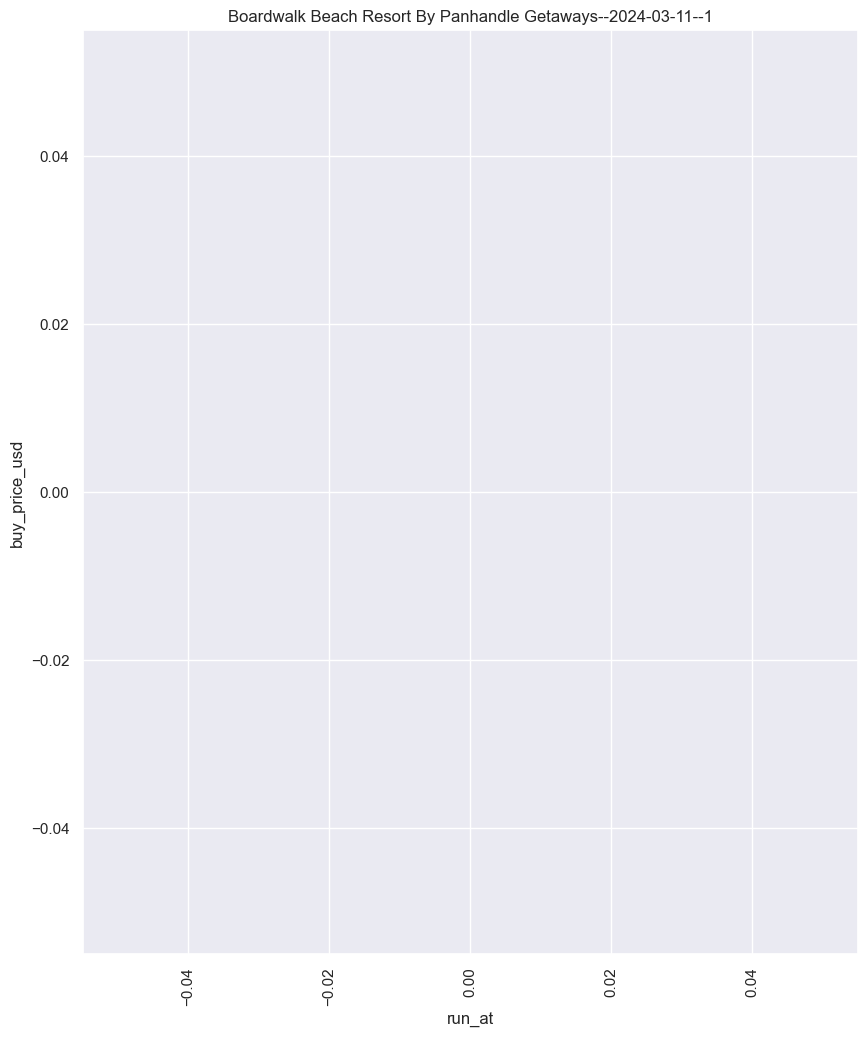

{'created_at': 'Jan 19', 'action': 'buy', 'url': 'https://www.super.com/travel/bookings/af388b5e-2916-4988-8a3b-bb3f2b595e4e', 'hotel_name': 'Boardwalk Beach Resort By Panhandle Getaways', 'list_price_usd': '$79.00', 'full_price_usd': '$97.00', 'checkin': 'Mar 12', 'checkout': 'Mar 13', 'cancellable_option': 'no', 'cancellable_date': '', 'room_type': 'Classic Room', 'adults': '', 'updated_at': '', 'created_by': 'Khalid', 'notes': '', 'screenshot_link': 'https://share.zight.com/OAuNL8ON', 'clean_checkin': Timestamp('2024-03-11 20:00:00-0400', tz='America/New_York'), 'clean_checkout': Timestamp('2024-03-12 20:00:00-0400', tz='America/New_York'), 'checkin_date': '2024-03-12', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-19 00:00:00')}


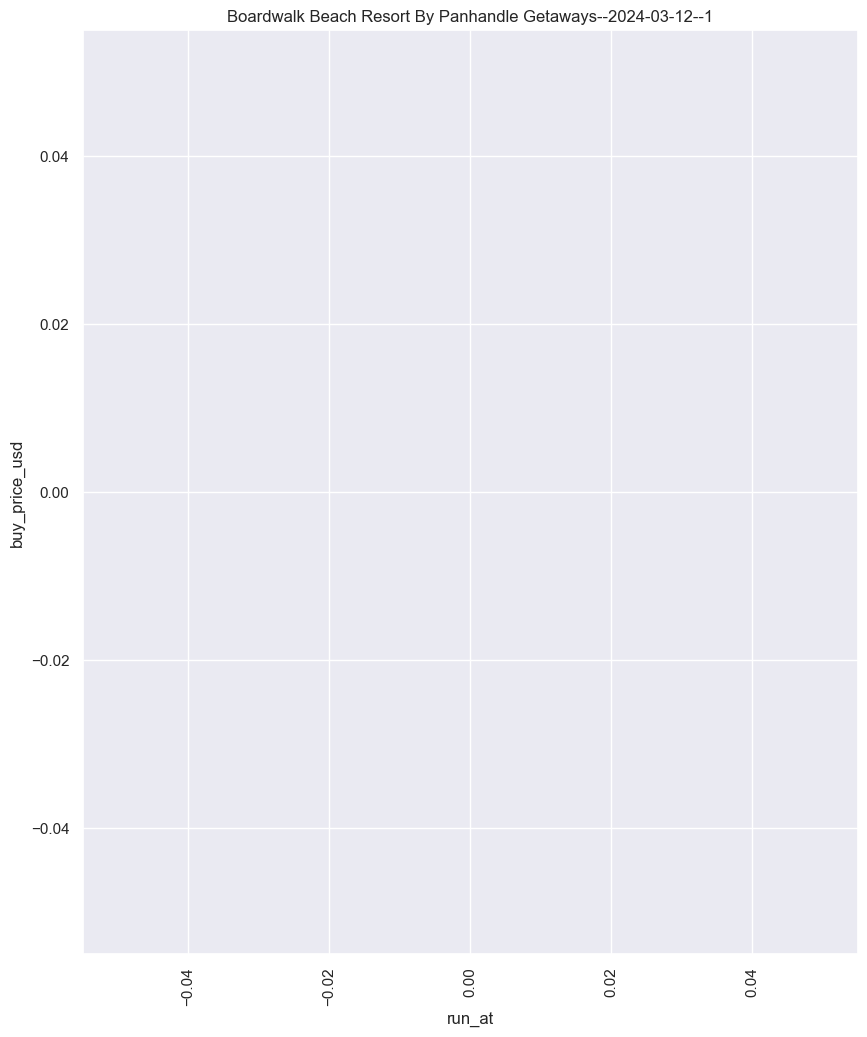

{'created_at': 'Jan 19', 'action': 'buy', 'url': 'https://www.super.com/travel/bookings/af388b5e-2916-4988-8a3b-bb3f2b595e4e', 'hotel_name': 'Boardwalk Beach Resort By Panhandle Getaways', 'list_price_usd': '$79.00', 'full_price_usd': '$97.00', 'checkin': 'Mar 13', 'checkout': 'Mar 14', 'cancellable_option': 'no', 'cancellable_date': '', 'room_type': 'Classic Room', 'adults': '', 'updated_at': '', 'created_by': 'Khalid', 'notes': '', 'screenshot_link': 'https://share.zight.com/OAuNL8ON', 'clean_checkin': Timestamp('2024-03-12 20:00:00-0400', tz='America/New_York'), 'clean_checkout': Timestamp('2024-03-13 20:00:00-0400', tz='America/New_York'), 'checkin_date': '2024-03-13', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-19 00:00:00')}


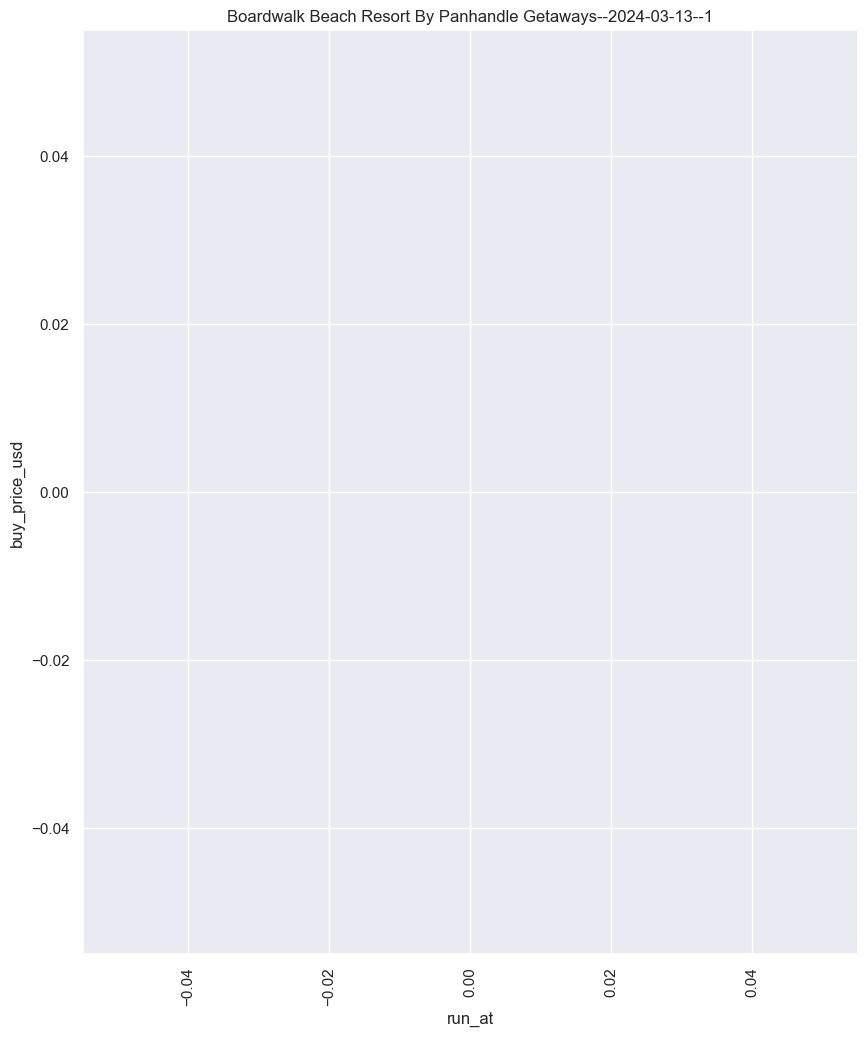

{'created_at': 'Jan 19', 'action': 'buy', 'url': 'https://www.super.com/travel/bookings/3c1987af-d0cc-495a-bf2f-fe61a88de2c8', 'hotel_name': 'Best Western Sugar Sands Inn & Suites', 'list_price_usd': '$124.00', 'full_price_usd': '$153.00', 'checkin': 'Mar 12', 'checkout': 'Mar 13', 'cancellable_option': 'yes', 'cancellable_date': 'Mar 8', 'room_type': 'Two Queens', 'adults': '', 'updated_at': '', 'created_by': 'Khalid', 'notes': '', 'screenshot_link': 'https://share.zight.com/GGudAKvp', 'clean_checkin': Timestamp('2024-03-11 20:00:00-0400', tz='America/New_York'), 'clean_checkout': Timestamp('2024-03-12 20:00:00-0400', tz='America/New_York'), 'checkin_date': '2024-03-12', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-19 00:00:00')}


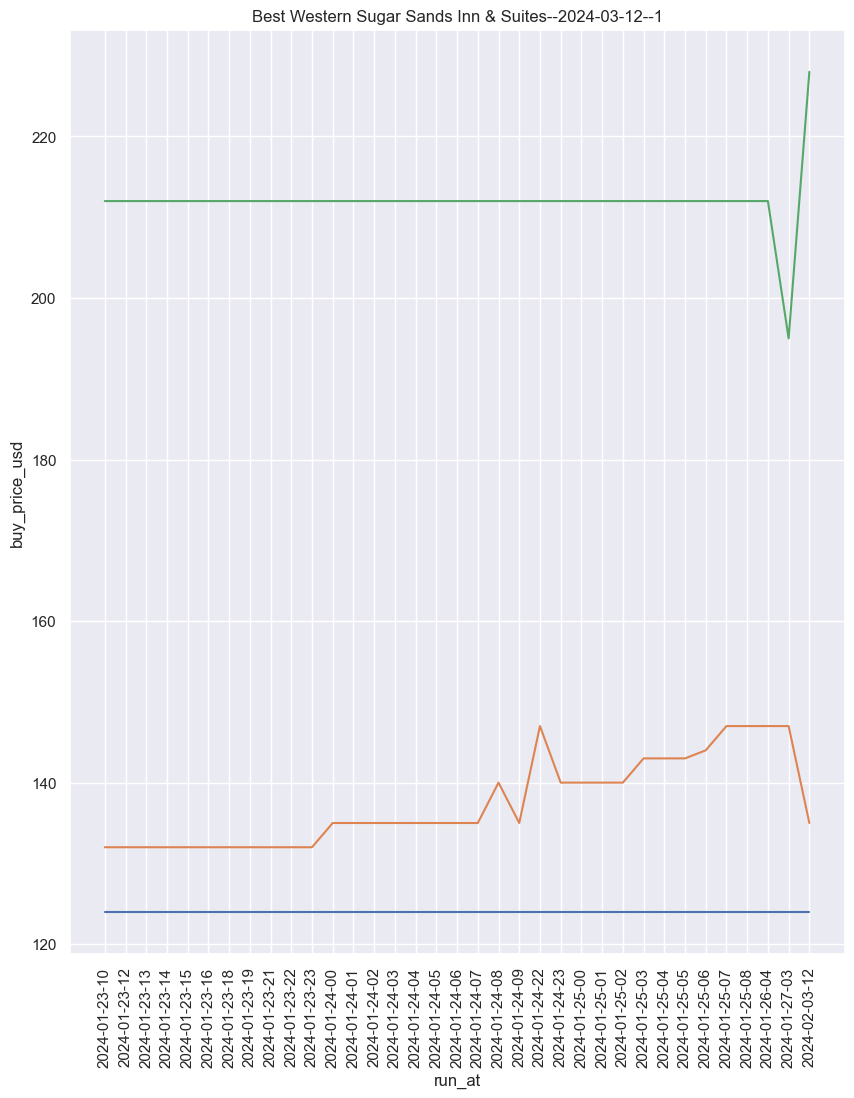

{'created_at': 'Jan 19', 'action': 'buy', 'url': 'https://www.super.com/travel/bookings/3c1987af-d0cc-495a-bf2f-fe61a88de2c8', 'hotel_name': 'Best Western Sugar Sands Inn & Suites', 'list_price_usd': '$124.00', 'full_price_usd': '$153.00', 'checkin': 'Mar 13', 'checkout': 'Mar 14', 'cancellable_option': 'yes', 'cancellable_date': 'Mar 8', 'room_type': 'Two Queens', 'adults': '', 'updated_at': '', 'created_by': 'Khalid', 'notes': '', 'screenshot_link': 'https://share.zight.com/GGudAKvp', 'clean_checkin': Timestamp('2024-03-12 20:00:00-0400', tz='America/New_York'), 'clean_checkout': Timestamp('2024-03-13 20:00:00-0400', tz='America/New_York'), 'checkin_date': '2024-03-13', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-19 00:00:00')}


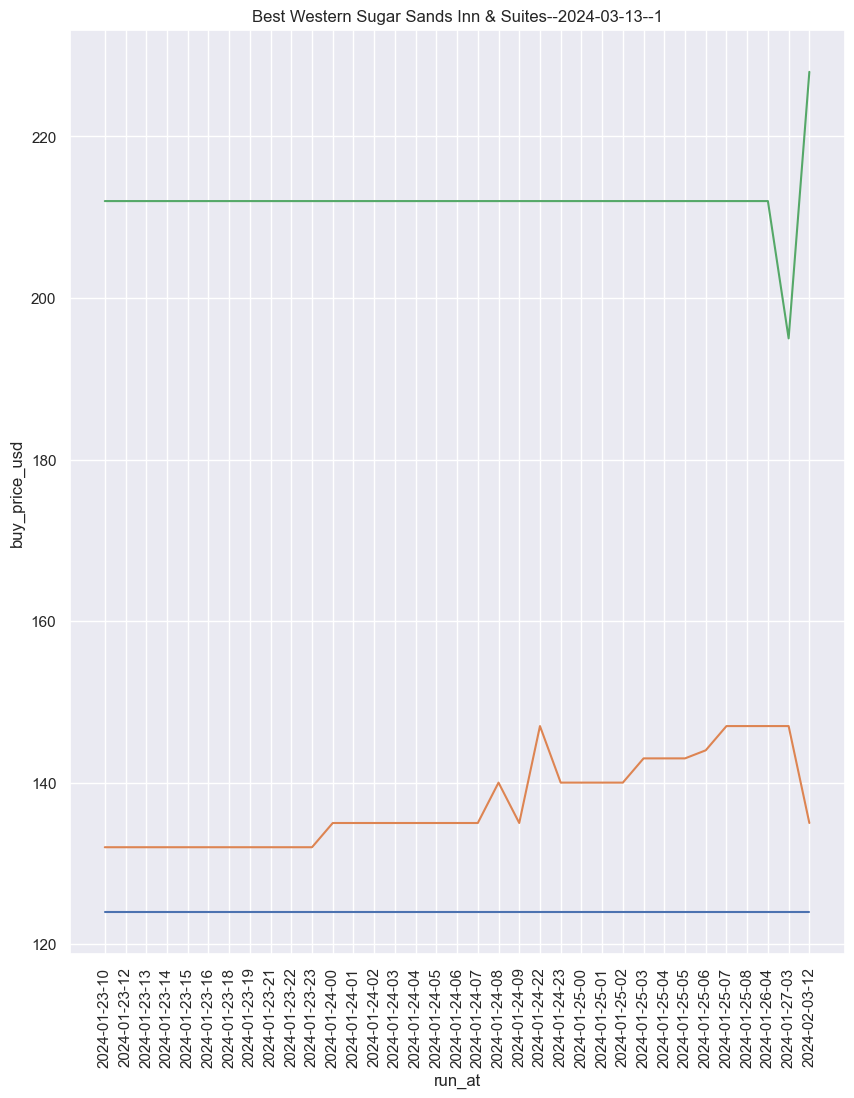

{'created_at': 'Jan 19', 'action': 'buy', 'url': 'https://www.super.com/travel/bookings/3c1987af-d0cc-495a-bf2f-fe61a88de2c8', 'hotel_name': 'Best Western Sugar Sands Inn & Suites', 'list_price_usd': '$124.00', 'full_price_usd': '$153.00', 'checkin': 'Mar 14', 'checkout': 'Mar 15', 'cancellable_option': 'yes', 'cancellable_date': 'Mar 8', 'room_type': 'Two Queens', 'adults': '', 'updated_at': '', 'created_by': 'Khalid', 'notes': '', 'screenshot_link': 'https://share.zight.com/GGudAKvp', 'clean_checkin': Timestamp('2024-03-13 20:00:00-0400', tz='America/New_York'), 'clean_checkout': Timestamp('2024-03-14 20:00:00-0400', tz='America/New_York'), 'checkin_date': '2024-03-14', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-19 00:00:00')}


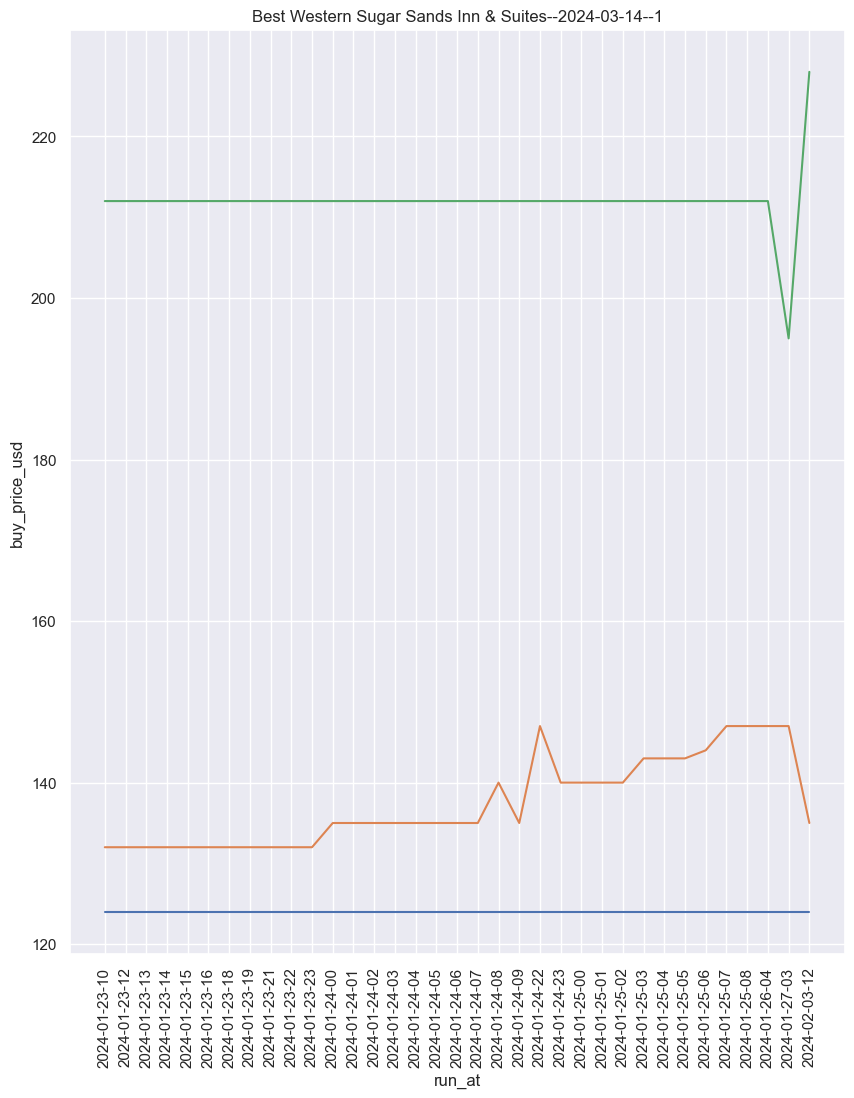

{'created_at': 'Jan 22', 'action': 'buy', 'url': 'https://www.traveluro.com/bookhotel/125414?PaymentPageKey=824d2b32-b617-4c2e-9491-2880cf55772d&RoomIndex=0&DealIndex=0&LastDealIndex=false', 'hotel_name': 'Holiday Inn Express & Suites Naples North Bonita Springs An IHG Hotel', 'list_price_usd': '$137.00', 'full_price_usd': '$154.00', 'checkin': 'Mar 13', 'checkout': 'Mar 14', 'cancellable_option': 'no', 'cancellable_date': '', 'room_type': 'Two Queens', 'adults': '', 'updated_at': '', 'created_by': 'Khalid', 'notes': '', 'screenshot_link': 'https://share.zight.com/04uRKyZj', 'clean_checkin': Timestamp('2024-03-12 20:00:00-0400', tz='America/New_York'), 'clean_checkout': Timestamp('2024-03-13 20:00:00-0400', tz='America/New_York'), 'checkin_date': '2024-03-13', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-22 00:00:00')}


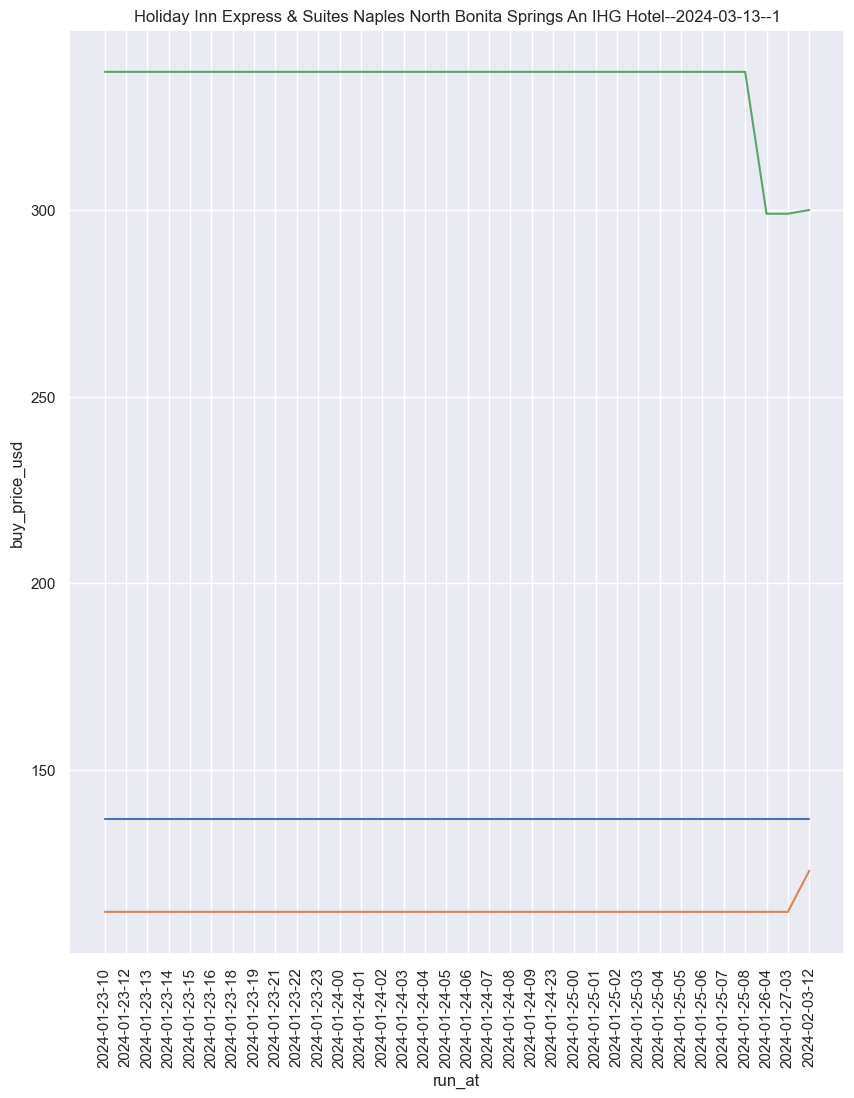

{'created_at': 'Jan 22', 'action': 'buy', 'url': 'https://www.traveluro.com/bookhotel/125414?PaymentPageKey=824d2b32-b617-4c2e-9491-2880cf55772d&RoomIndex=0&DealIndex=0&LastDealIndex=false', 'hotel_name': 'Holiday Inn Express & Suites Naples North Bonita Springs An IHG Hotel', 'list_price_usd': '$137.00', 'full_price_usd': '$154.00', 'checkin': 'Mar 14', 'checkout': 'Mar 15', 'cancellable_option': 'no', 'cancellable_date': '', 'room_type': 'Two Queens', 'adults': '', 'updated_at': '', 'created_by': 'Khalid', 'notes': '', 'screenshot_link': 'https://share.zight.com/04uRKyZj', 'clean_checkin': Timestamp('2024-03-13 20:00:00-0400', tz='America/New_York'), 'clean_checkout': Timestamp('2024-03-14 20:00:00-0400', tz='America/New_York'), 'checkin_date': '2024-03-14', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-22 00:00:00')}


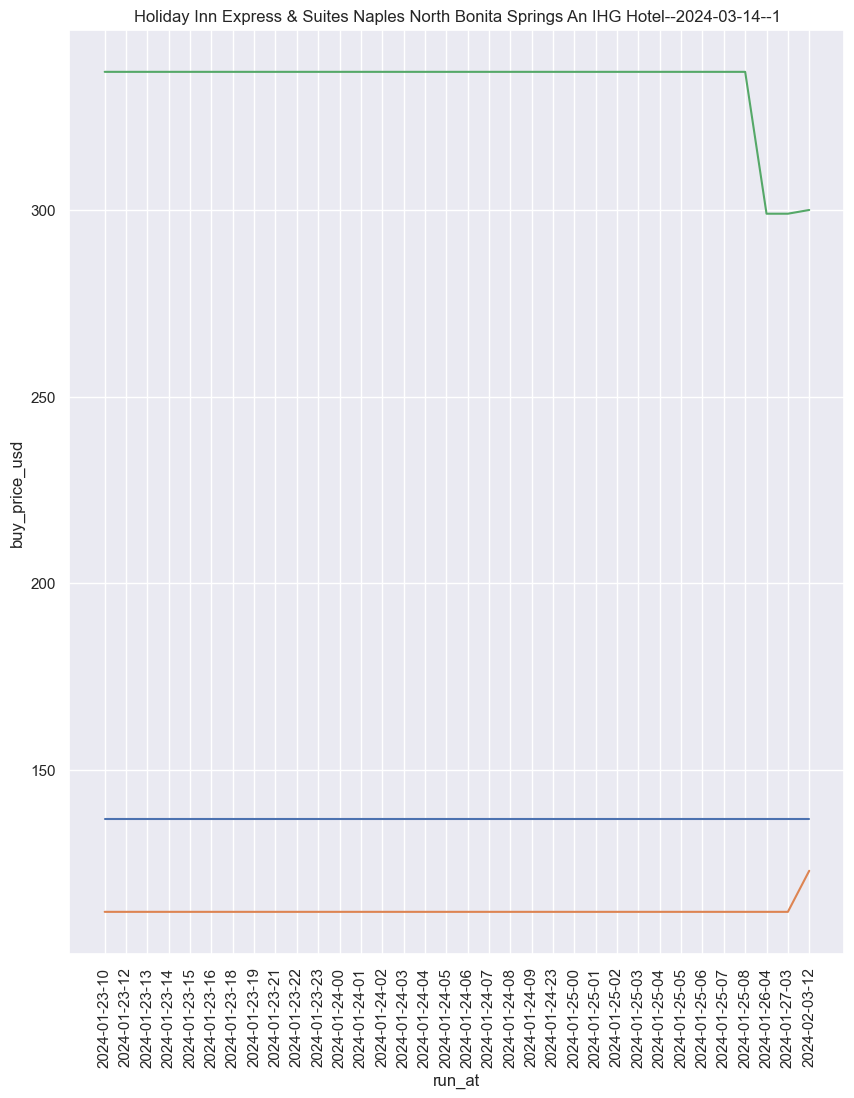

{'created_at': 'Jan 22', 'action': 'buy', 'url': 'https://www.traveluro.com/bookhotel/125414?PaymentPageKey=824d2b32-b617-4c2e-9491-2880cf55772d&RoomIndex=0&DealIndex=0&LastDealIndex=false', 'hotel_name': 'Holiday Inn Express & Suites Naples North Bonita Springs An IHG Hotel', 'list_price_usd': '$137.00', 'full_price_usd': '$154.00', 'checkin': 'Mar 15', 'checkout': 'Mar 16', 'cancellable_option': 'no', 'cancellable_date': '', 'room_type': 'Two Queens', 'adults': '', 'updated_at': '', 'created_by': 'Khalid', 'notes': '', 'screenshot_link': 'https://share.zight.com/04uRKyZj', 'clean_checkin': Timestamp('2024-03-14 20:00:00-0400', tz='America/New_York'), 'clean_checkout': Timestamp('2024-03-15 20:00:00-0400', tz='America/New_York'), 'checkin_date': '2024-03-15', 'length_of_stay': 1, 'clean_created_at': Timestamp('2024-01-22 00:00:00')}


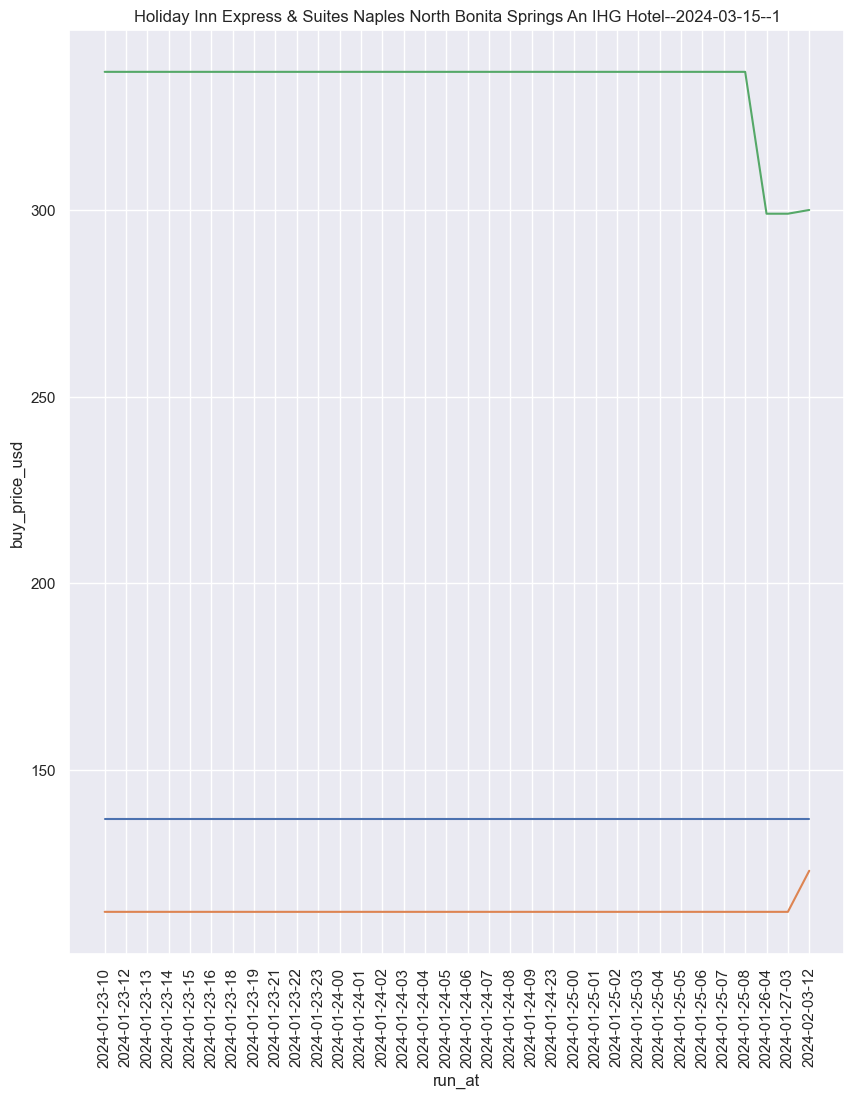

{'created_at': 'Jan 23', 'action': 'buy', 'url': 'https://www.agoda.com/search?city=18720&locale=en-us&ckuid=010ed2c1-e885-451a-9233-d3e5cb9f177b&prid=0&currency=USD&correlationId=9c72ee0e-d72c-474c-84ba-3424807ad883&analyticsSessionId=3471721934781350068&pageTypeId=103&realLanguageId=1&languageId=1&origin=CA&cid=1915676&tag=QPBV8BJ42GF07H0B&userId=010ed2c1-e885-451a-9233-d3e5cb9f177b&whitelabelid=1&loginLvl=0&storefrontId=3&currencyId=7&currencyCode=USD&htmlLanguage=en-us&cultureInfoName=en-us&memberId=46301297&machineName=as-pc-3f-acm-web-user-54488466c9-mjpgs&trafficGroupId=7&sessionId=2orjntx1v5zr0awok2qaanyd&trafficSubGroupId=7&aid=265311&useFullPageLogin=true&cttp=4&isRealUser=true&mode=production&browserFamily=Chrome&cdnDomain=agoda.net&checkIn=2024-03-09&checkOut=2024-03-12&rooms=1&adults=2&children=0&priceCur=USD&los=3&textToSearch=Miami+Beach+%28FL%29&productType=-1&selectedProperty=2455242&travellerType=1&familyMode=off&ds=FFY6m00%2FOgxSAM8g', 'hotel_name': 'Broadmore Miami 

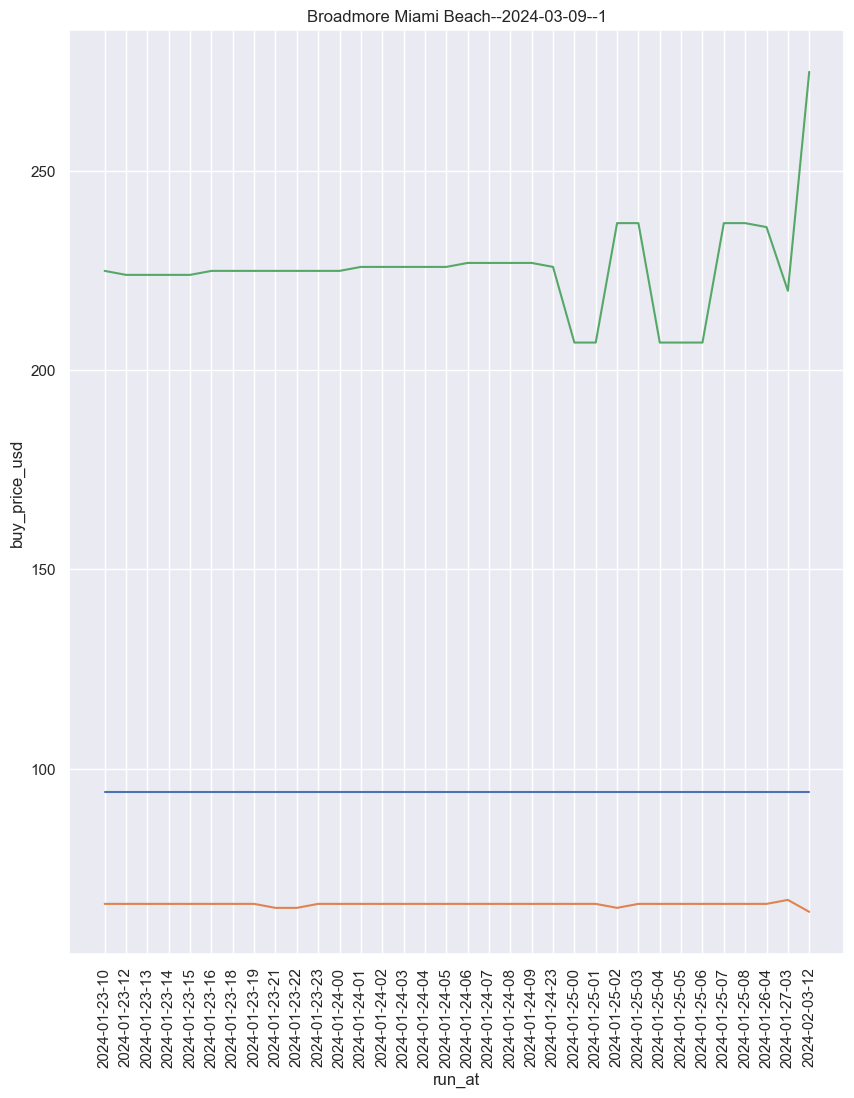

{'created_at': 'Jan 23', 'action': 'buy', 'url': 'https://www.agoda.com/search?city=18720&locale=en-us&ckuid=010ed2c1-e885-451a-9233-d3e5cb9f177b&prid=0&currency=USD&correlationId=9c72ee0e-d72c-474c-84ba-3424807ad883&analyticsSessionId=3471721934781350068&pageTypeId=103&realLanguageId=1&languageId=1&origin=CA&cid=1915676&tag=QPBV8BJ42GF07H0B&userId=010ed2c1-e885-451a-9233-d3e5cb9f177b&whitelabelid=1&loginLvl=0&storefrontId=3&currencyId=7&currencyCode=USD&htmlLanguage=en-us&cultureInfoName=en-us&memberId=46301297&machineName=as-pc-3f-acm-web-user-54488466c9-mjpgs&trafficGroupId=7&sessionId=2orjntx1v5zr0awok2qaanyd&trafficSubGroupId=7&aid=265311&useFullPageLogin=true&cttp=4&isRealUser=true&mode=production&browserFamily=Chrome&cdnDomain=agoda.net&checkIn=2024-03-09&checkOut=2024-03-12&rooms=1&adults=2&children=0&priceCur=USD&los=3&textToSearch=Miami+Beach+%28FL%29&productType=-1&selectedProperty=2455242&travellerType=1&familyMode=off&ds=FFY6m00%2FOgxSAM8g', 'hotel_name': 'Broadmore Miami 

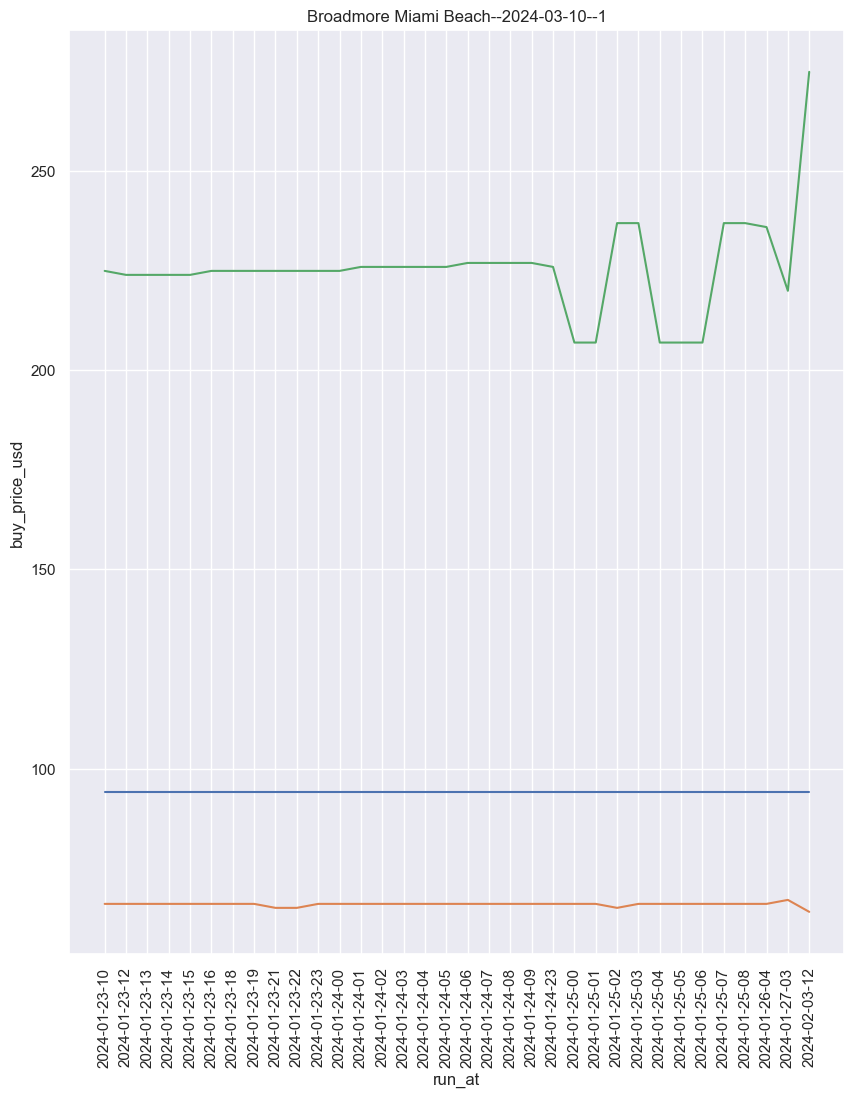

{'created_at': 'Jan 23', 'action': 'buy', 'url': 'https://www.agoda.com/search?city=18720&locale=en-us&ckuid=010ed2c1-e885-451a-9233-d3e5cb9f177b&prid=0&currency=USD&correlationId=9c72ee0e-d72c-474c-84ba-3424807ad883&analyticsSessionId=3471721934781350068&pageTypeId=103&realLanguageId=1&languageId=1&origin=CA&cid=1915676&tag=QPBV8BJ42GF07H0B&userId=010ed2c1-e885-451a-9233-d3e5cb9f177b&whitelabelid=1&loginLvl=0&storefrontId=3&currencyId=7&currencyCode=USD&htmlLanguage=en-us&cultureInfoName=en-us&memberId=46301297&machineName=as-pc-3f-acm-web-user-54488466c9-mjpgs&trafficGroupId=7&sessionId=2orjntx1v5zr0awok2qaanyd&trafficSubGroupId=7&aid=265311&useFullPageLogin=true&cttp=4&isRealUser=true&mode=production&browserFamily=Chrome&cdnDomain=agoda.net&checkIn=2024-03-09&checkOut=2024-03-12&rooms=1&adults=2&children=0&priceCur=USD&los=3&textToSearch=Miami+Beach+%28FL%29&productType=-1&selectedProperty=2455242&travellerType=1&familyMode=off&ds=FFY6m00%2FOgxSAM8g', 'hotel_name': 'Broadmore Miami 

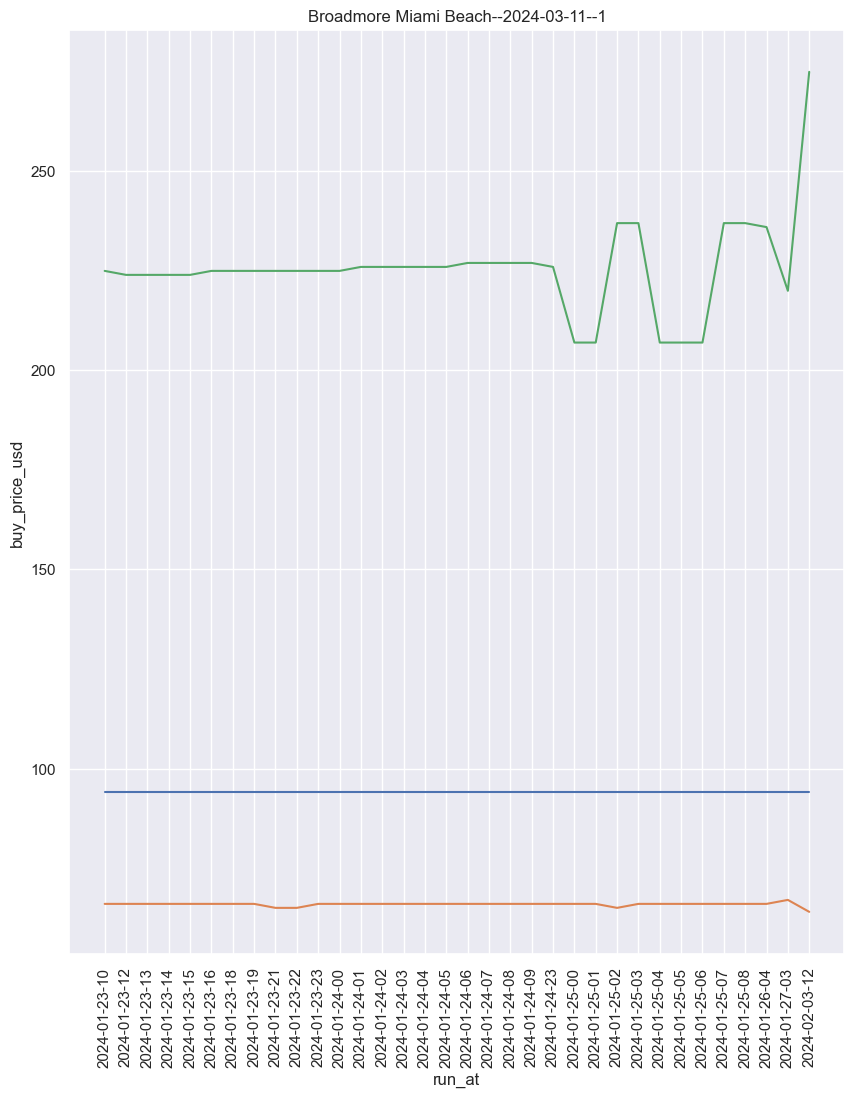

{'created_at': 'Jan 26', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=google%20hotels%20b%20ocean%20resort&g2lb=2502548%2C2503771%2C2503781%2C2504510%2C4258168%2C4284970%2C4291517%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72414905%2C72421566%2C72430562%2C72440517%2C72448521%2C72458066%2C72458707%2C72462234%2C72469155%2C72470440%2C72470899%2C72472051%2C72473738%2C72473841%2C72479991%2C72480010%2C72484736%2C72485561%2C72485562%2C72485655%2C72485658%2C72486593%2C72486995&hl=en-CA&gl=ca&ssta=1&ts=CAESCgoCCAMKAggDEAAaaQpLEkcyJTB4ODhkOTAwMjQ3ZjRjZWIwYjoweDRjMTkxZGE3MzBjZTNmOTc6HkIgT2NlYW4gUmVzb3J0IEZvcnQgTGF1ZGVyZGFsZRoAEhoSFAoHCOgPEAMYCRIHCOgPEAMYEBgHMgIIASoQCgU6A0NBRBoAIgUSAxCvAQ&qs=CAEgACgBMidDaGtJbF8tNGh2TzB4NHhNR2cwdlp5OHhNV014WHpGNk1tNWlFQUU4DUgA&ap=KigKEgkZLDKO8Bg6QBFeeiMsOQdUwBISCVdcDeQQHzpAEV56IwCiBlTAMABoAQ&ictx=1&ved=0CAAQ5JsGahgKEwi4to-Nj4OEAxUAAAAAHQAAAAAQxQM', 'hotel_name': 'B Ocean Re

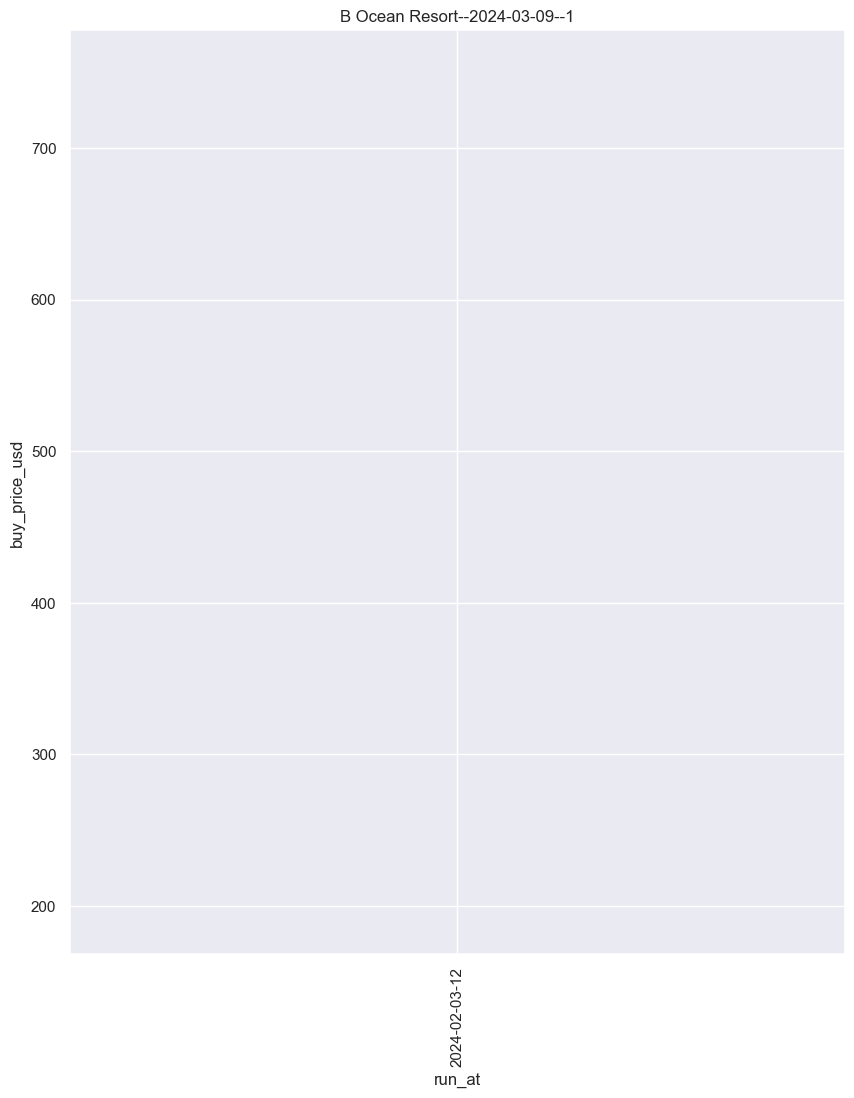

{'created_at': 'Jan 26', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=google%20hotels%20b%20ocean%20resort&g2lb=2502548%2C2503771%2C2503781%2C2504510%2C4258168%2C4284970%2C4291517%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72414905%2C72421566%2C72430562%2C72440517%2C72448521%2C72458066%2C72458707%2C72462234%2C72469155%2C72470440%2C72470899%2C72472051%2C72473738%2C72473841%2C72479991%2C72480010%2C72484736%2C72485561%2C72485562%2C72485655%2C72485658%2C72486593%2C72486995&hl=en-CA&gl=ca&ssta=1&ts=CAESCgoCCAMKAggDEAAaaQpLEkcyJTB4ODhkOTAwMjQ3ZjRjZWIwYjoweDRjMTkxZGE3MzBjZTNmOTc6HkIgT2NlYW4gUmVzb3J0IEZvcnQgTGF1ZGVyZGFsZRoAEhoSFAoHCOgPEAMYCRIHCOgPEAMYEBgHMgIIASoQCgU6A0NBRBoAIgUSAxCvAQ&qs=CAEgACgBMidDaGtJbF8tNGh2TzB4NHhNR2cwdlp5OHhNV014WHpGNk1tNWlFQUU4DUgA&ap=KigKEgkZLDKO8Bg6QBFeeiMsOQdUwBISCVdcDeQQHzpAEV56IwCiBlTAMABoAQ&ictx=1&ved=0CAAQ5JsGahgKEwi4to-Nj4OEAxUAAAAAHQAAAAAQxQM', 'hotel_name': 'B Ocean Re

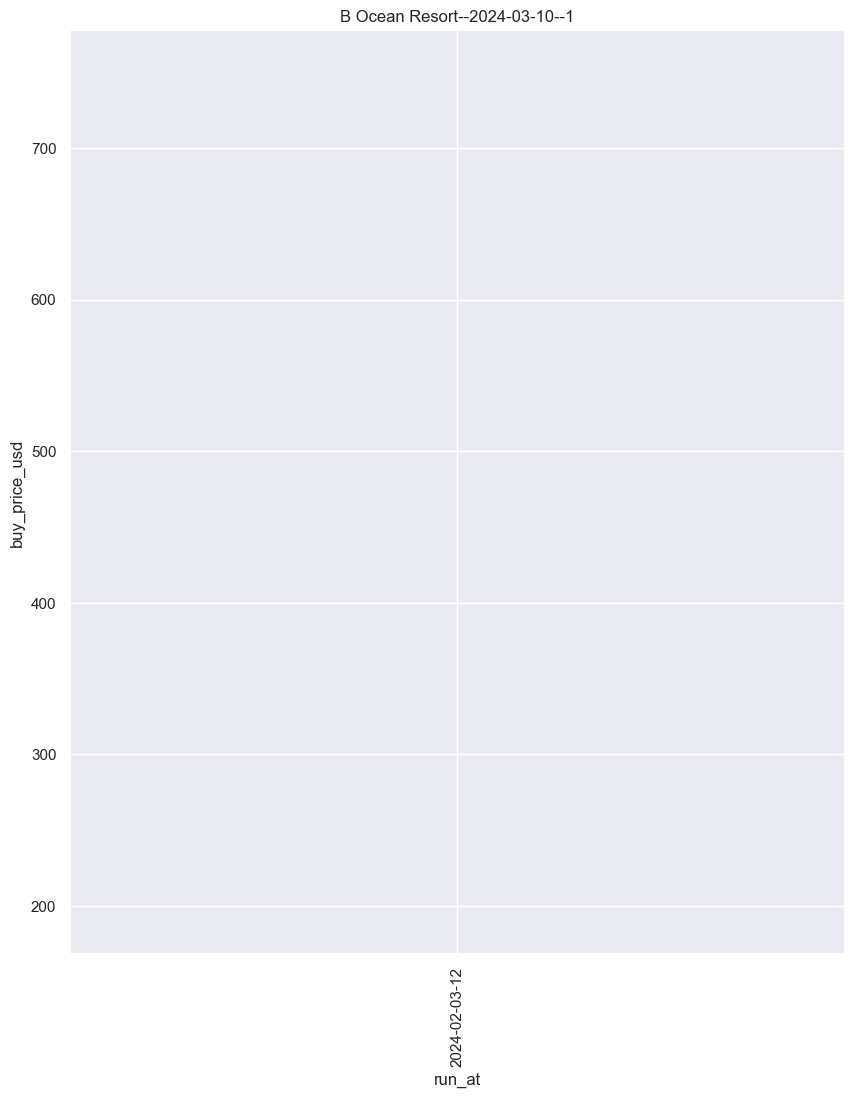

{'created_at': 'Jan 26', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=google%20hotels%20b%20ocean%20resort&g2lb=2502548%2C2503771%2C2503781%2C2504510%2C4258168%2C4284970%2C4291517%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72414905%2C72421566%2C72430562%2C72440517%2C72448521%2C72458066%2C72458707%2C72462234%2C72469155%2C72470440%2C72470899%2C72472051%2C72473738%2C72473841%2C72479991%2C72480010%2C72484736%2C72485561%2C72485562%2C72485655%2C72485658%2C72486593%2C72486995&hl=en-CA&gl=ca&ssta=1&ts=CAESCgoCCAMKAggDEAAaaQpLEkcyJTB4ODhkOTAwMjQ3ZjRjZWIwYjoweDRjMTkxZGE3MzBjZTNmOTc6HkIgT2NlYW4gUmVzb3J0IEZvcnQgTGF1ZGVyZGFsZRoAEhoSFAoHCOgPEAMYCRIHCOgPEAMYEBgHMgIIASoQCgU6A0NBRBoAIgUSAxCvAQ&qs=CAEgACgBMidDaGtJbF8tNGh2TzB4NHhNR2cwdlp5OHhNV014WHpGNk1tNWlFQUU4DUgA&ap=KigKEgkZLDKO8Bg6QBFeeiMsOQdUwBISCVdcDeQQHzpAEV56IwCiBlTAMABoAQ&ictx=1&ved=0CAAQ5JsGahgKEwi4to-Nj4OEAxUAAAAAHQAAAAAQxQM', 'hotel_name': 'B Ocean Re

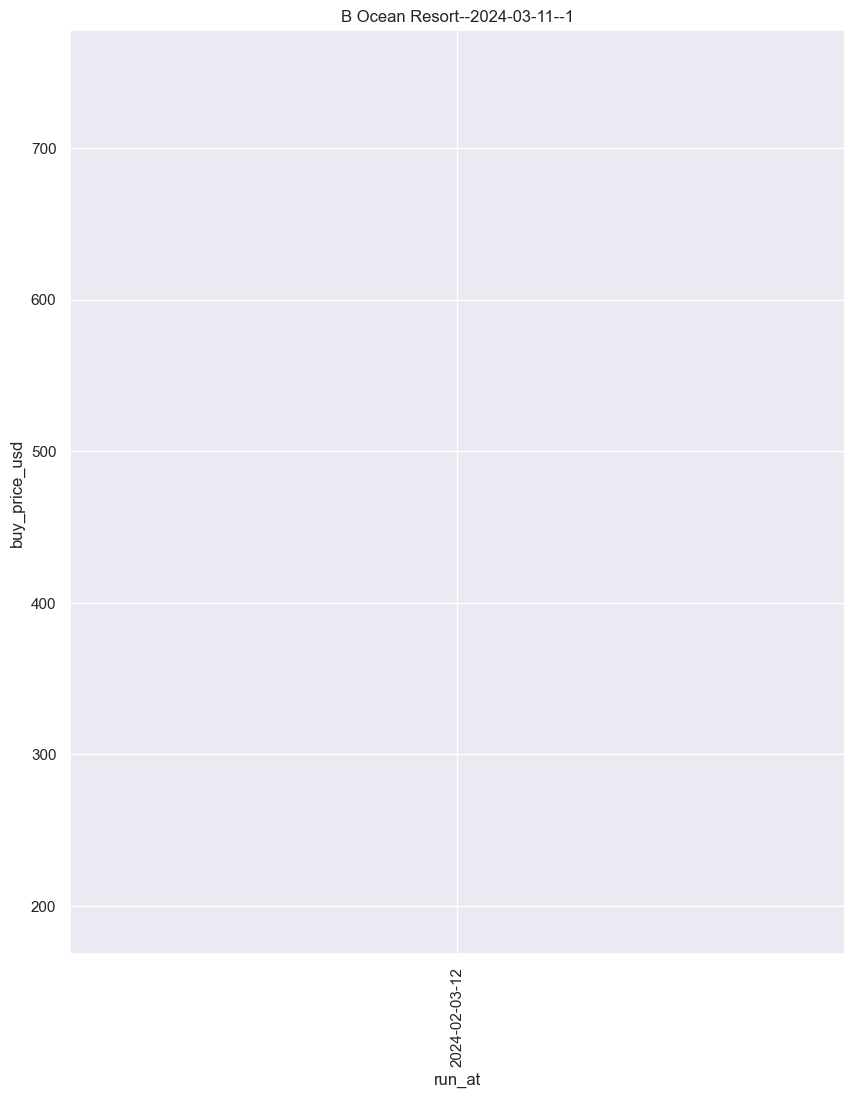

{'created_at': 'Jan 26', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=google%20hotels%20b%20ocean%20resort&g2lb=2502548%2C2503771%2C2503781%2C2504510%2C4258168%2C4284970%2C4291517%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72414905%2C72421566%2C72430562%2C72440517%2C72448521%2C72458066%2C72458707%2C72462234%2C72469155%2C72470440%2C72470899%2C72472051%2C72473738%2C72473841%2C72479991%2C72480010%2C72484736%2C72485561%2C72485562%2C72485655%2C72485658%2C72486593%2C72486995&hl=en-CA&gl=ca&ssta=1&ts=CAESCgoCCAMKAggDEAAaaQpLEkcyJTB4ODhkOTAwMjQ3ZjRjZWIwYjoweDRjMTkxZGE3MzBjZTNmOTc6HkIgT2NlYW4gUmVzb3J0IEZvcnQgTGF1ZGVyZGFsZRoAEhoSFAoHCOgPEAMYCRIHCOgPEAMYEBgHMgIIASoQCgU6A0NBRBoAIgUSAxCvAQ&qs=CAEgACgBMidDaGtJbF8tNGh2TzB4NHhNR2cwdlp5OHhNV014WHpGNk1tNWlFQUU4DUgA&ap=KigKEgkZLDKO8Bg6QBFeeiMsOQdUwBISCVdcDeQQHzpAEV56IwCiBlTAMABoAQ&ictx=1&ved=0CAAQ5JsGahgKEwi4to-Nj4OEAxUAAAAAHQAAAAAQxQM', 'hotel_name': 'B Ocean Re

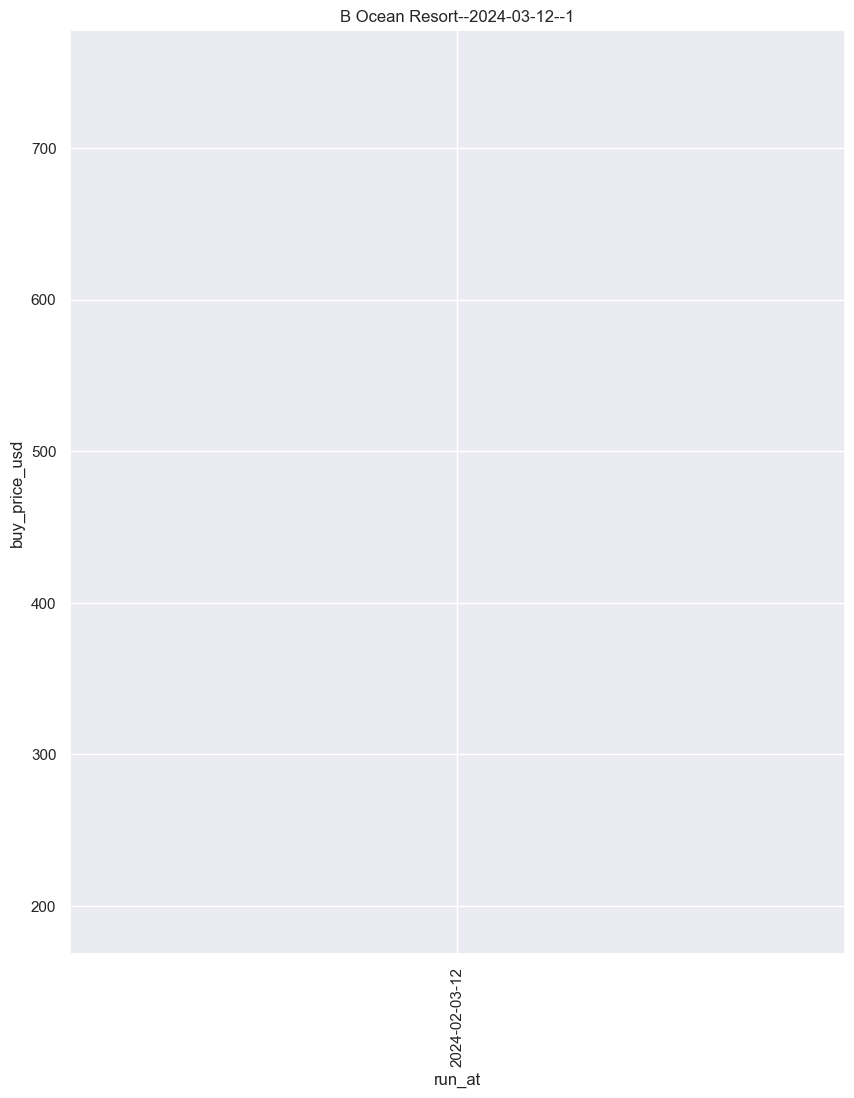

{'created_at': 'Jan 26', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=google%20hotels%20b%20ocean%20resort&g2lb=2502548%2C2503771%2C2503781%2C2504510%2C4258168%2C4284970%2C4291517%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72414905%2C72421566%2C72430562%2C72440517%2C72448521%2C72458066%2C72458707%2C72462234%2C72469155%2C72470440%2C72470899%2C72472051%2C72473738%2C72473841%2C72479991%2C72480010%2C72484736%2C72485561%2C72485562%2C72485655%2C72485658%2C72486593%2C72486995&hl=en-CA&gl=ca&ssta=1&ts=CAESCgoCCAMKAggDEAAaaQpLEkcyJTB4ODhkOTAwMjQ3ZjRjZWIwYjoweDRjMTkxZGE3MzBjZTNmOTc6HkIgT2NlYW4gUmVzb3J0IEZvcnQgTGF1ZGVyZGFsZRoAEhoSFAoHCOgPEAMYCRIHCOgPEAMYEBgHMgIIASoQCgU6A0NBRBoAIgUSAxCvAQ&qs=CAEgACgBMidDaGtJbF8tNGh2TzB4NHhNR2cwdlp5OHhNV014WHpGNk1tNWlFQUU4DUgA&ap=KigKEgkZLDKO8Bg6QBFeeiMsOQdUwBISCVdcDeQQHzpAEV56IwCiBlTAMABoAQ&ictx=1&ved=0CAAQ5JsGahgKEwi4to-Nj4OEAxUAAAAAHQAAAAAQxQM', 'hotel_name': 'B Ocean Re

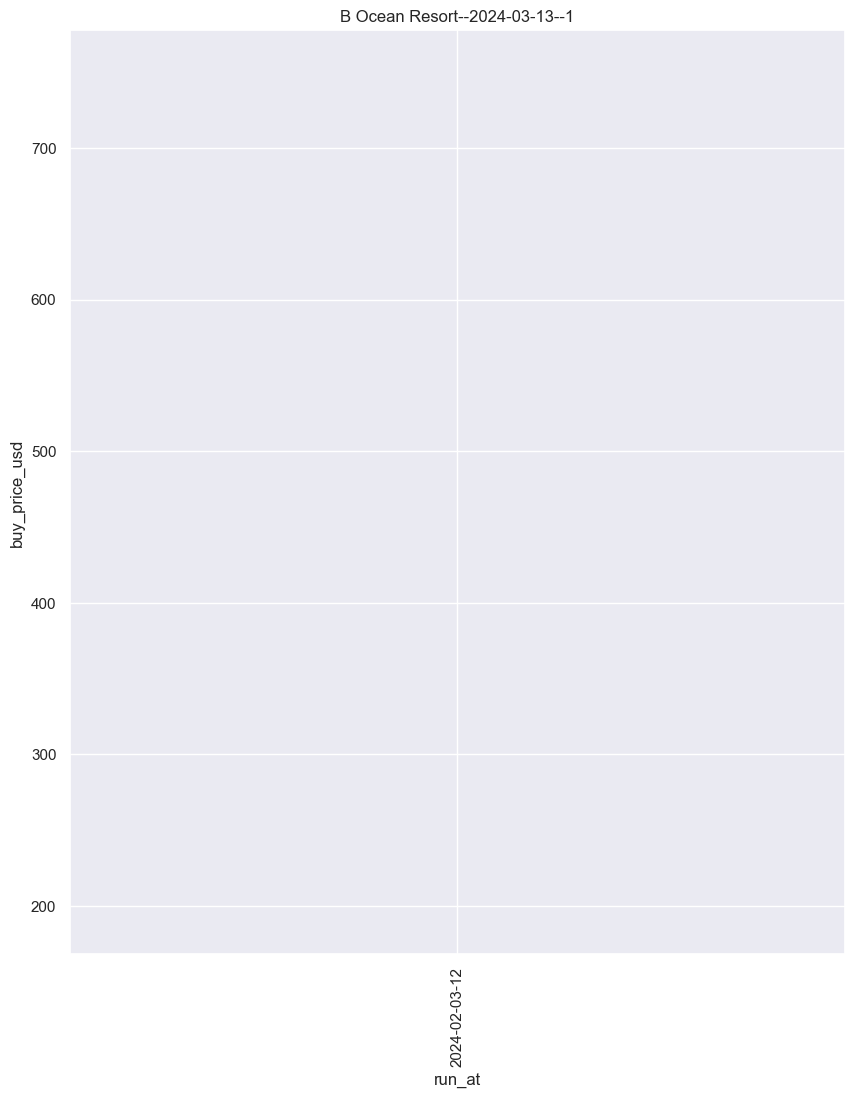

{'created_at': 'Jan 26', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=google%20hotels%20b%20ocean%20resort&g2lb=2502548%2C2503771%2C2503781%2C2504510%2C4258168%2C4284970%2C4291517%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72414905%2C72421566%2C72430562%2C72440517%2C72448521%2C72458066%2C72458707%2C72462234%2C72469155%2C72470440%2C72470899%2C72472051%2C72473738%2C72473841%2C72479991%2C72480010%2C72484736%2C72485561%2C72485562%2C72485655%2C72485658%2C72486593%2C72486995&hl=en-CA&gl=ca&ssta=1&ts=CAESCgoCCAMKAggDEAAaaQpLEkcyJTB4ODhkOTAwMjQ3ZjRjZWIwYjoweDRjMTkxZGE3MzBjZTNmOTc6HkIgT2NlYW4gUmVzb3J0IEZvcnQgTGF1ZGVyZGFsZRoAEhoSFAoHCOgPEAMYCRIHCOgPEAMYEBgHMgIIASoQCgU6A0NBRBoAIgUSAxCvAQ&qs=CAEgACgBMidDaGtJbF8tNGh2TzB4NHhNR2cwdlp5OHhNV014WHpGNk1tNWlFQUU4DUgA&ap=KigKEgkZLDKO8Bg6QBFeeiMsOQdUwBISCVdcDeQQHzpAEV56IwCiBlTAMABoAQ&ictx=1&ved=0CAAQ5JsGahgKEwi4to-Nj4OEAxUAAAAAHQAAAAAQxQM', 'hotel_name': 'B Ocean Re

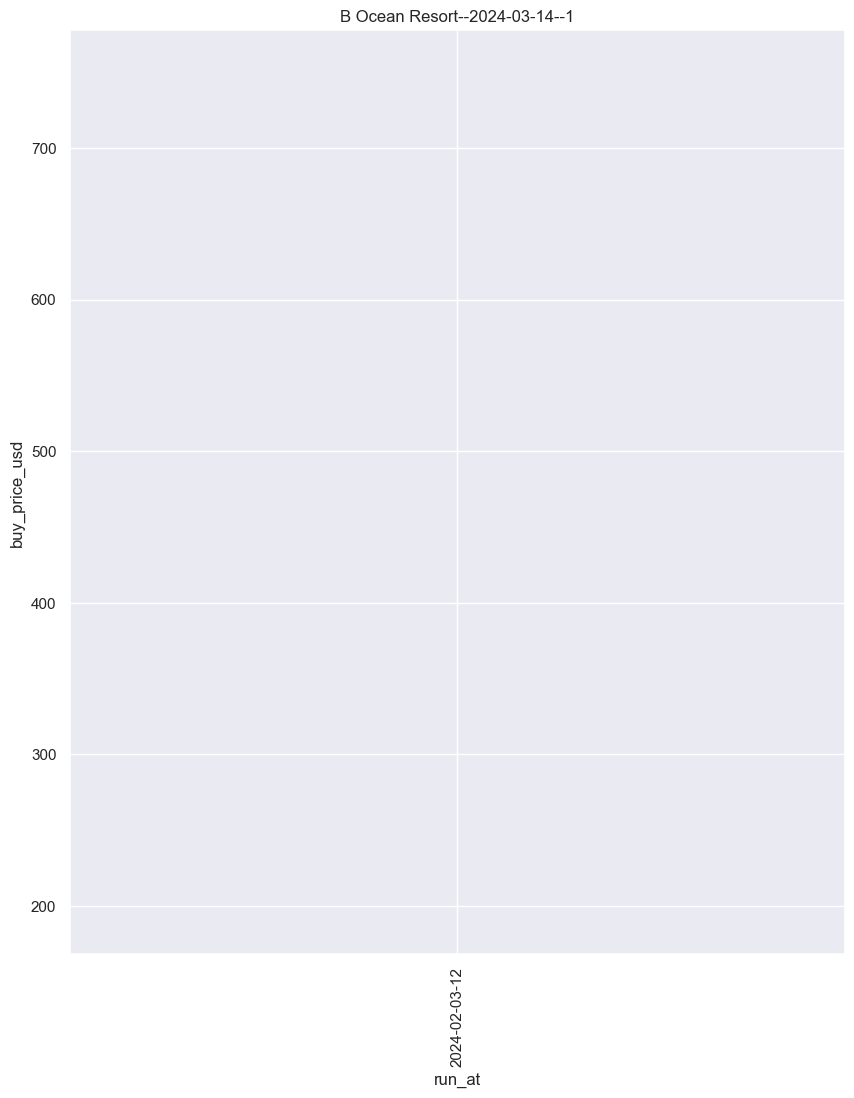

{'created_at': 'Jan 26', 'action': 'buy', 'url': 'https://www.google.com/travel/search?q=google%20hotels%20b%20ocean%20resort&g2lb=2502548%2C2503771%2C2503781%2C2504510%2C4258168%2C4284970%2C4291517%2C4814050%2C4874190%2C4893075%2C4899568%2C4899569%2C4965990%2C10208620%2C72277293%2C72302247%2C72317059%2C72406588%2C72414905%2C72421566%2C72430562%2C72440517%2C72448521%2C72458066%2C72458707%2C72462234%2C72469155%2C72470440%2C72470899%2C72472051%2C72473738%2C72473841%2C72479991%2C72480010%2C72484736%2C72485561%2C72485562%2C72485655%2C72485658%2C72486593%2C72486995&hl=en-CA&gl=ca&ssta=1&ts=CAESCgoCCAMKAggDEAAaaQpLEkcyJTB4ODhkOTAwMjQ3ZjRjZWIwYjoweDRjMTkxZGE3MzBjZTNmOTc6HkIgT2NlYW4gUmVzb3J0IEZvcnQgTGF1ZGVyZGFsZRoAEhoSFAoHCOgPEAMYCRIHCOgPEAMYEBgHMgIIASoQCgU6A0NBRBoAIgUSAxCvAQ&qs=CAEgACgBMidDaGtJbF8tNGh2TzB4NHhNR2cwdlp5OHhNV014WHpGNk1tNWlFQUU4DUgA&ap=KigKEgkZLDKO8Bg6QBFeeiMsOQdUwBISCVdcDeQQHzpAEV56IwCiBlTAMABoAQ&ictx=1&ved=0CAAQ5JsGahgKEwi4to-Nj4OEAxUAAAAAHQAAAAAQxQM', 'hotel_name': 'B Ocean Re

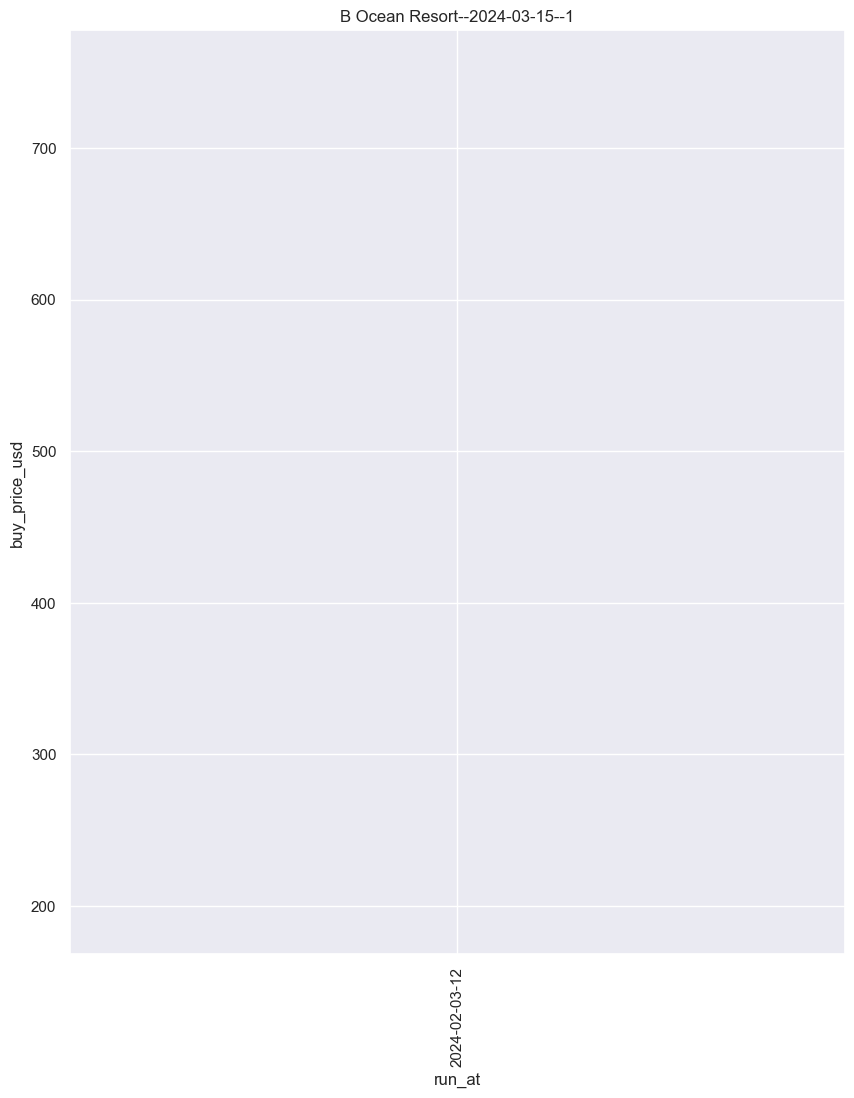

In [10]:
with duckdb.connect(DUCK_DB_FILE, read_only=True) as con:
    search_itineraries = (
        con.execute(search_itineraries_sql).df().to_dict(orient="records")
    )
    for search_itin in search_itineraries:
        print(search_itin)
        df = get_price_comparison_graph(
            search_itin, "/Users/nehiljain/code/data/future-dynamics/reporting/plots/"
        )

In [2]:
import pandas as pd
import duckdb

DUCK_DB_FILE = "/Users/nehiljain/code/data/future-dynamics/raw/hotel_pricer_ai.duckdb"
with duckdb.connect(DUCK_DB_FILE, read_only=True) as con:
    hotel_prices = con.execute("SELECT * FROM public.hotel_prices ").df()

display(hotel_prices.head())

,hotel_name,checkin_date,length_of_stay,scrapped_url,text,run_date,run_at,execution_at
0,DoubleTree By Hilton New York Downtown,2024-02-09,1,https://www.google.com/travel/search?q=DoubleT...,Failed to load page,2024-01-23,2024-01-23 10:26:27,2024-01-23-13:00
1,DoubleTree By Hilton New York Downtown,2024-02-09,1,https://www.google.com/travel/search?q=DoubleT...,Failed to load page,2024-01-23,2024-01-23 10:26:27,2024-01-23-13:00
2,"Candlewood Suites New York City-Times Square, ...",2024-02-09,1,https://www.google.com/travel/search?q=Candlew...,Failed to load page,2024-01-23,2024-01-23 10:26:27,2024-01-23-13:00
3,/,2024-02-09,1,https://www.google.com/travel/search?q=%2F&ved...,Failed to load page,2024-01-23,2024-01-23 10:26:27,2024-01-23-13:00
4,Travelodge By Wyndham Miami Biscayne Bay,2024-03-10,1,https://www.google.com/travel/search?q=Travelo...,Hotels.com;;$111;;Visit site;;Earn rewards eve...,2024-01-23,2024-01-23 10:26:27,2024-01-23-13:00


In [5]:
import pendulum


def parse_date_string(date_string):
    return pendulum.parse(date_string, strict=False).set(tz="UTC")


hotel_prices["run_at"] = hotel_prices["run_at"].apply(parse_date_string)
hotel_prices["execution_at"] = hotel_prices["execution_at"].apply(parse_date_string)
hotel_prices.execution_at.dt.date.unique()

array([datetime.date(2024, 1, 23), datetime.date(2024, 1, 24),
       datetime.date(2024, 1, 25), datetime.date(2024, 1, 26),
       datetime.date(2024, 1, 27), datetime.date(2024, 2, 3),
       datetime.date(2024, 2, 6), datetime.date(2024, 2, 7),
       datetime.date(2024, 2, 8)], dtype=object)